# - The Project ::   SuperMarket-Analysis-Project
********************************************

<img src="images/images (1).jpeg" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<p id="Intro">Introduction</p>

* Describtion of project ::
 *************************
     * Business ::
  ********************************
* Any Business Want To Maximize The Numbers of CLients.
* That Not Based on Attract New ones Only But Bases also on Retaining the Existing ones.
* The Current or old Clients Will Cost the Company Less Than The New_Clients
* The New_Clients Weekly interested in Business Servicies and They consider difficult to work with it But The Retain Clients have the necessary knowldge and info Towardes the Business services.
 **************************
 * Domain_Knowledge ::
 ********************************
* The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.


 * Tasks ::
 ***************************
 * *Apply EDA Technice To* :: Describe The Behavior of the data For Extractng Meaningfull Knowledge , insights and Vision From That data To Make The Steckholders of our Business Make More Efficient Decision Which improve and develop The Business
 * Research Of dependences and Formulation of Hypothess.
 * Built ML Model For Predciting New_Values Of Oil-Price.
 * Get High Accuracy From the Model Performance To improve Our Business .
        


* Import Requried liberaries ::

In [1]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import datasist  as ds
import warnings  as w
import missingno as mno
import pandas_profiling  as pp
import matplotlib.pyplot as plt


* Set Some Instructions ::

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [10 , 20]} , font_scale = 1.7)

In [3]:
# loading data ::
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

* From The result above we can see that ::
******************************************
  * We have 1000   record of data.
  * We have 17  Features.
  * Our-Target :: Rate of Market-Branch.
  ********************************
* Features of Data ::
*******************************
 * Invoice id: Computer generated sales slip invoice identification number

 * Branch: Branch of supercenter (3 branches are available identified by A, B and C).

 * City: Location of supercenters

 * Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

 * Gender: Gender type of customer

 * Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

 * Unit price: Price of each product in $

 * Quantity: Number of products purchased by customer

 * Tax: 5% tax fee for customer buying

 * Total: Total price including tax

 * Date: Date of purchase (Record available from January 2019 to March 2019)

 * Time: Purchase time (10am to 9pm)

 * Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

 * COGS: Cost of goods sold

 * Gross margin percentage: Gross margin percentage

 * Gross income: Gross income

 * Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
***************************
*  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# present statistical describtion of numerical data
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [8]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

In [9]:
Con_Matrix = df.corr()
Con_Matrix

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

In [10]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Invoice ID)

The Col _ (Invoice ID) _Unique_values :: ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-33

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df["Years"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day_name()
df["Weeday"] = df["Date"].dt.weekday
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33         7  16.2155   340.5255  ...   
3         Health and beauty       58.22         8  23.2880   489.0480  ...   
4         Sports and travel       86.31         7  30.2085   634.3785  ...   
..                      ...         ...       ...      ...        ...  ...   
995       Health and beauty       40.35         1   2.0175    42.3675  ...   
996      Home and lifestyle       97.38        10  48.6900  1022.4900  ...   
997      Food and beverages       31.84         1   1.5920    33.4320  ...   
998      Home and lifestyle       65.82         1   3.2910    69.1110  ...   
999     Fashion accessories       88.34         7  30.9190   649.2990  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
0    13:08      Ewallet  522.83                 4.761905       26.1415   
1    10:29         Cash   76.40                 4.761905        3.8200   
2    13:23  Credit card  324.31                 4.761905       16.2155   
3    20:33      Ewallet  465.76                 4.761905       23.2880   
4    10:37      Ewallet  604.17                 4.761905       30.2085   
..     ...          ...     ...                      ...           ...   
995  13:46      Ewallet   40.35                 4.761905        2.0175   
996  17:16      Ewallet  973.80                 4.761905       48.6900   
997  13:22         Cash   31.84                 4.761905        1.5920   
998  15:33         Cash   65.82                 4.761905        3.2910   
999  13:28         Cash  618.38                 4.761905       30.9190   

     Rating  Years     Month       Day Weeday  
0       9.1   2019   January  Saturday      5  
1       9.6   2019     March    Friday      4  
2       7.4   2019     March    Sunday      6  
3       8.4   2019   January    Sunday      6  
4       5.3   2019  February    Friday      4  
..      ...    ...       ...       ...    ...  
995     6.2   2019   January   Tuesday      1  
996     4.4   2019     March  Saturday      5  
997     7.7   2019  February  Saturday      5  
998     4.1   2019  February    Friday      4  
999     6.6   2019  February    Monday      0  

[1000 rows x 21 columns]

In [13]:
df[df["Unit price"] == df["Unit price"].max()]

Invoice ID Branch       City Customer type Gender       Product line  \
122  219-22-9386      B   Mandalay        Member   Male  Sports and travel   
983  148-41-7930      C  Naypyitaw        Normal   Male  Health and beauty   

     Unit price  Quantity  Tax 5%    Total  ...   Time      Payment    cogs  \
122       99.96         9  44.982  944.622  ...  17:26  Credit card  899.64   
983       99.96         7  34.986  734.706  ...  10:33         Cash  699.72   

     gross margin percentage  gross income  Rating  Years    Month        Day  \
122                 4.761905        44.982     4.2   2019    March   Saturday   
983                 4.761905        34.986     6.1   2019  January  Wednesday   

    Weeday  
122      5  
983      2  

[2 rows x 21 columns]

In [14]:
df[df["Unit price"] == df["Unit price"].min()]

Invoice ID Branch    City Customer type Gender       Product line  \
944  333-23-2632      A  Yangon        Member   Male  Health and beauty   

     Unit price  Quantity  Tax 5%   Total  ...   Time Payment   cogs  \
944       10.08         7   3.528  74.088  ...  20:14    Cash  70.56   

     gross margin percentage  gross income  Rating  Years  Month       Day  \
944                 4.761905         3.528     4.2   2019  March  Thursday   

    Weeday  
944      3  

[1 rows x 21 columns]

In [15]:
df[df["Tax 5%"] == df["Tax 5%"].max()]

Invoice ID Branch       City Customer type  Gender         Product line  \
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   

     Unit price  Quantity  Tax 5%    Total  ...   Time      Payment   cogs  \
350        99.3        10   49.65  1042.65  ...  14:53  Credit card  993.0   

     gross margin percentage  gross income  Rating  Years     Month     Day  \
350                 4.761905         49.65     6.6   2019  February  Friday   

    Weeday  
350      4  

[1 rows x 21 columns]

In [16]:
df[df["Tax 5%"] == df["Tax 5%"].min()]

Invoice ID Branch       City Customer type Gender       Product line  \
822  784-21-9238      C  Naypyitaw        Member   Male  Sports and travel   

     Unit price  Quantity  Tax 5%    Total  ...   Time Payment   cogs  \
822       10.17         1  0.5085  10.6785  ...  14:15    Cash  10.17   

     gross margin percentage  gross income  Rating  Years     Month       Day  \
822                 4.761905        0.5085     5.9   2019  February  Thursday   

    Weeday  
822      3  

[1 rows x 21 columns]

In [17]:
df[df["cogs"] == df["cogs"].max()]

Invoice ID Branch       City Customer type  Gender         Product line  \
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   

     Unit price  Quantity  Tax 5%    Total  ...   Time      Payment   cogs  \
350        99.3        10   49.65  1042.65  ...  14:53  Credit card  993.0   

     gross margin percentage  gross income  Rating  Years     Month     Day  \
350                 4.761905         49.65     6.6   2019  February  Friday   

    Weeday  
350      4  

[1 rows x 21 columns]

In [18]:
df[df["cogs"] == df["cogs"].min()]

Invoice ID Branch       City Customer type Gender       Product line  \
822  784-21-9238      C  Naypyitaw        Member   Male  Sports and travel   

     Unit price  Quantity  Tax 5%    Total  ...   Time Payment   cogs  \
822       10.17         1  0.5085  10.6785  ...  14:15    Cash  10.17   

     gross margin percentage  gross income  Rating  Years     Month       Day  \
822                 4.761905        0.5085     5.9   2019  February  Thursday   

    Weeday  
822      3  

[1 rows x 21 columns]

In [19]:
df[df["gross margin percentage"] == df["gross margin percentage"].max()]

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33         7  16.2155   340.5255  ...   
3         Health and beauty       58.22         8  23.2880   489.0480  ...   
4         Sports and travel       86.31         7  30.2085   634.3785  ...   
..                      ...         ...       ...      ...        ...  ...   
995       Health and beauty       40.35         1   2.0175    42.3675  ...   
996      Home and lifestyle       97.38        10  48.6900  1022.4900  ...   
997      Food and beverages       31.84         1   1.5920    33.4320  ...   
998      Home and lifestyle       65.82         1   3.2910    69.1110  ...   
999     Fashion accessories       88.34         7  30.9190   649.2990  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
0    13:08      Ewallet  522.83                 4.761905       26.1415   
1    10:29         Cash   76.40                 4.761905        3.8200   
2    13:23  Credit card  324.31                 4.761905       16.2155   
3    20:33      Ewallet  465.76                 4.761905       23.2880   
4    10:37      Ewallet  604.17                 4.761905       30.2085   
..     ...          ...     ...                      ...           ...   
995  13:46      Ewallet   40.35                 4.761905        2.0175   
996  17:16      Ewallet  973.80                 4.761905       48.6900   
997  13:22         Cash   31.84                 4.761905        1.5920   
998  15:33         Cash   65.82                 4.761905        3.2910   
999  13:28         Cash  618.38                 4.761905       30.9190   

     Rating  Years     Month       Day Weeday  
0       9.1   2019   January  Saturday      5  
1       9.6   2019     March    Friday      4  
2       7.4   2019     March    Sunday      6  
3       8.4   2019   January    Sunday      6  
4       5.3   2019  February    Friday      4  
..      ...    ...       ...       ...    ...  
995     6.2   2019   January   Tuesday      1  
996     4.4   2019     March  Saturday      5  
997     7.7   2019  February  Saturday      5  
998     4.1   2019  February    Friday      4  
999     6.6   2019  February    Monday      0  

[1000 rows x 21 columns]

In [20]:
df[df["gross margin percentage"] == df["gross margin percentage"].min()]

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33         7  16.2155   340.5255  ...   
3         Health and beauty       58.22         8  23.2880   489.0480  ...   
4         Sports and travel       86.31         7  30.2085   634.3785  ...   
..                      ...         ...       ...      ...        ...  ...   
995       Health and beauty       40.35         1   2.0175    42.3675  ...   
996      Home and lifestyle       97.38        10  48.6900  1022.4900  ...   
997      Food and beverages       31.84         1   1.5920    33.4320  ...   
998      Home and lifestyle       65.82         1   3.2910    69.1110  ...   
999     Fashion accessories       88.34         7  30.9190   649.2990  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
0    13:08      Ewallet  522.83                 4.761905       26.1415   
1    10:29         Cash   76.40                 4.761905        3.8200   
2    13:23  Credit card  324.31                 4.761905       16.2155   
3    20:33      Ewallet  465.76                 4.761905       23.2880   
4    10:37      Ewallet  604.17                 4.761905       30.2085   
..     ...          ...     ...                      ...           ...   
995  13:46      Ewallet   40.35                 4.761905        2.0175   
996  17:16      Ewallet  973.80                 4.761905       48.6900   
997  13:22         Cash   31.84                 4.761905        1.5920   
998  15:33         Cash   65.82                 4.761905        3.2910   
999  13:28         Cash  618.38                 4.761905       30.9190   

     Rating  Years     Month       Day Weeday  
0       9.1   2019   January  Saturday      5  
1       9.6   2019     March    Friday      4  
2       7.4   2019     March    Sunday      6  
3       8.4   2019   January    Sunday      6  
4       5.3   2019  February    Friday      4  
..      ...    ...       ...       ...    ...  
995     6.2   2019   January   Tuesday      1  
996     4.4   2019     March  Saturday      5  
997     7.7   2019  February  Saturday      5  
998     4.1   2019  February    Friday      4  
999     6.6   2019  February    Monday      0  

[1000 rows x 21 columns]

In [21]:
df[df["gross income"] == df["gross income"].max()]

Invoice ID Branch       City Customer type  Gender         Product line  \
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   

     Unit price  Quantity  Tax 5%    Total  ...   Time      Payment   cogs  \
350        99.3        10   49.65  1042.65  ...  14:53  Credit card  993.0   

     gross margin percentage  gross income  Rating  Years     Month     Day  \
350                 4.761905         49.65     6.6   2019  February  Friday   

    Weeday  
350      4  

[1 rows x 21 columns]

In [22]:
df[df["gross income"] == df["gross income"].min()]

Invoice ID Branch       City Customer type Gender       Product line  \
822  784-21-9238      C  Naypyitaw        Member   Male  Sports and travel   

     Unit price  Quantity  Tax 5%    Total  ...   Time Payment   cogs  \
822       10.17         1  0.5085  10.6785  ...  14:15    Cash  10.17   

     gross margin percentage  gross income  Rating  Years     Month       Day  \
822                 4.761905        0.5085     5.9   2019  February  Thursday   

    Weeday  
822      3  

[1 rows x 21 columns]

In [23]:
df[df["Rating"] == df["Rating"].max()]

Invoice ID Branch       City Customer type  Gender  \
60   285-68-5083      C  Naypyitaw        Member  Female   
62   347-34-2234      B   Mandalay        Member  Female   
159  423-57-2993      B   Mandalay        Normal    Male   
387  725-56-0833      A     Yangon        Normal  Female   
853  866-70-2814      B   Mandalay        Normal  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  ...  \
60        Sports and travel       24.74         3   3.7110   77.9310  ...   
62        Sports and travel       55.07         9  24.7815  520.4115  ...   
159       Sports and travel       93.39         6  28.0170  588.3570  ...   
387       Health and beauty       32.32        10  16.1600  339.3600  ...   
853  Electronic accessories       52.79        10  26.3950  554.2950  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
60   17:47  Credit card   74.22                 4.761905        3.7110   
62   13:40      Ewallet  495.63                 4.761905       24.7815   
159  19:18      Ewallet  560.34                 4.761905       28.0170   
387  16:49  Credit card  323.20                 4.761905       16.1600   
853  11:58      Ewallet  527.90                 4.761905       26.3950   

     Rating  Years     Month        Day Weeday  
60     10.0   2019  February     Friday      4  
62     10.0   2019  February     Sunday      6  
159    10.0   2019     March  Wednesday      2  
387    10.0   2019  February  Wednesday      2  
853    10.0   2019  February     Monday      0  

[5 rows x 21 columns]

In [24]:
df[df["Rating"] == df["Rating"].min()]

Invoice ID Branch       City Customer type  Gender  \
72   510-95-6347      B   Mandalay        Member  Female   
85   730-50-9884      C  Naypyitaw        Normal  Female   
226  836-82-5858      B   Mandalay        Member    Male   
328  730-61-8757      B   Mandalay        Member    Male   
379  182-69-8360      B   Mandalay        Normal  Female   
618  828-46-6863      A     Yangon        Member    Male   
643  131-15-8856      C  Naypyitaw        Member  Female   
672  576-31-4774      B   Mandalay        Normal  Female   
790  651-96-5970      A     Yangon        Normal    Male   
848  845-94-6841      C  Naypyitaw        Member  Female   
876  885-56-0389      C  Naypyitaw        Member    Male   

               Product line  Unit price  Quantity   Tax 5%     Total  ...  \
72       Food and beverages       48.52         3   7.2780  152.8380  ...   
85        Sports and travel       83.06         7  29.0710  610.4910  ...   
226       Health and beauty       69.37         9  31.2165  655.5465  ...   
328       Health and beauty       51.13         4  10.2260  214.7460  ...   
379  Electronic accessories       23.65         4   4.7300   99.3300  ...   
618      Food and beverages       98.53         6  29.5590  620.7390  ...   
643      Food and beverages       72.52         8  29.0080  609.1680  ...   
672       Health and beauty       73.41         3  11.0115  231.2415  ...   
790     Fashion accessories       46.41         1   2.3205   48.7305  ...   
848      Food and beverages       72.88         9  32.7960  688.7160  ...   
876     Fashion accessories       52.35         1   2.6175   54.9675  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
72   18:17      Ewallet  145.56                 4.761905        7.2780   
85   14:31      Ewallet  581.42                 4.761905       29.0710   
226  19:14      Ewallet  624.33                 4.761905       31.2165   
328  10:11  Credit card  204.52                 4.761905       10.2260   
379  13:32  Credit card   94.60                 4.761905        4.7300   
618  11:22  Credit card  591.18                 4.761905       29.5590   
643  19:26  Credit card  580.16                 4.761905       29.0080   
672  13:10      Ewallet  220.23                 4.761905       11.0115   
790  20:06  Credit card   46.41                 4.761905        2.3205   
848  19:38         Cash  655.92                 4.761905       32.7960   
876  17:49         Cash   52.35                 4.761905        2.6175   

     Rating  Years     Month        Day Weeday  
72      4.0   2019     March    Tuesday      1  
85      4.0   2019     March    Tuesday      1  
226     4.0   2019   January   Saturday      5  
328     4.0   2019   January     Friday      4  
379     4.0   2019   January  Wednesday      2  
618     4.0   2019   January  Wednesday      2  
643     4.0   2019     March   Saturday      5  
672     4.0   2019     March   Saturday      5  
790     4.0   2019     March     Sunday      6  
848     4.0   2019   January    Tuesday      1  
876     4.0   2019  February    Tuesday      1  

[11 rows x 21 columns]

In [25]:
df.groupby("Branch").describe()["Rating"]

count      mean       std  min  25%  50%  75%   max
Branch                                                     
A       340.0  7.027059  1.731345  4.0  5.6  7.1  8.5  10.0
B       332.0  6.818072  1.713719  4.0  5.3  6.7  8.2  10.0
C       328.0  7.072866  1.704526  4.0  5.6  7.1  8.5  10.0

In [26]:
df.groupby("Customer type").describe()["Rating"]

count      mean       std  min  25%  50%  75%   max
Customer type                                                     
Member         501.0  6.940319  1.749380  4.0  5.4  7.0  8.5  10.0
Normal         499.0  7.005210  1.688222  4.0  5.7  7.0  8.4  10.0

In [27]:
df.groupby("Gender").describe()["Rating"]

count      mean       std  min  25%  50%   75%   max
Gender                                                      
Female  501.0  6.964471  1.755761  4.0  5.4  7.1  8.50  10.0
Male    499.0  6.980962  1.682146  4.0  5.6  6.9  8.45  10.0

In [28]:
df.groupby("Product line").describe()["Rating"]

count      mean       std  min    25%   50%   75%  \
Product line                                                                
Electronic accessories  170.0  6.924706  1.702028  4.0  5.500  6.70  8.35   
Fashion accessories     178.0  7.029213  1.713437  4.0  5.600  6.95  8.50   
Food and beverages      174.0  7.113218  1.715181  4.0  5.800  7.30  8.60   
Health and beauty       152.0  7.003289  1.763817  4.0  5.450  7.20  8.40   
Home and lifestyle      160.0  6.837500  1.718627  4.1  5.400  7.00  8.20   
Sports and travel       166.0  6.916265  1.714477  4.0  5.525  6.70  8.45   

                         max  
Product line                  
Electronic accessories  10.0  
Fashion accessories      9.9  
Food and beverages       9.9  
Health and beauty       10.0  
Home and lifestyle       9.9  
Sports and travel       10.0

In [29]:
df.groupby("Payment").describe()["Rating"]

count      mean       std  min  25%  50%  75%   max
Payment                                                         
Cash         344.0  6.970058  1.690465  4.0  5.6  6.9  8.4   9.9
Credit card  311.0  7.003215  1.745591  4.0  5.5  7.0  8.6  10.0
Ewallet      345.0  6.947826  1.726403  4.0  5.5  6.9  8.4  10.0

In [30]:
df.groupby("Payment").describe()["Rating"]

count      mean       std  min  25%  50%  75%   max
Payment                                                         
Cash         344.0  6.970058  1.690465  4.0  5.6  6.9  8.4   9.9
Credit card  311.0  7.003215  1.745591  4.0  5.5  7.0  8.6  10.0
Ewallet      345.0  6.947826  1.726403  4.0  5.5  6.9  8.4  10.0

In [31]:
df.groupby("Time").describe()["Rating"]

count  mean       std  min    25%   50%    75%  max
Time                                                      
10:00    3.0  6.80  0.984886  5.7  6.400  7.10  7.350  7.6
10:01    2.0  5.45  1.909188  4.1  4.775  5.45  6.125  6.8
10:02    3.0  7.70  1.900000  6.1  6.650  7.20  8.500  9.8
10:03    1.0  5.00       NaN  5.0  5.000  5.00  5.000  5.0
10:04    1.0  6.40       NaN  6.4  6.400  6.40  6.400  6.4
...      ...   ...       ...  ...    ...   ...    ...  ...
20:52    1.0  6.20       NaN  6.2  6.200  6.20  6.200  6.2
20:54    2.0  8.85  1.343503  7.9  8.375  8.85  9.325  9.8
20:55    1.0  9.50       NaN  9.5  9.500  9.50  9.500  9.5
20:57    1.0  9.40       NaN  9.4  9.400  9.40  9.400  9.4
20:59    2.0  6.95  2.616295  5.1  6.025  6.95  7.875  8.8

[506 rows x 8 columns]

In [32]:
df.groupby("Years").describe()["Rating"]

count    mean      std  min  25%  50%  75%   max
Years                                                   
2019   1000.0  6.9727  1.71858  4.0  5.5  7.0  8.5  10.0

In [33]:
df.groupby("Month").describe()["Rating"]

count      mean       std  min   25%  50%  75%   max
Month                                                         
February  303.0  7.071287  1.706862  4.0  5.65  7.1  8.5  10.0
January   352.0  7.017614  1.759379  4.0  5.50  7.0  8.6   9.9
March     345.0  6.840290  1.683133  4.0  5.40  6.8  8.3  10.0

In [34]:
df.groupby("Day").describe()["Rating"]

count      mean       std  min    25%   50%    75%   max
Day                                                                
Friday     139.0  7.076259  1.719689  4.0  5.650  7.20  8.500  10.0
Monday     125.0  7.153600  1.731145  4.1  5.800  7.20  8.600  10.0
Saturday   164.0  6.901829  1.724471  4.0  5.500  6.80  8.300   9.9
Sunday     133.0  7.011278  1.850334  4.0  5.400  7.00  8.800  10.0
Thursday   138.0  6.889855  1.676296  4.1  5.500  6.75  8.200   9.9
Tuesday    158.0  7.003165  1.715773  4.0  5.425  7.10  8.575   9.9
Wednesday  143.0  6.805594  1.625795  4.0  5.600  6.60  8.000  10.0

In [35]:
df.groupby("Weeday").describe()["Rating"]

count      mean       std  min    25%   50%    75%   max
Weeday                                                          
0       125.0  7.153600  1.731145  4.1  5.800  7.20  8.600  10.0
1       158.0  7.003165  1.715773  4.0  5.425  7.10  8.575   9.9
2       143.0  6.805594  1.625795  4.0  5.600  6.60  8.000  10.0
3       138.0  6.889855  1.676296  4.1  5.500  6.75  8.200   9.9
4       139.0  7.076259  1.719689  4.0  5.650  7.20  8.500  10.0
5       164.0  6.901829  1.724471  4.0  5.500  6.80  8.300   9.9
6       133.0  7.011278  1.850334  4.0  5.400  7.00  8.800  10.0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [37]:
PT = pd.pivot_table(df , index="City" , columns="Branch" , values="Rating")
PT

Branch            A         B         C
City                                   
Mandalay        NaN  6.818072       NaN
Naypyitaw       NaN       NaN  7.072866
Yangon     7.027059       NaN       NaN

In [38]:
PT = pd.pivot_table(df , index="Customer type" , columns="Branch" , values="Rating")
PT

Branch                A         B         C
Customer type                              
Member         6.998802  6.770303  7.048521
Normal         7.054335  6.865269  7.098742

In [39]:
PT = pd.pivot_table(df , index="Gender" , columns="Branch" , values="Rating")
PT

Branch         A         B         C
Gender                              
Female  6.839130  6.876543  7.157865
Male    7.196089  6.762353  6.972000

In [40]:
PT = pd.pivot_table(df , index="Product line" , columns="Branch" , values="Rating")
PT

Branch                         A         B         C
Product line                                        
Electronic accessories  6.911667  7.116364  6.747273
Fashion accessories     6.878431  6.722581  7.440000
Food and beverages      7.253448  6.994000  7.080303
Health and beauty       6.900000  7.100000  6.998077
Home and lifestyle      6.930769  6.516000  7.060000
Sports and travel       7.257627  6.509677  7.028889

In [41]:
PT = pd.pivot_table(df , index="Payment" , columns="Branch" , values="Rating")
PT

Branch              A         B         C
Payment                                  
Cash         6.938182  6.998182  6.973387
Credit card  6.985577  6.760550  7.291837
Ewallet      7.138889  6.698230  6.986792

In [42]:
PT = pd.pivot_table(df , index="Years" , columns="Branch" , values="Rating")
PT

Branch         A         B         C
Years                               
2019    7.027059  6.818072  7.072866

In [43]:
PT = pd.pivot_table(df , index="Month" , columns="Branch" , values="Rating")
PT

Branch           A         B         C
Month                                 
February  7.007447  7.008257  7.200000
January   7.078151  6.801802  7.154918
March     6.993701  6.649107  6.858491

In [44]:
PT = pd.pivot_table(df , index="Day" , columns="Branch" , values="Rating")
PT

Branch            A         B         C
Day                                    
Friday     7.312000  6.694118  7.278947
Monday     7.097917  7.335897  7.036842
Saturday   6.746000  6.736667  7.229630
Sunday     7.078846  6.888571  7.028261
Thursday   6.958696  6.752273  6.950000
Tuesday    7.058824  7.001887  6.951852
Wednesday  6.916279  6.452000  7.064000

In [45]:
PT = pd.pivot_table(df , index="Weeday" , columns="Branch" , values="Rating")
PT

Branch         A         B         C
Weeday                              
0       7.097917  7.335897  7.036842
1       7.058824  7.001887  6.951852
2       6.916279  6.452000  7.064000
3       6.958696  6.752273  6.950000
4       7.312000  6.694118  7.278947
5       6.746000  6.736667  7.229630
6       7.078846  6.888571  7.028261

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process :
***********************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

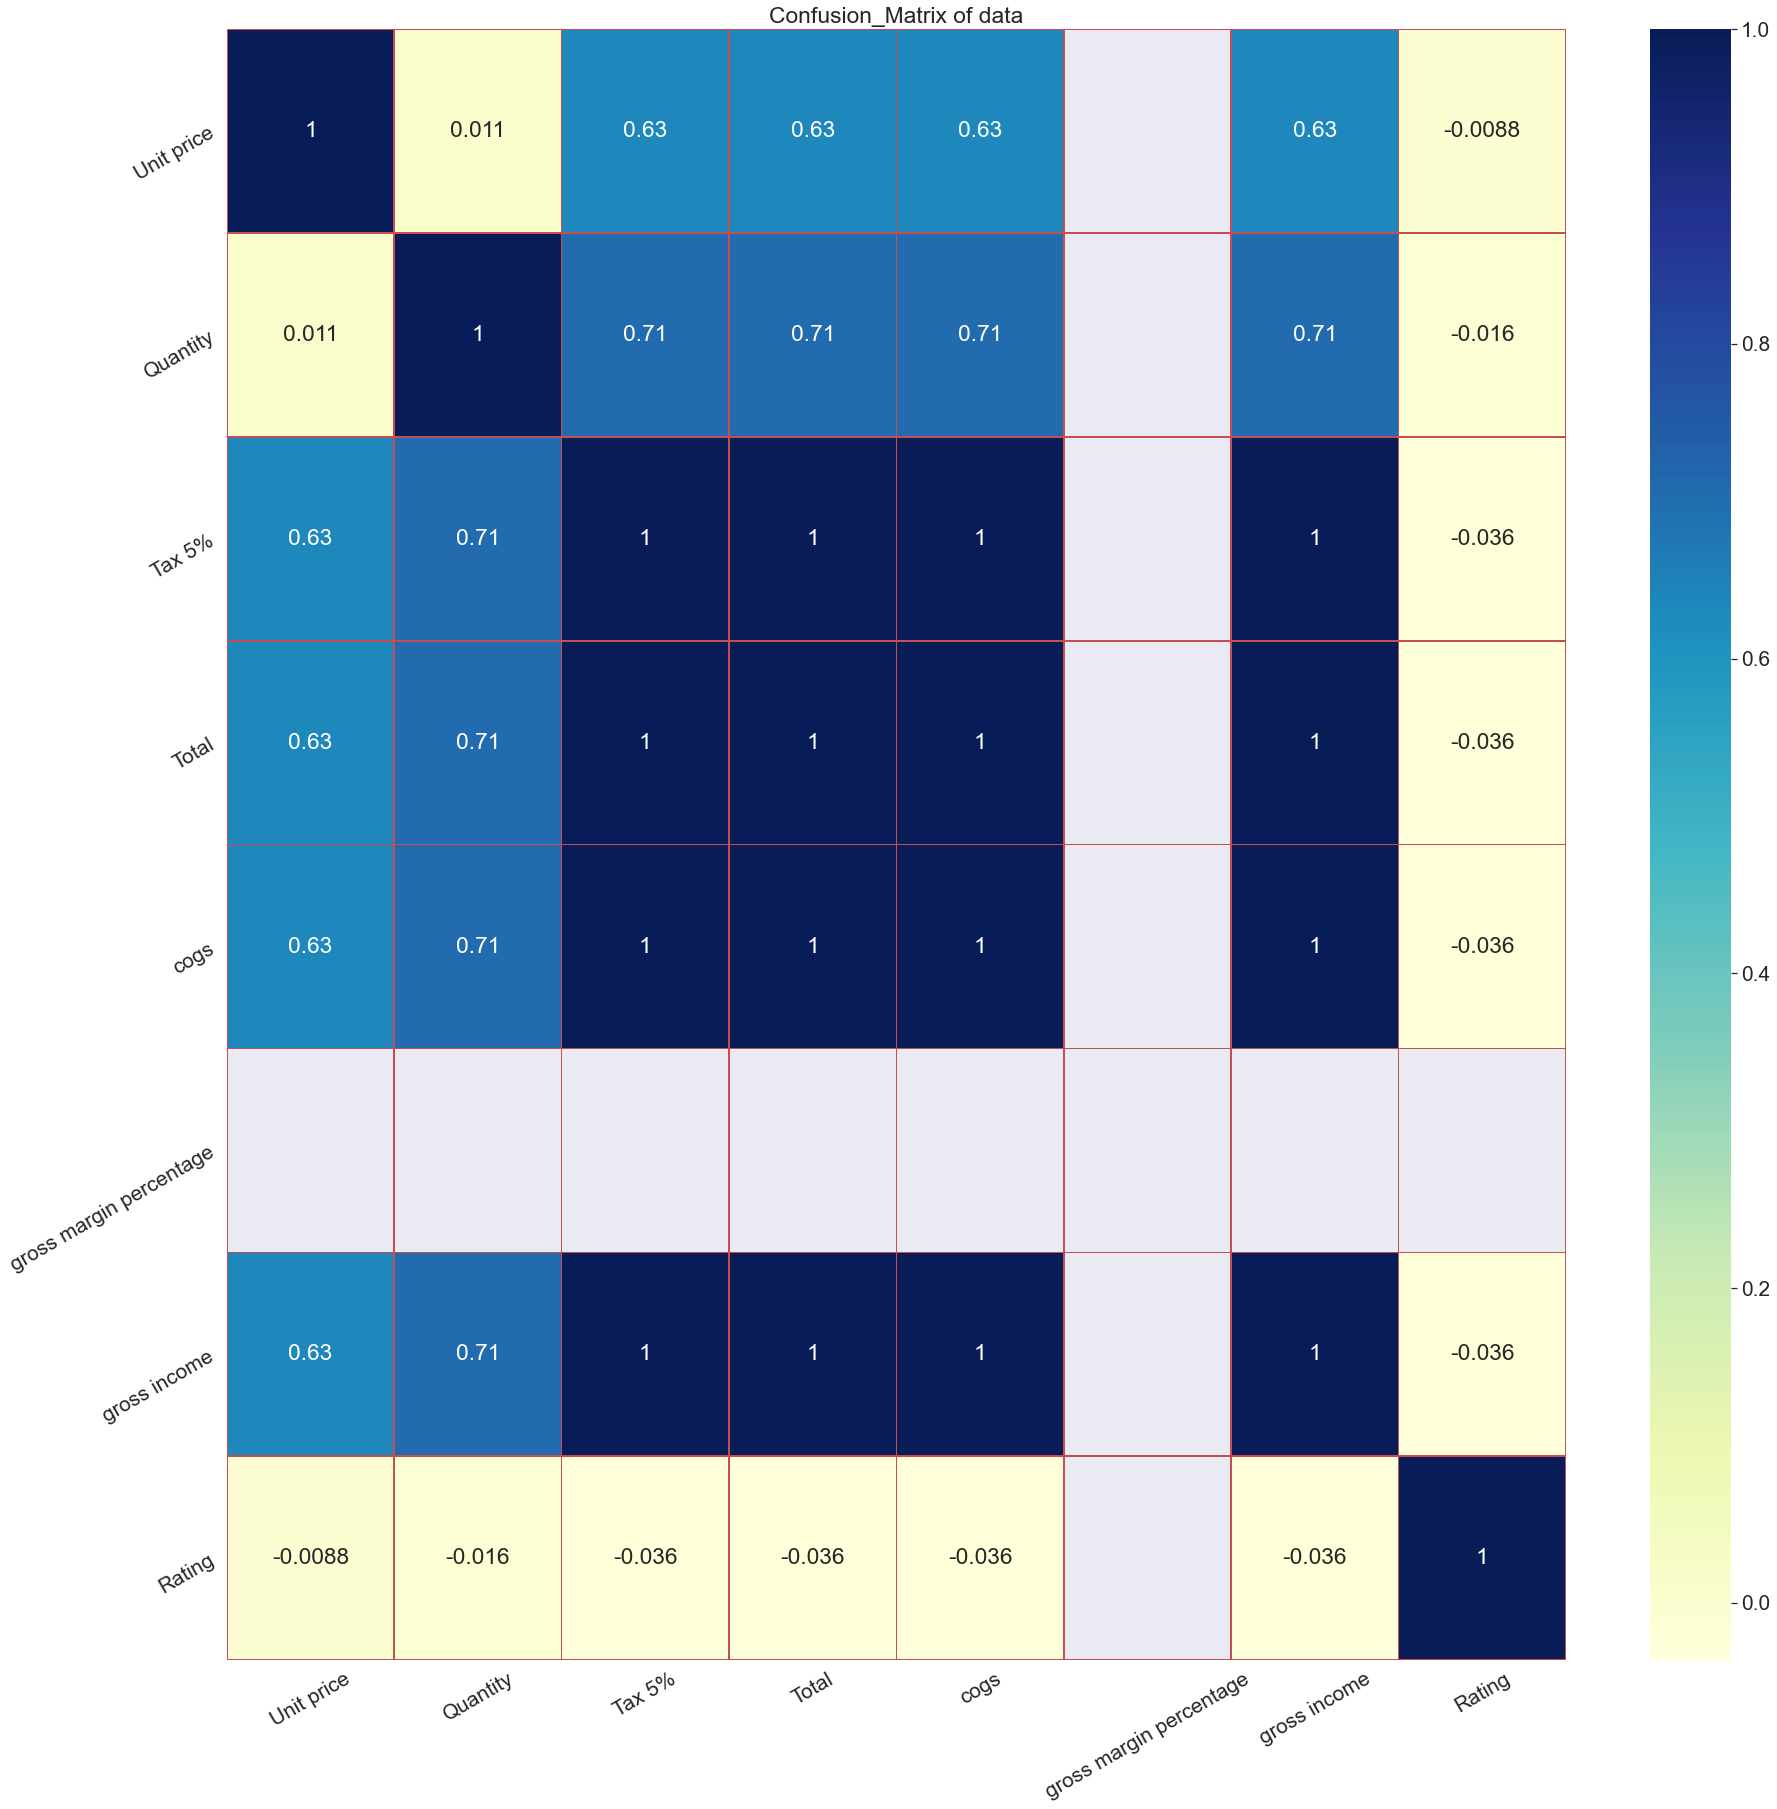

In [46]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.9)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

<AxesSubplot:xlabel='Unit price'>

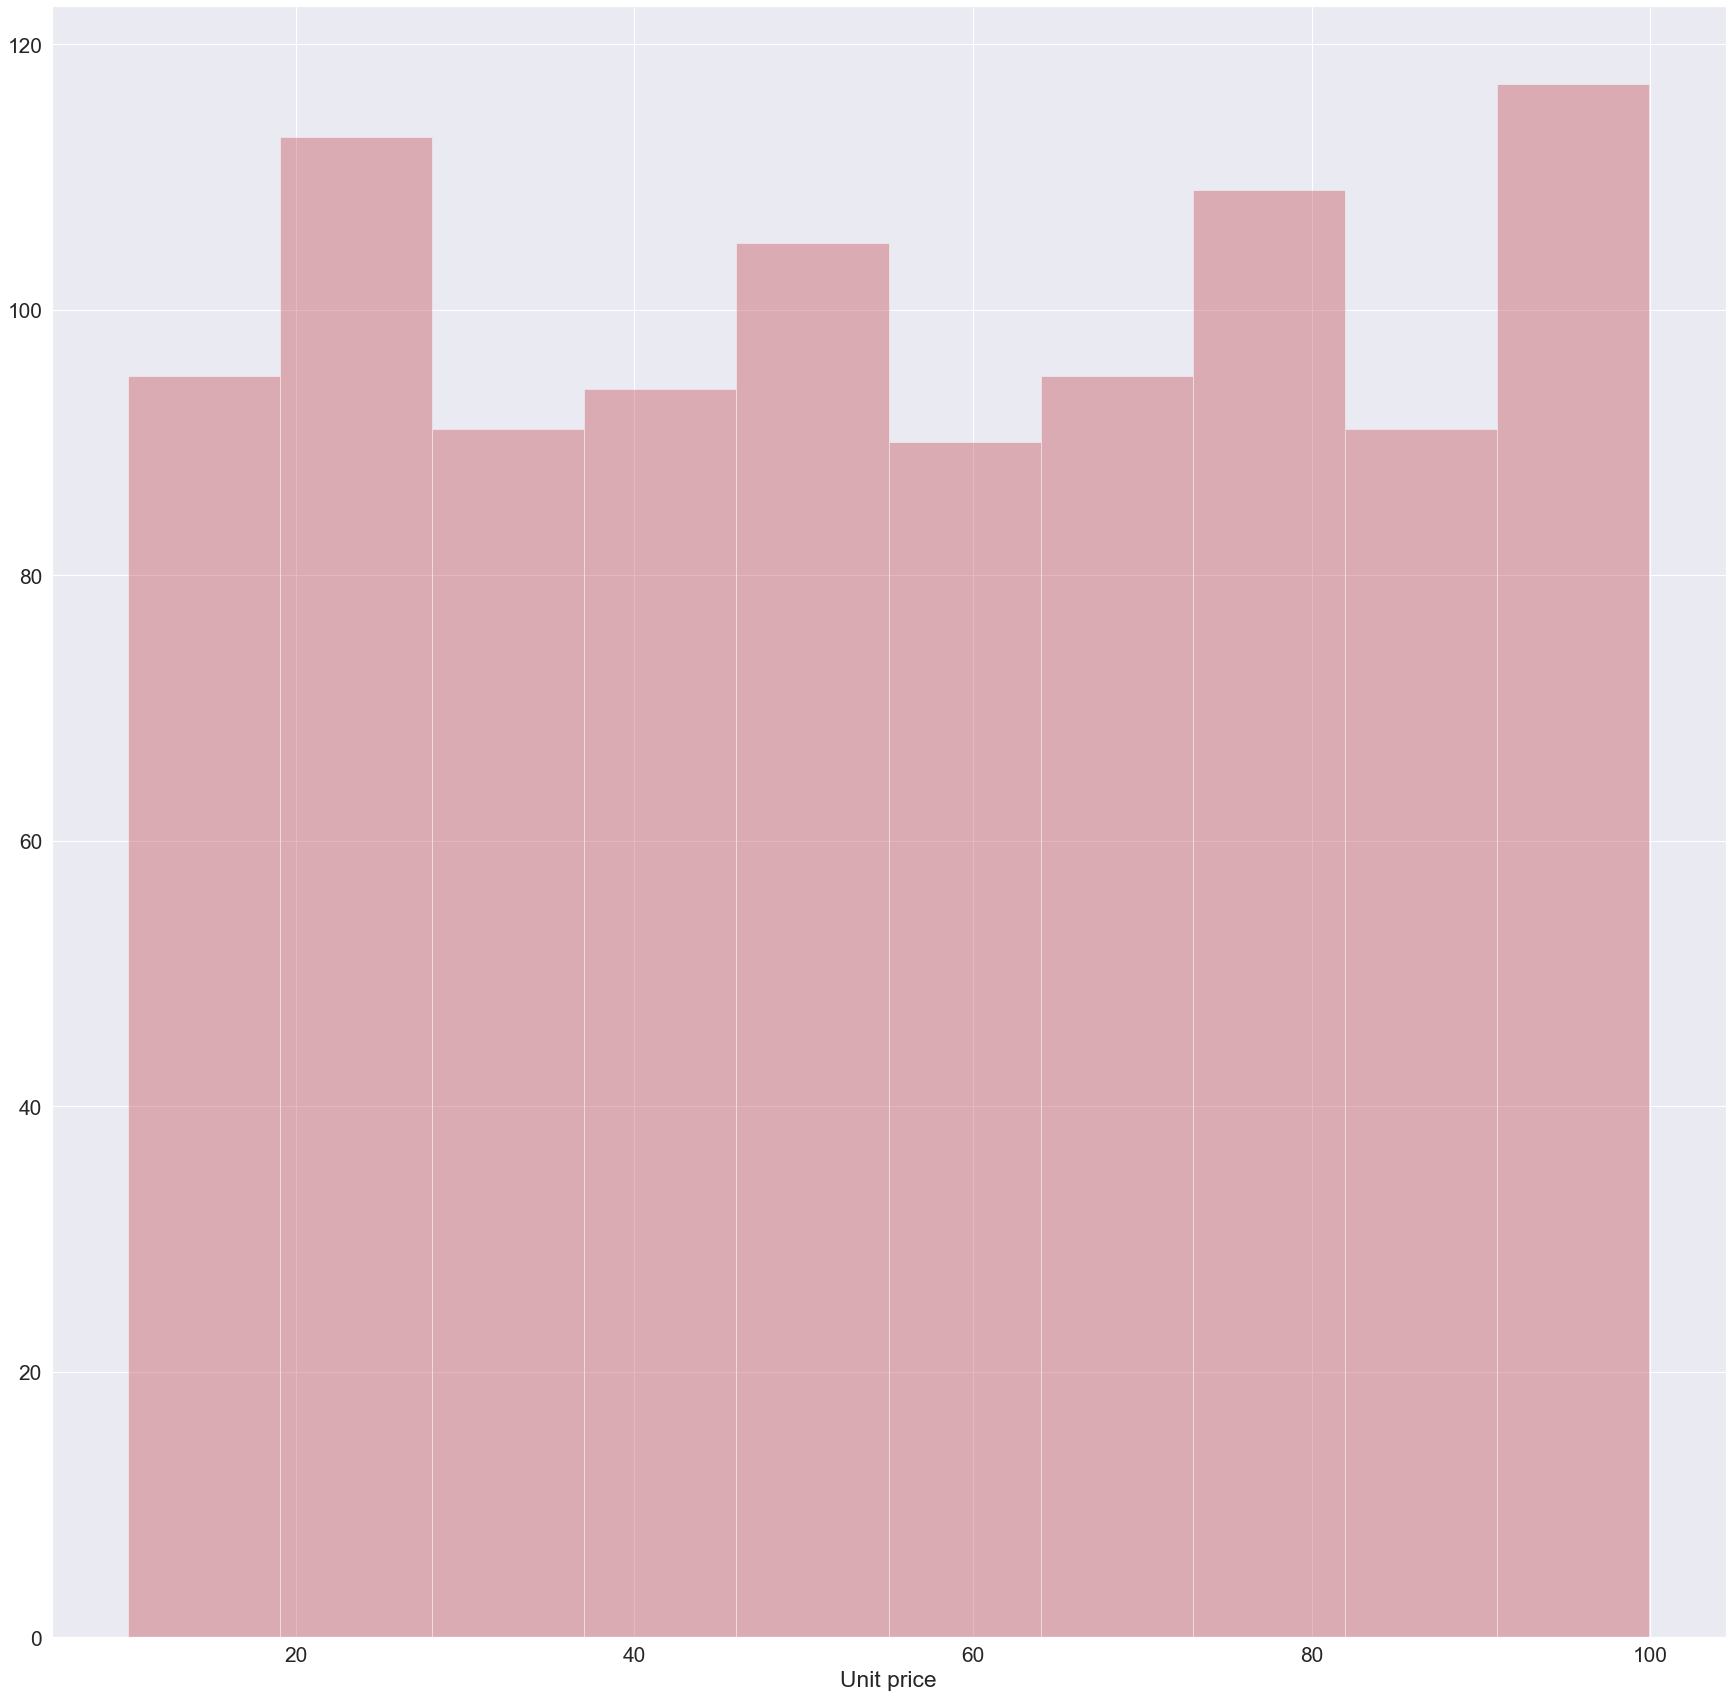

In [48]:
# identify The Unit price distribution 
sns.distplot(df["Unit price"] , kde=False , color="r")

<AxesSubplot:xlabel='Unit price', ylabel='Density'>

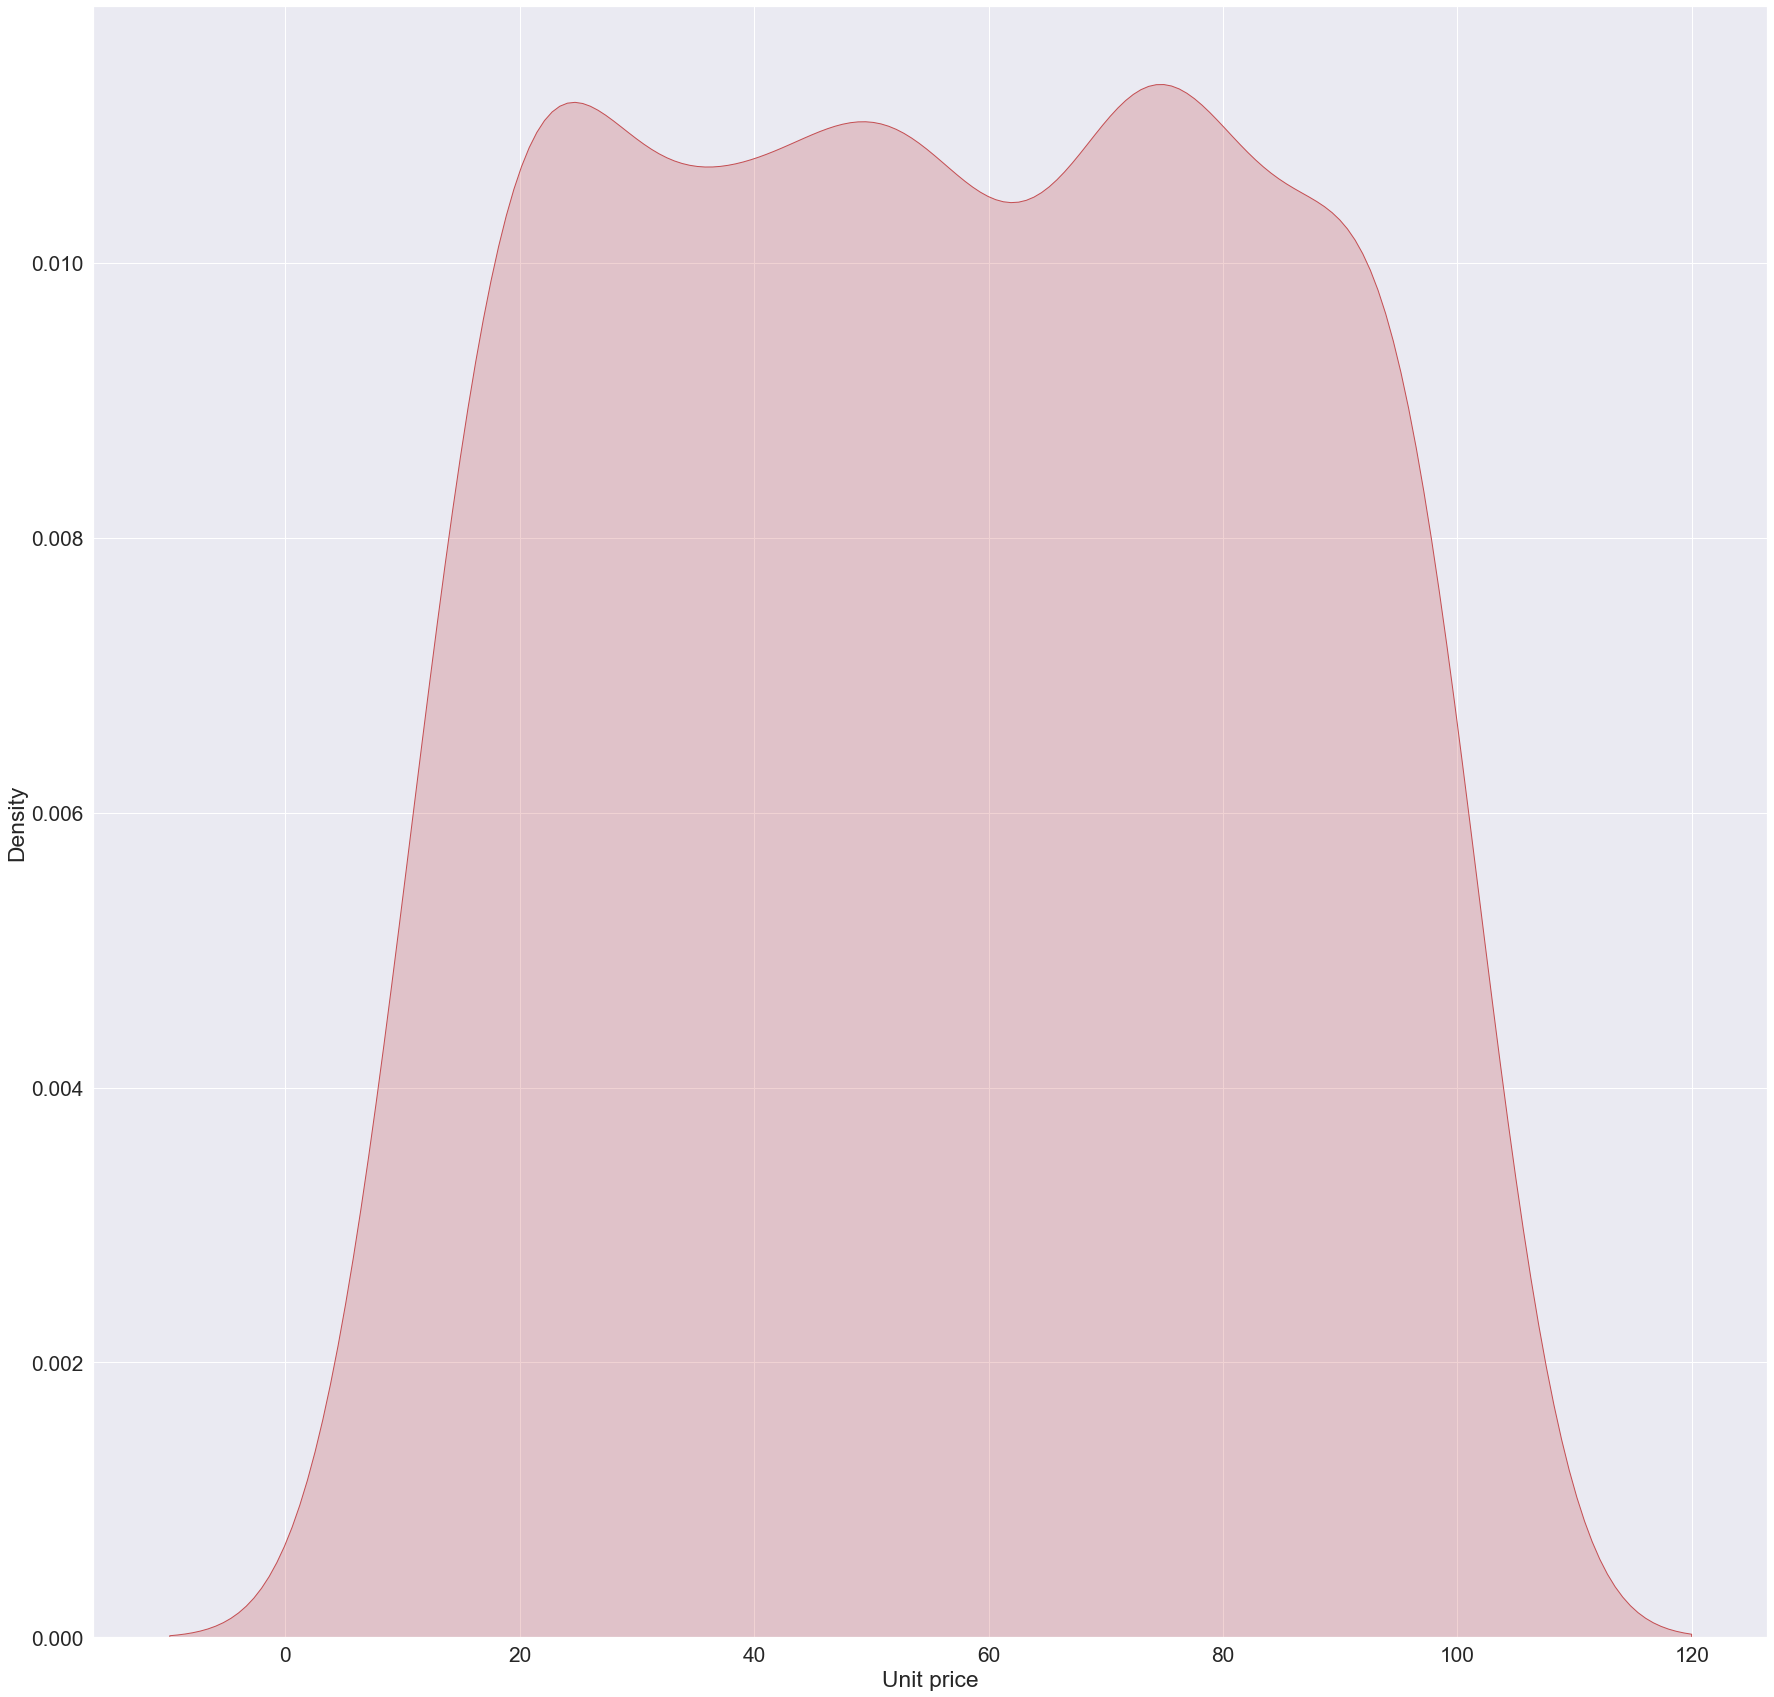

In [49]:
sns.kdeplot(df["Unit price"] , shade=True , color="r")

<AxesSubplot:xlabel='Total'>

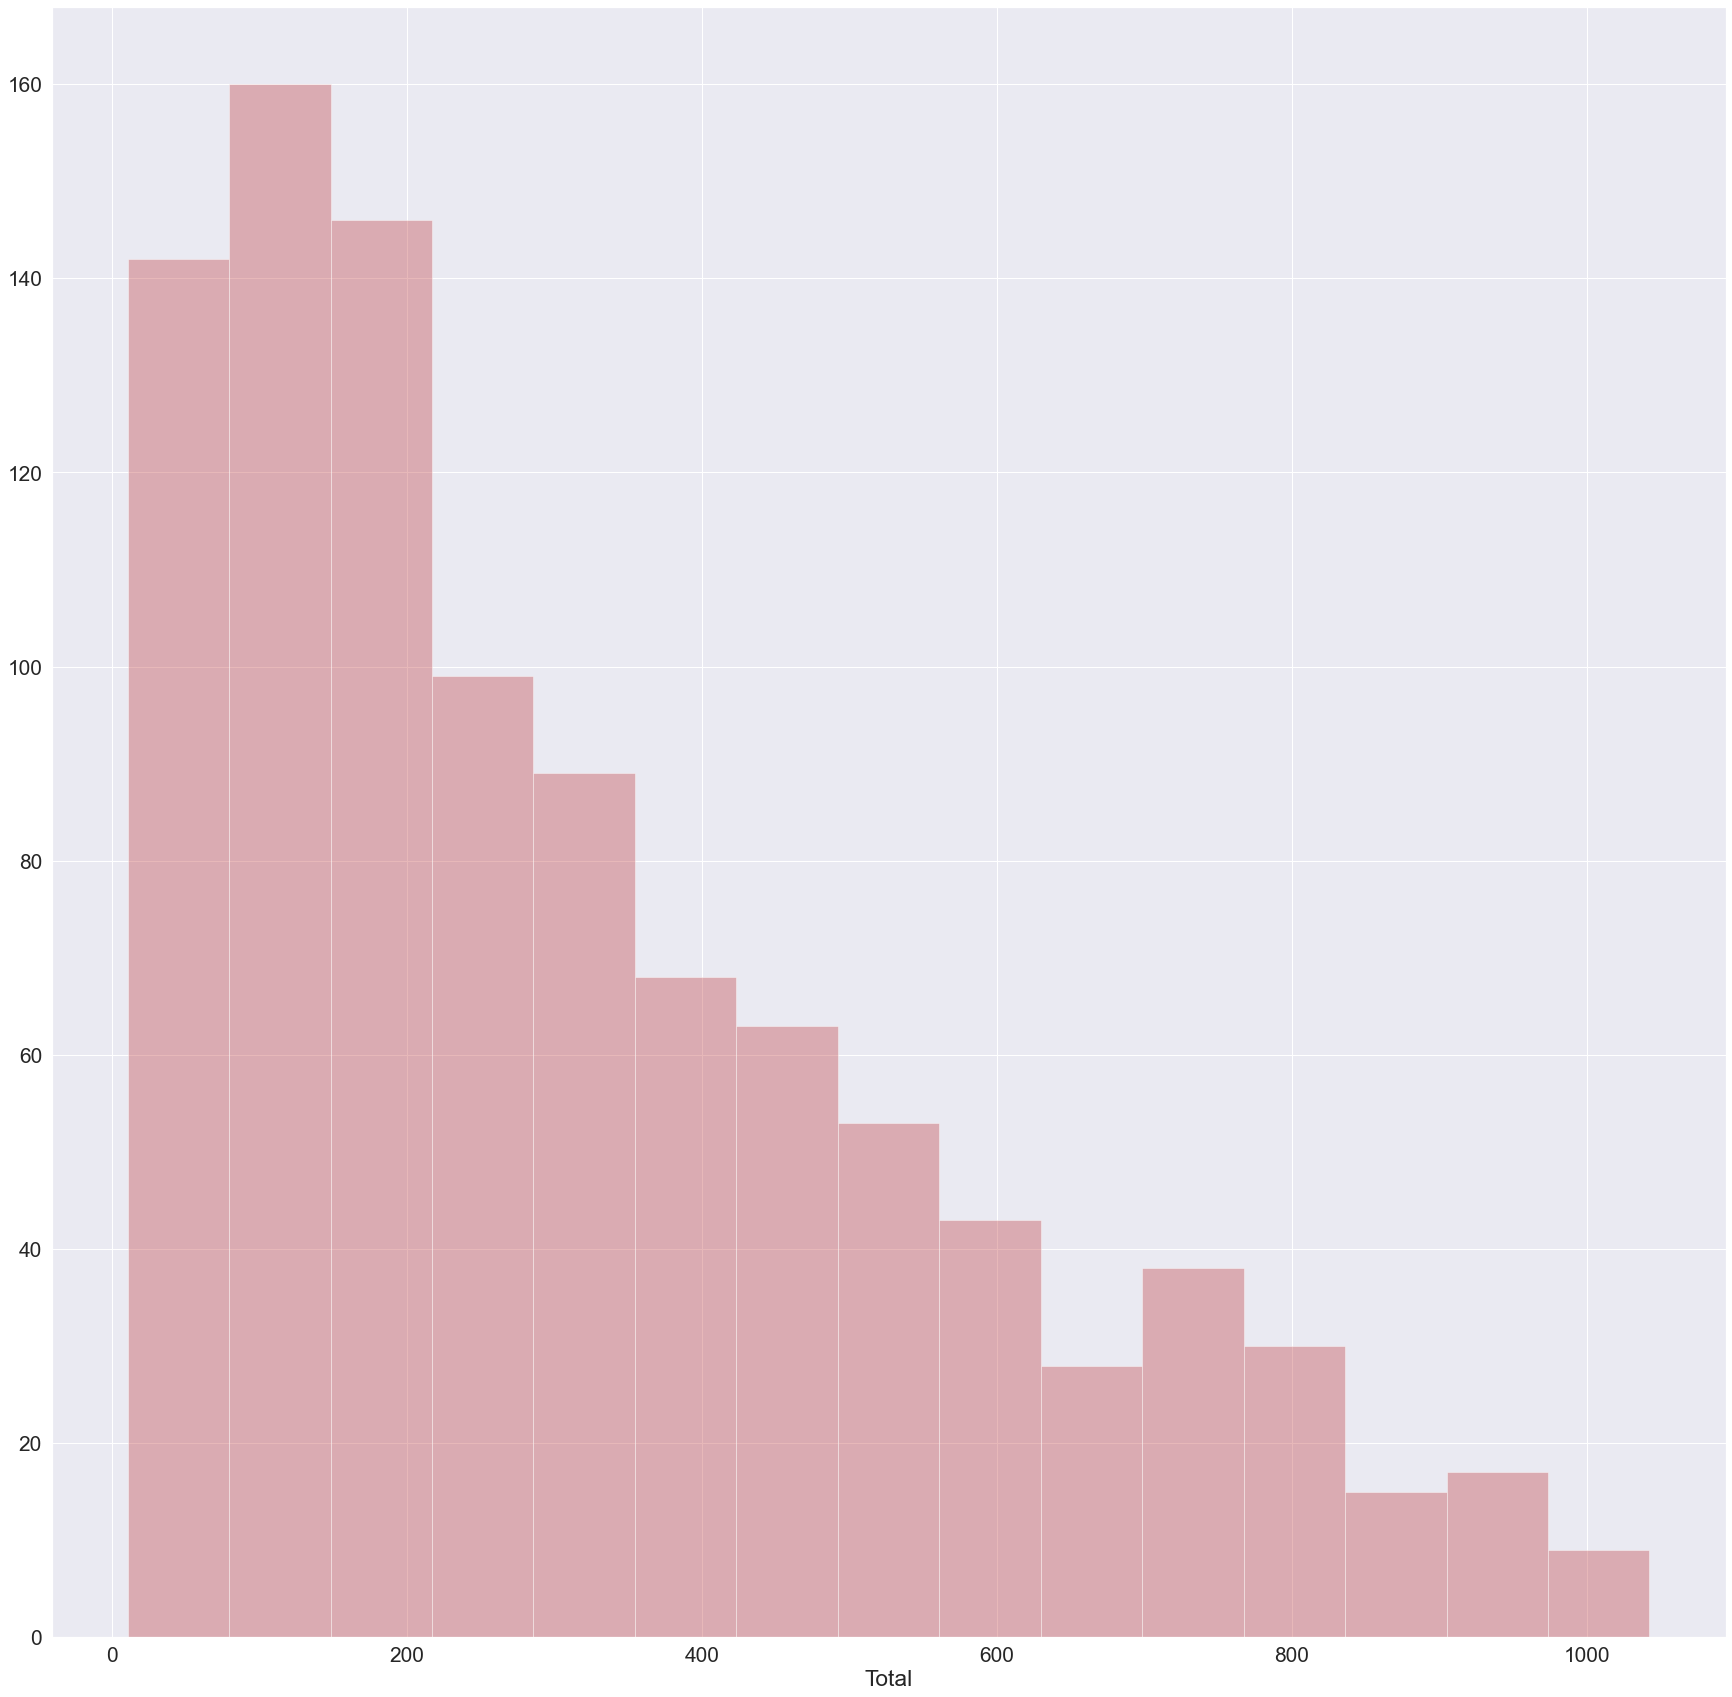

In [50]:
# identify The Total distribution 
sns.distplot(df["Total"] , kde=False , color="r")

<AxesSubplot:xlabel='Total', ylabel='Density'>

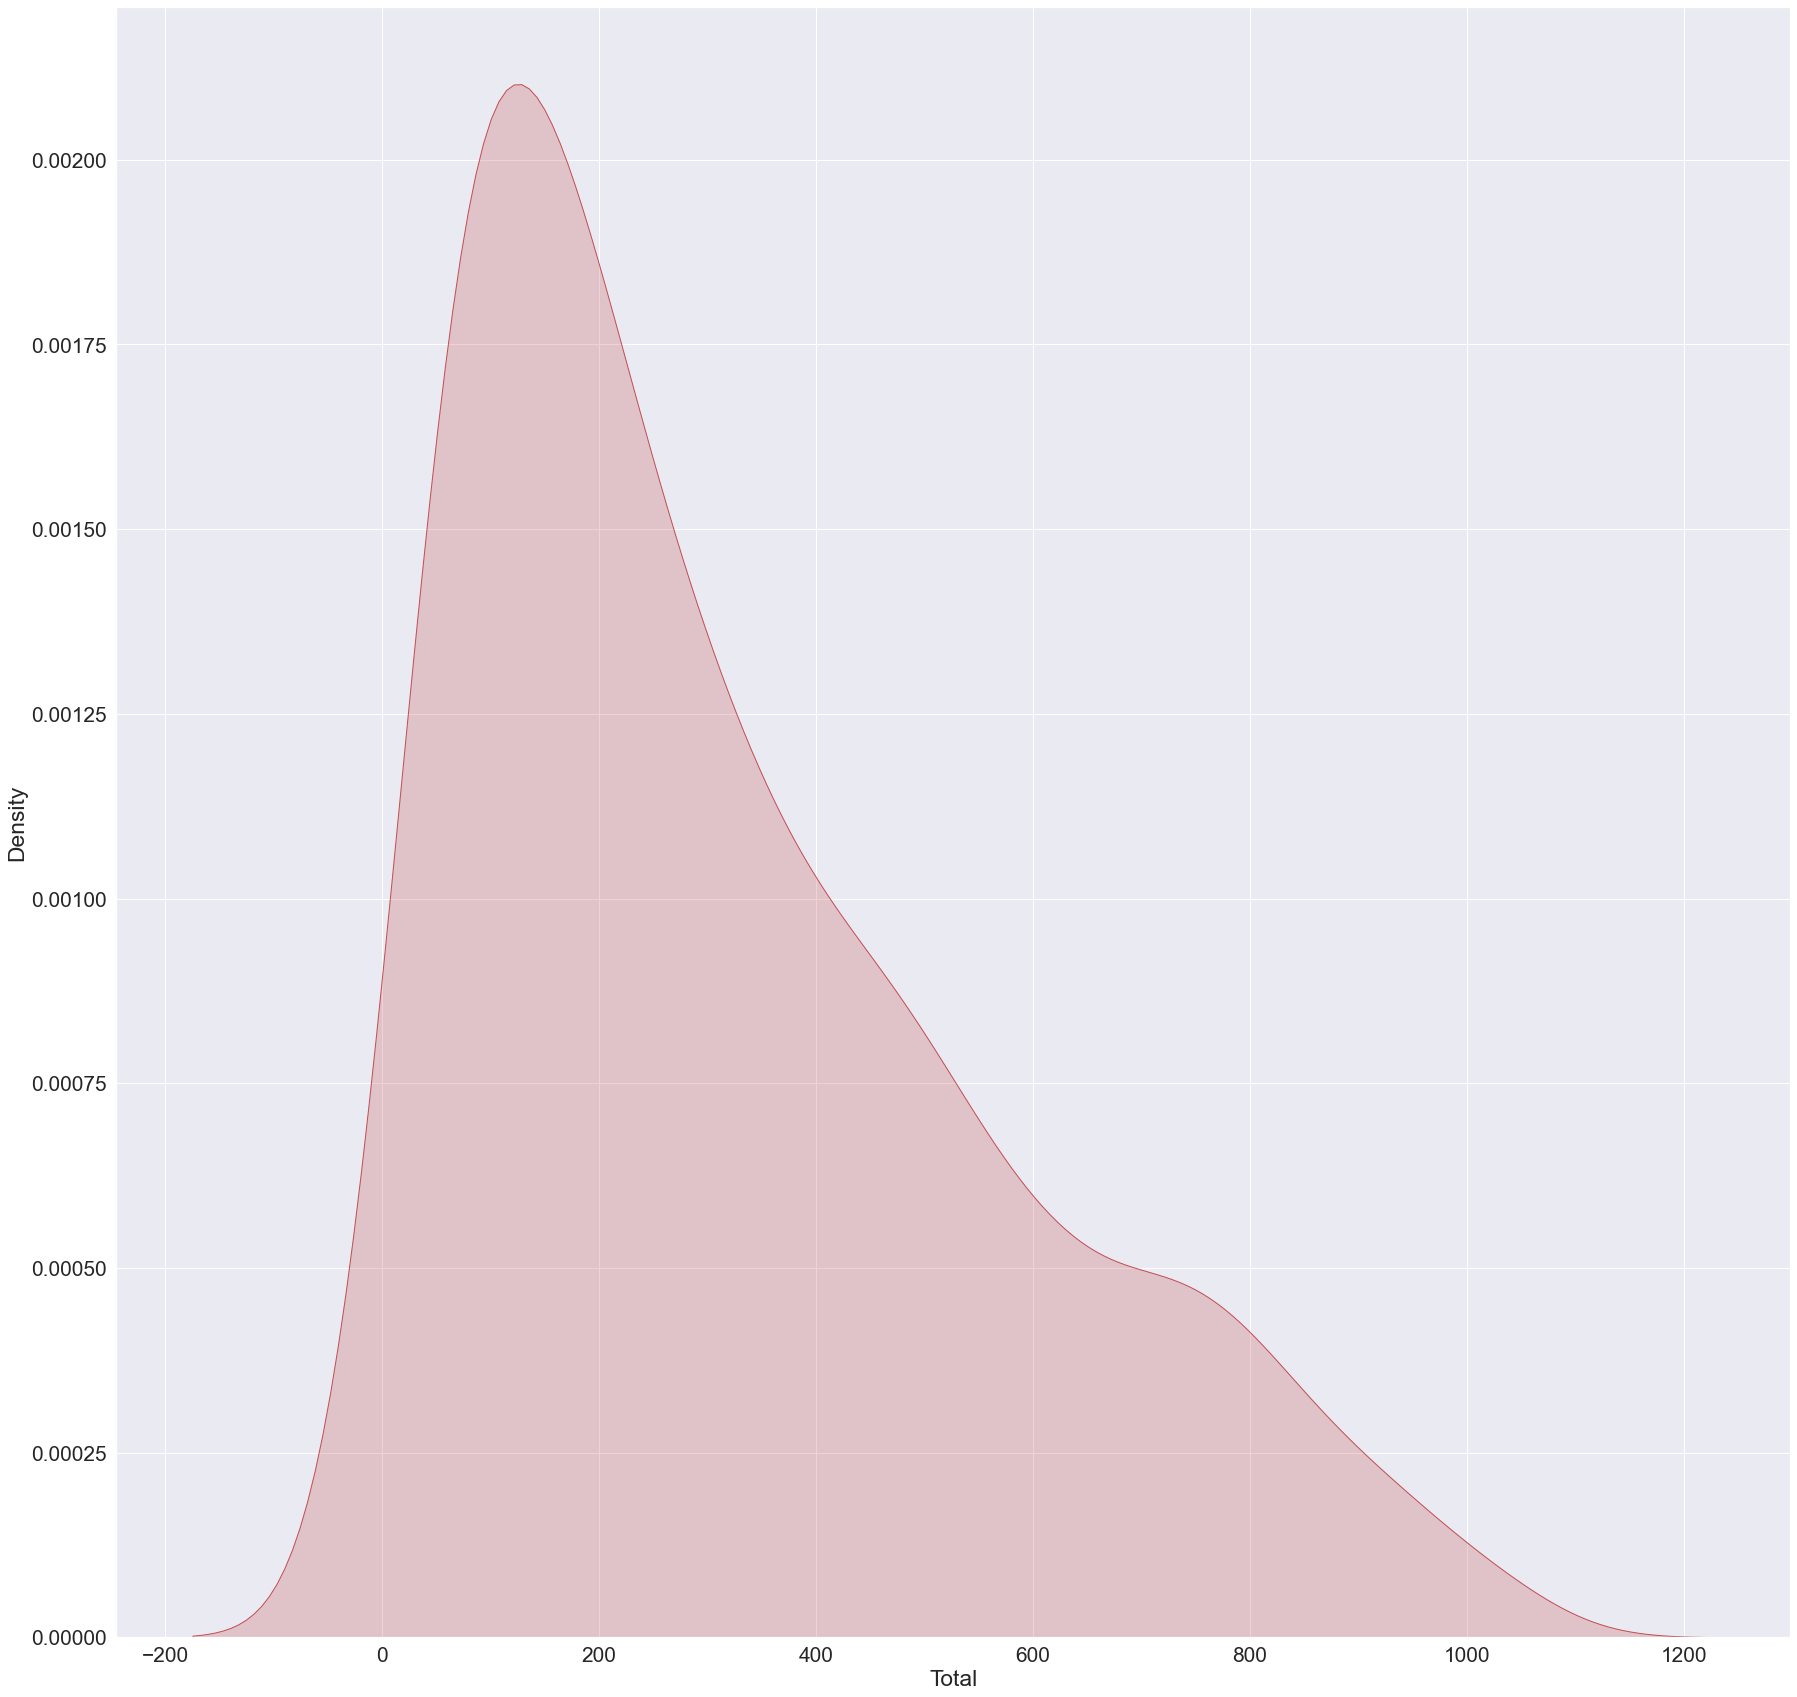

In [51]:
sns.kdeplot(df["Total"] , shade=True , color="r")

<AxesSubplot:xlabel='cogs'>

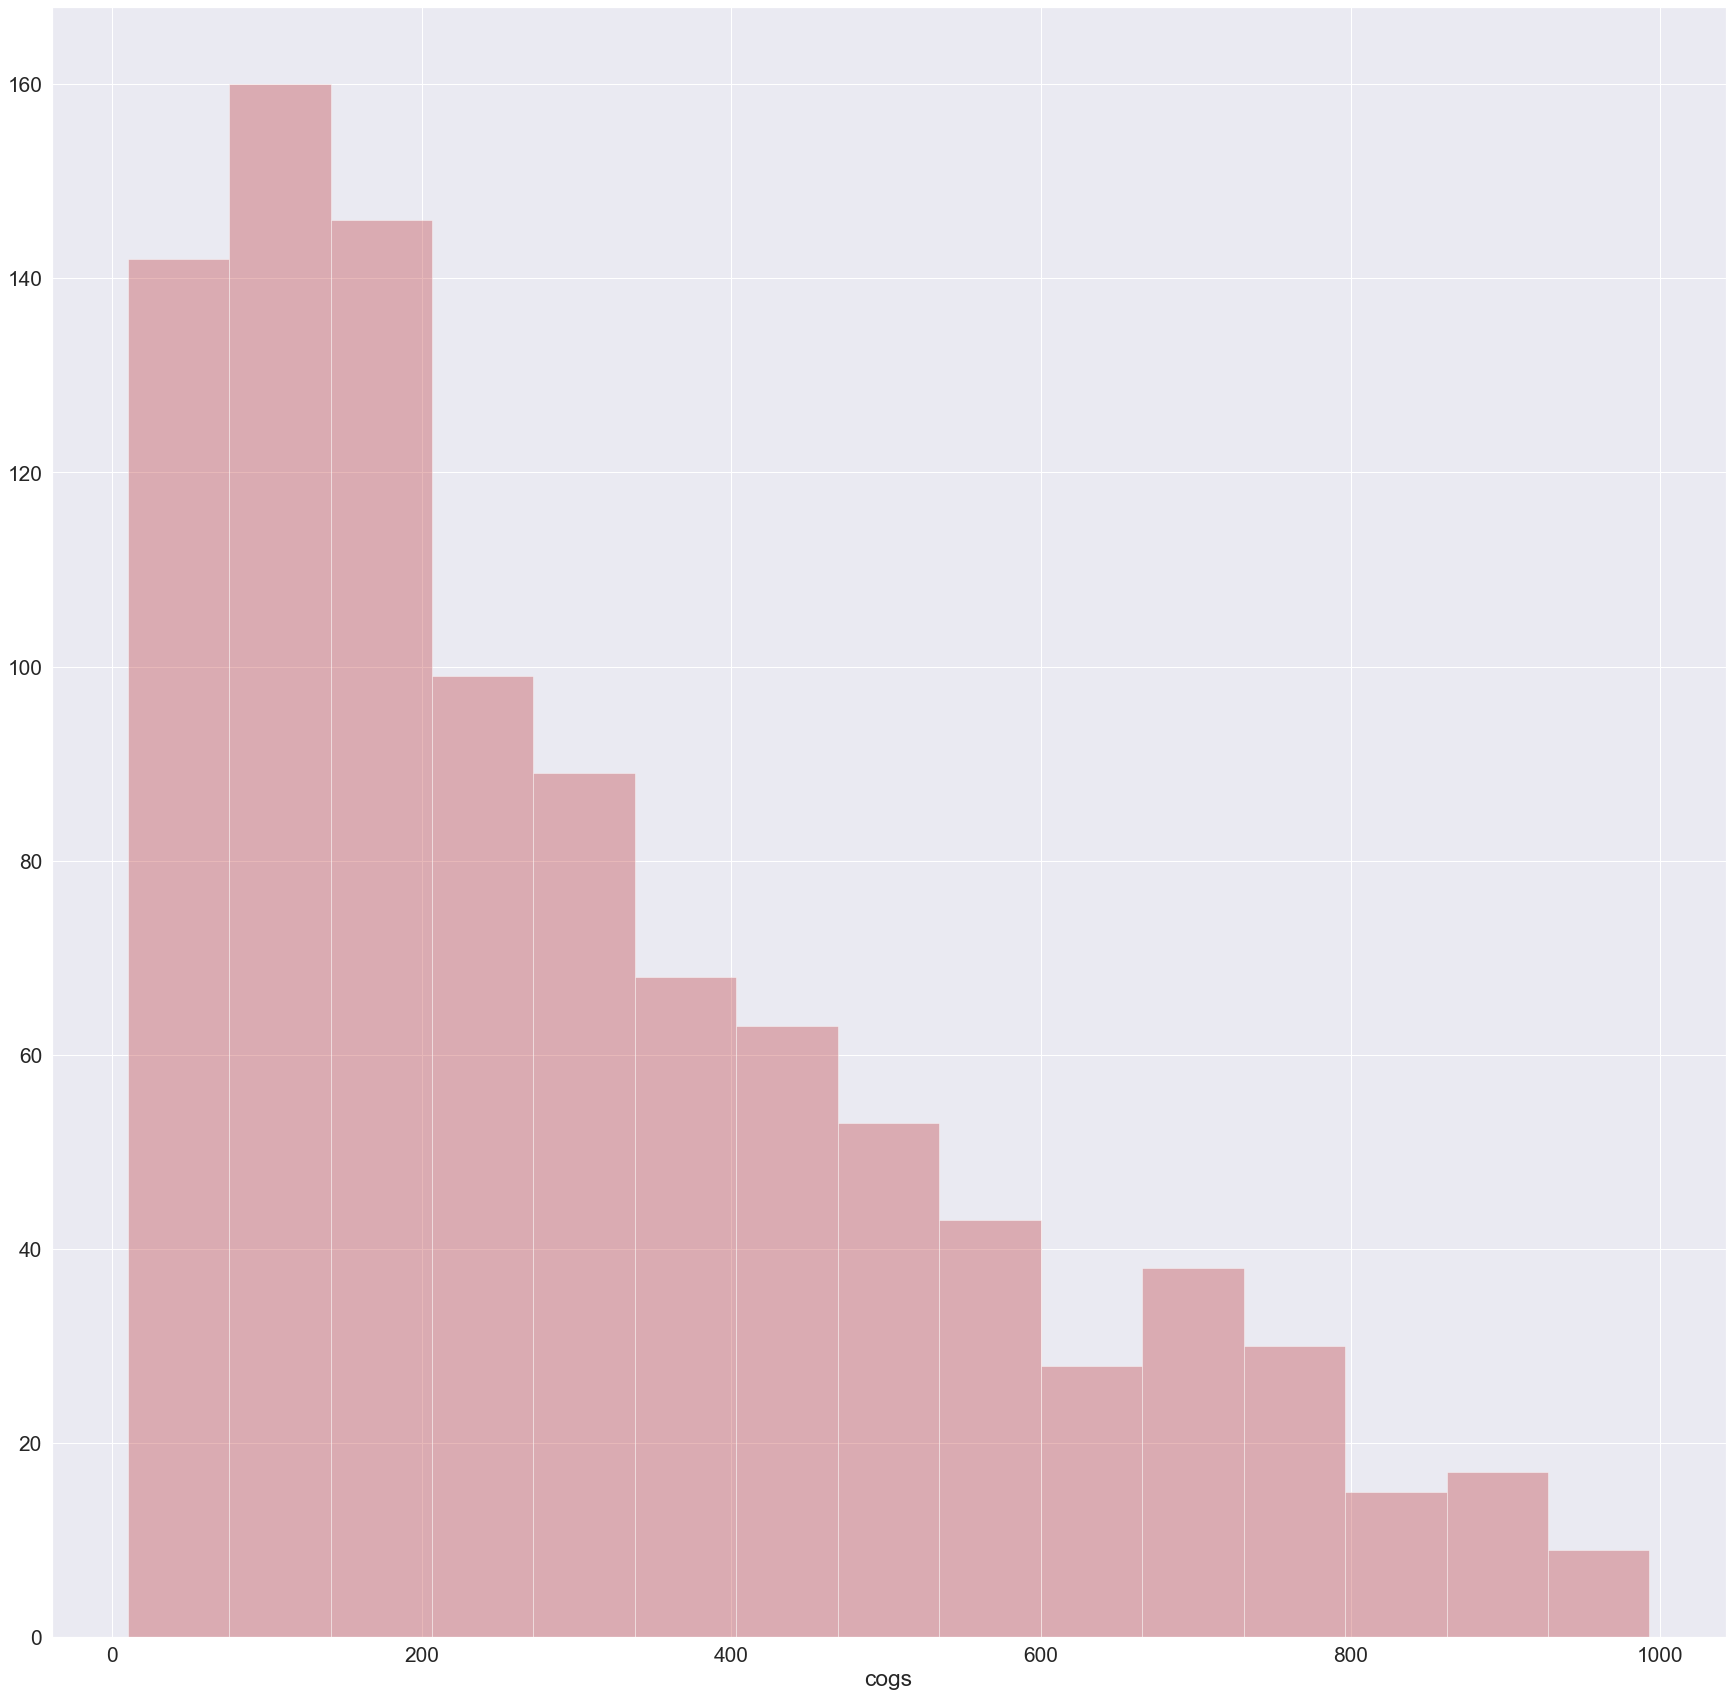

In [52]:
# identify The cogs distribution 
sns.distplot(df["cogs"] , kde=False , color="r")

<AxesSubplot:xlabel='cogs', ylabel='Density'>

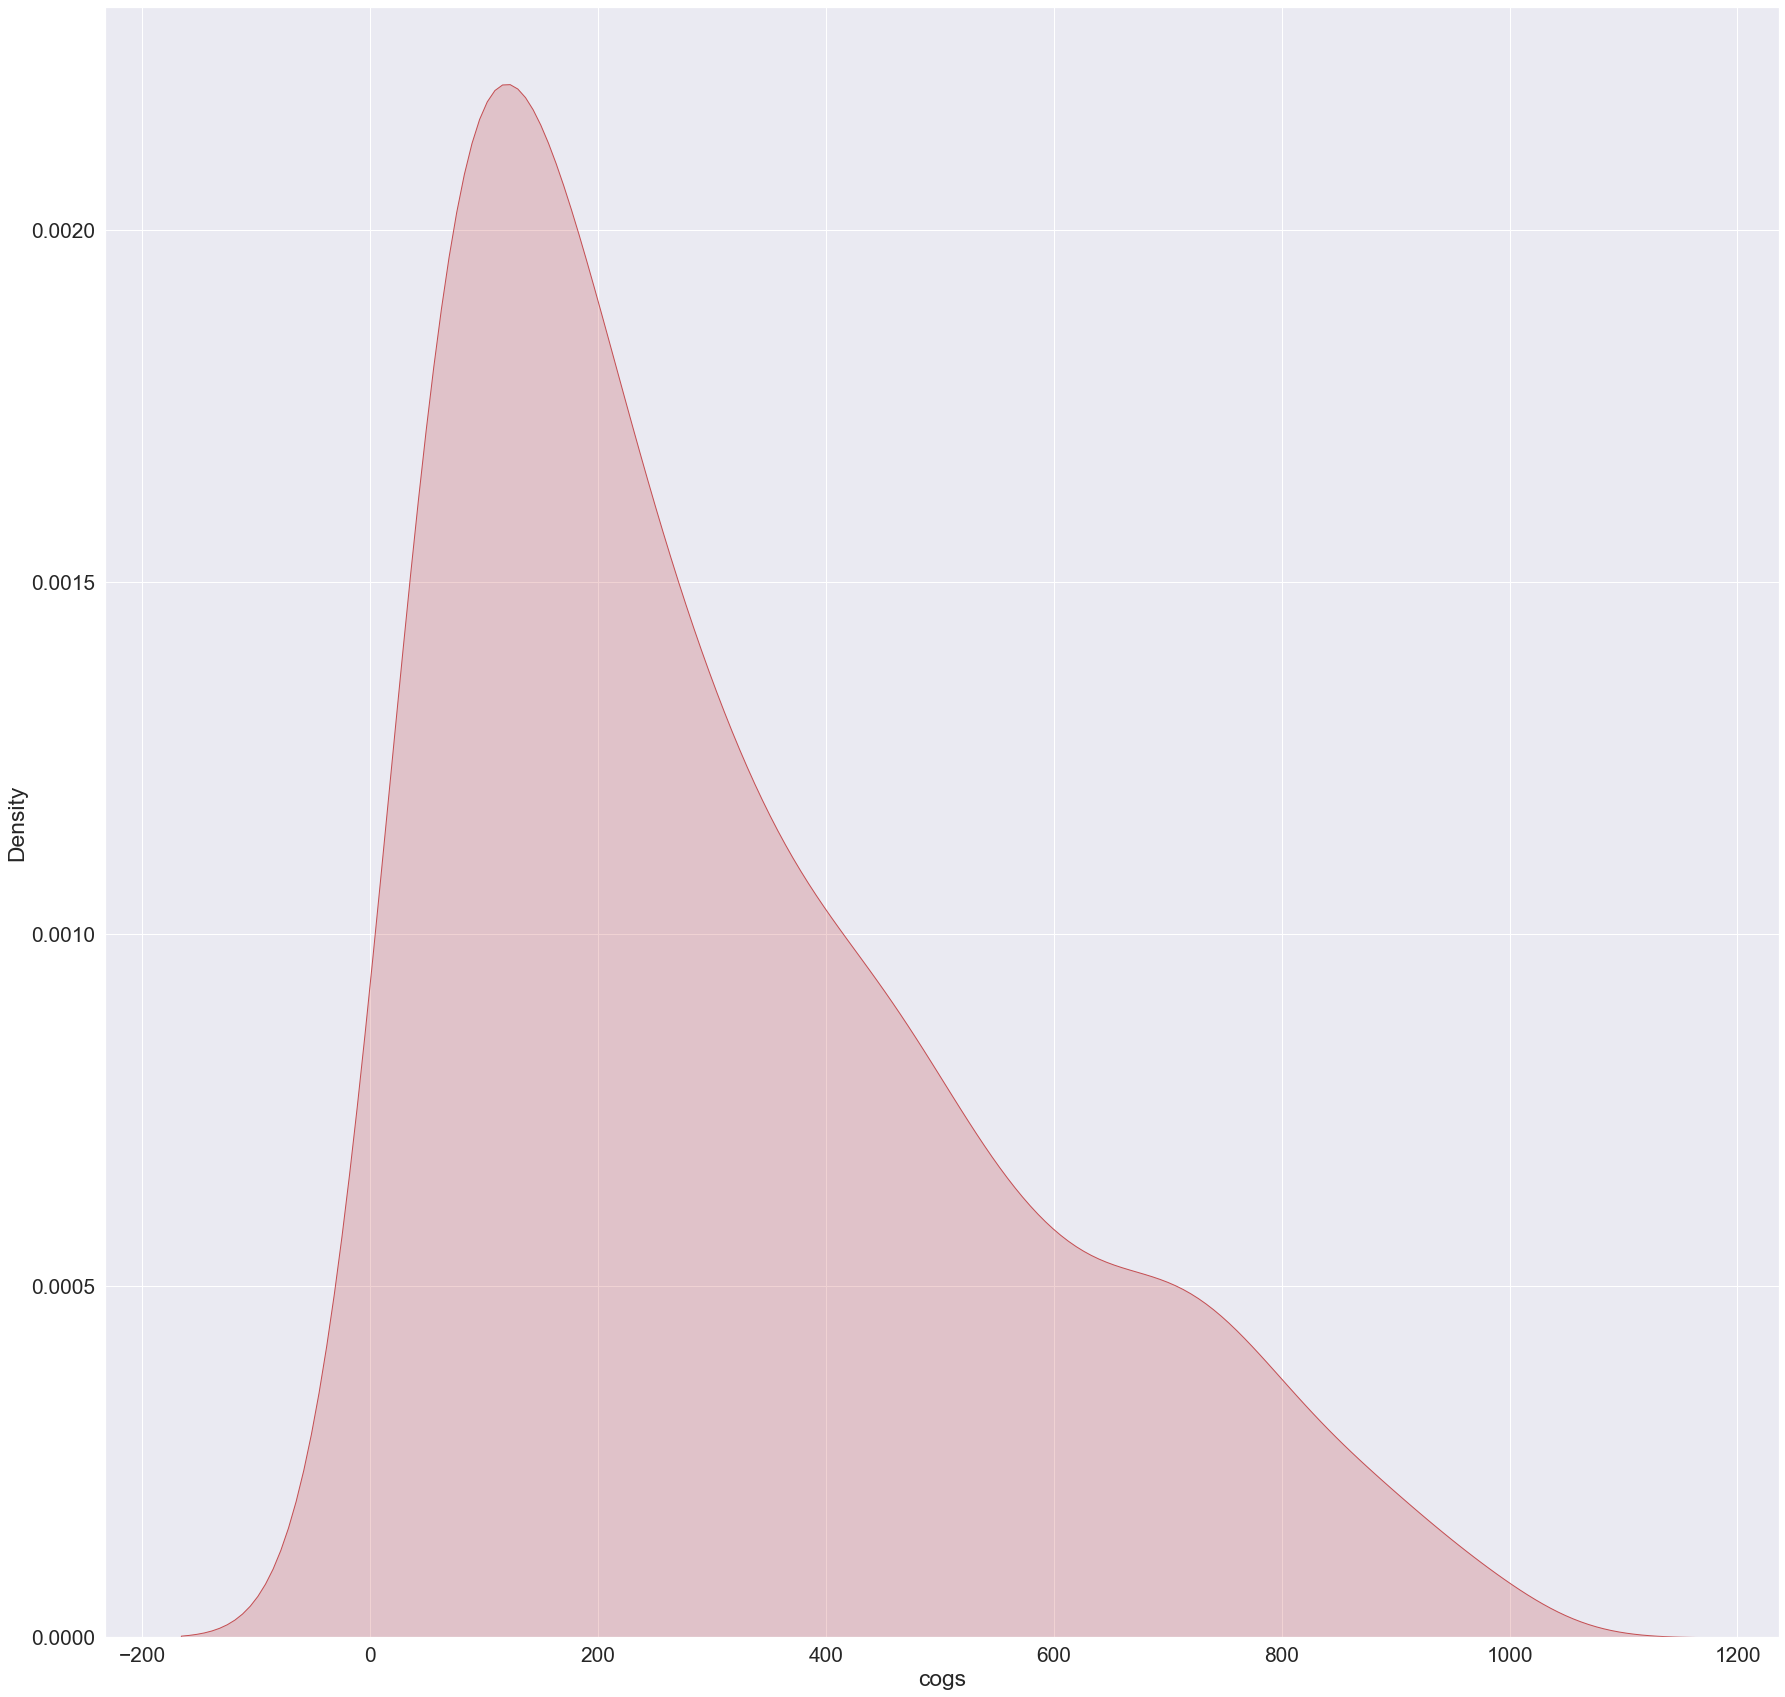

In [53]:
sns.kdeplot(df["cogs"] , shade=True , color="r")

<AxesSubplot:xlabel='gross margin percentage'>

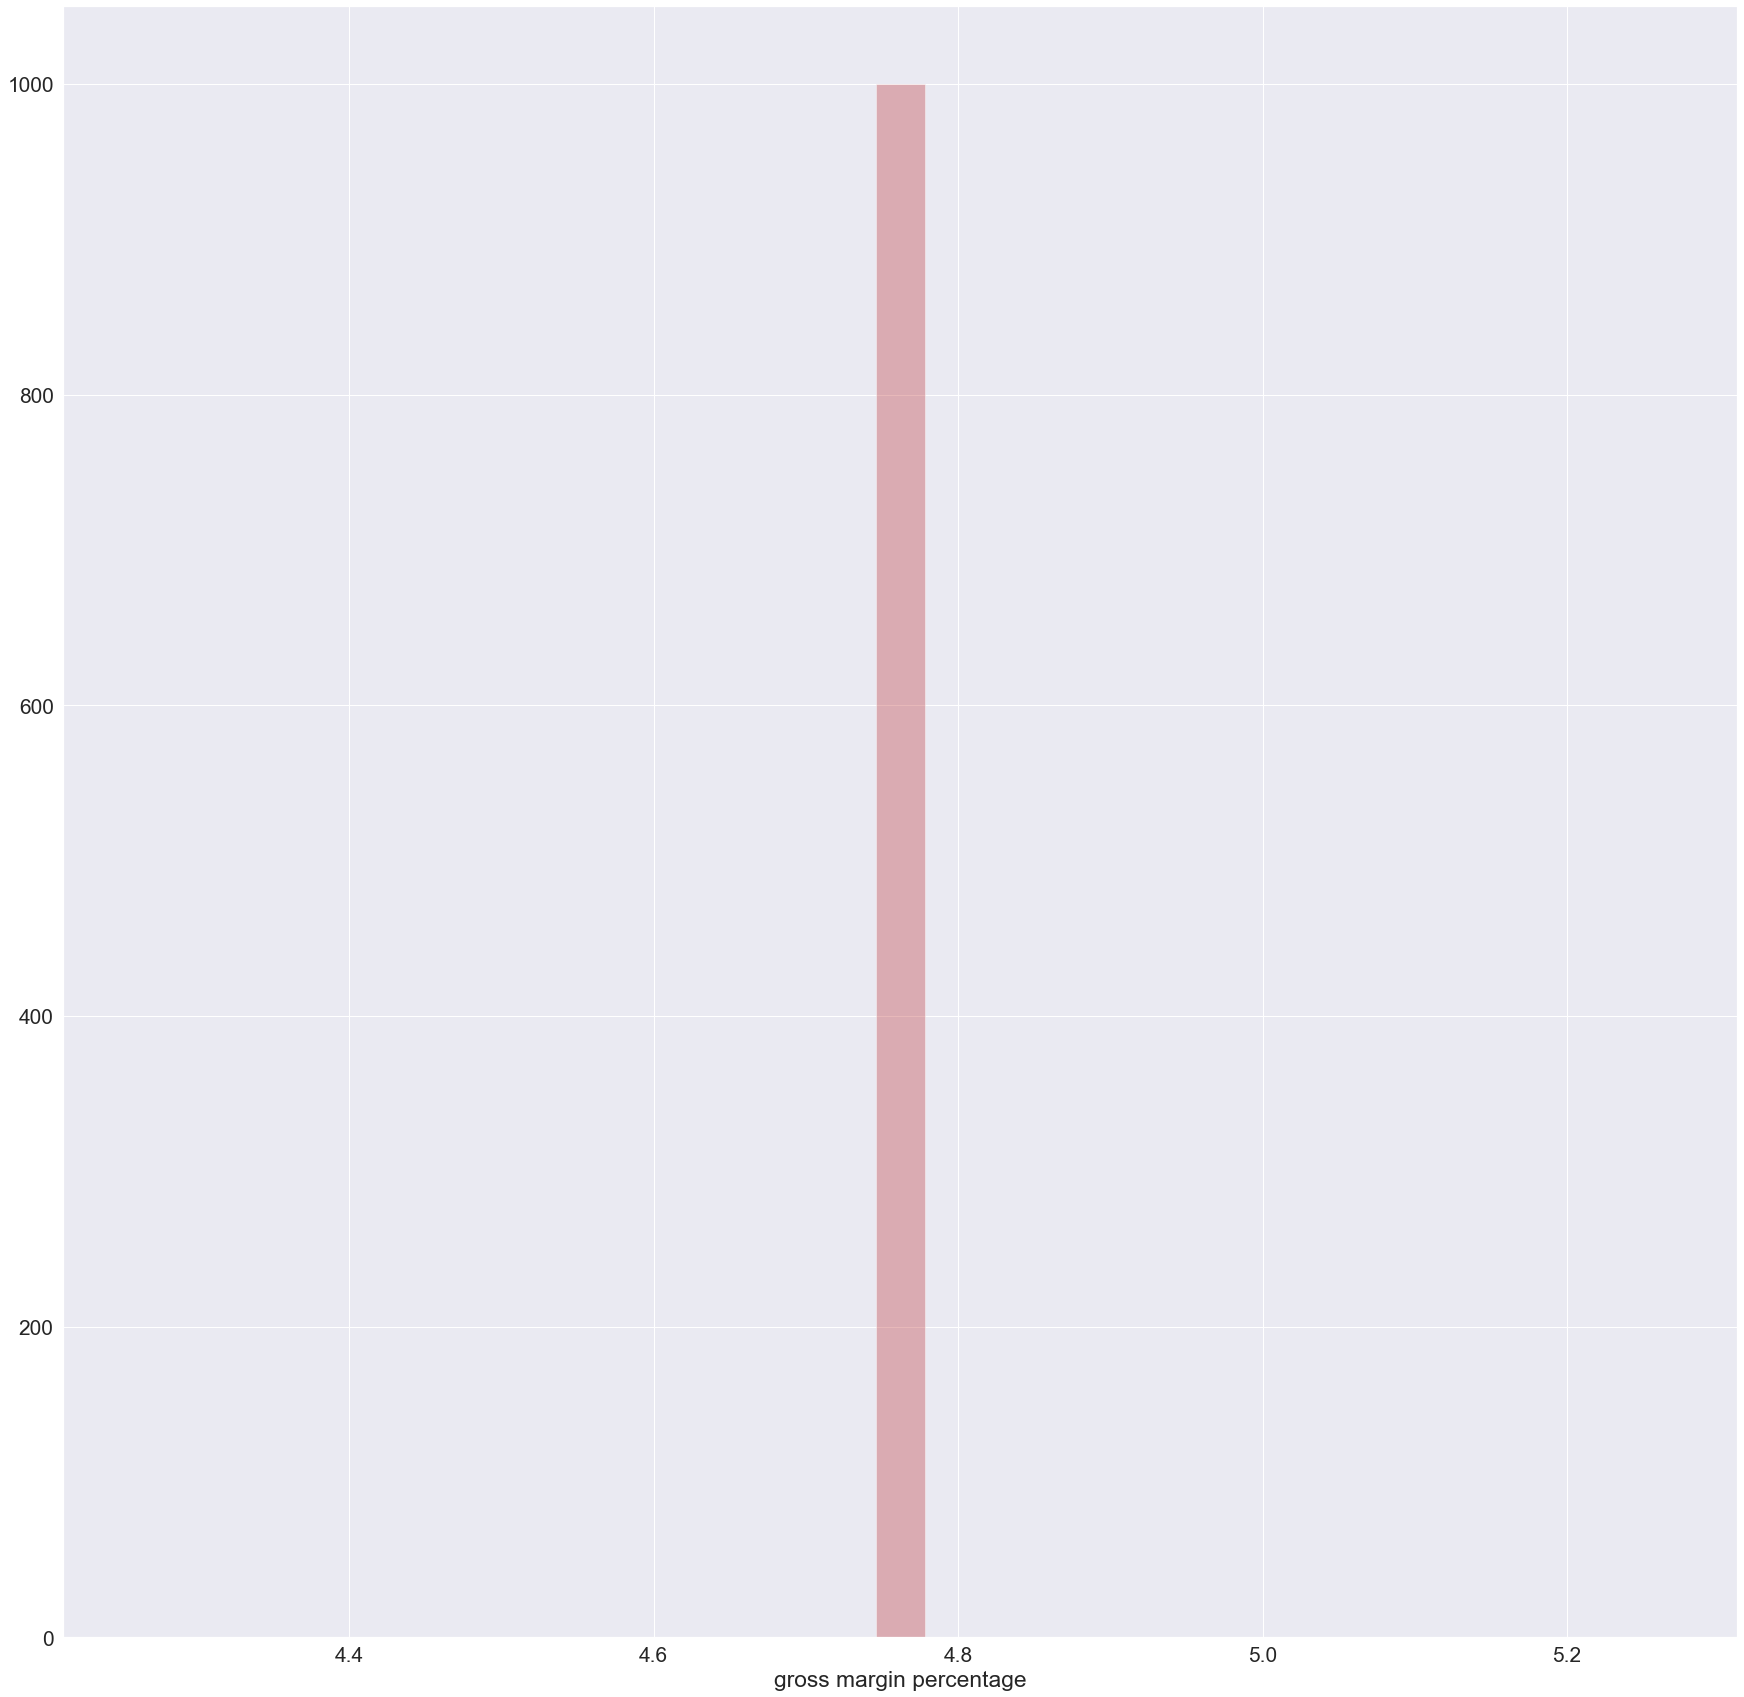

In [54]:
# identify The  margin percentage distribution 
sns.distplot(df["gross margin percentage"] , kde=False , color="r")

<AxesSubplot:xlabel='gross margin percentage', ylabel='Density'>

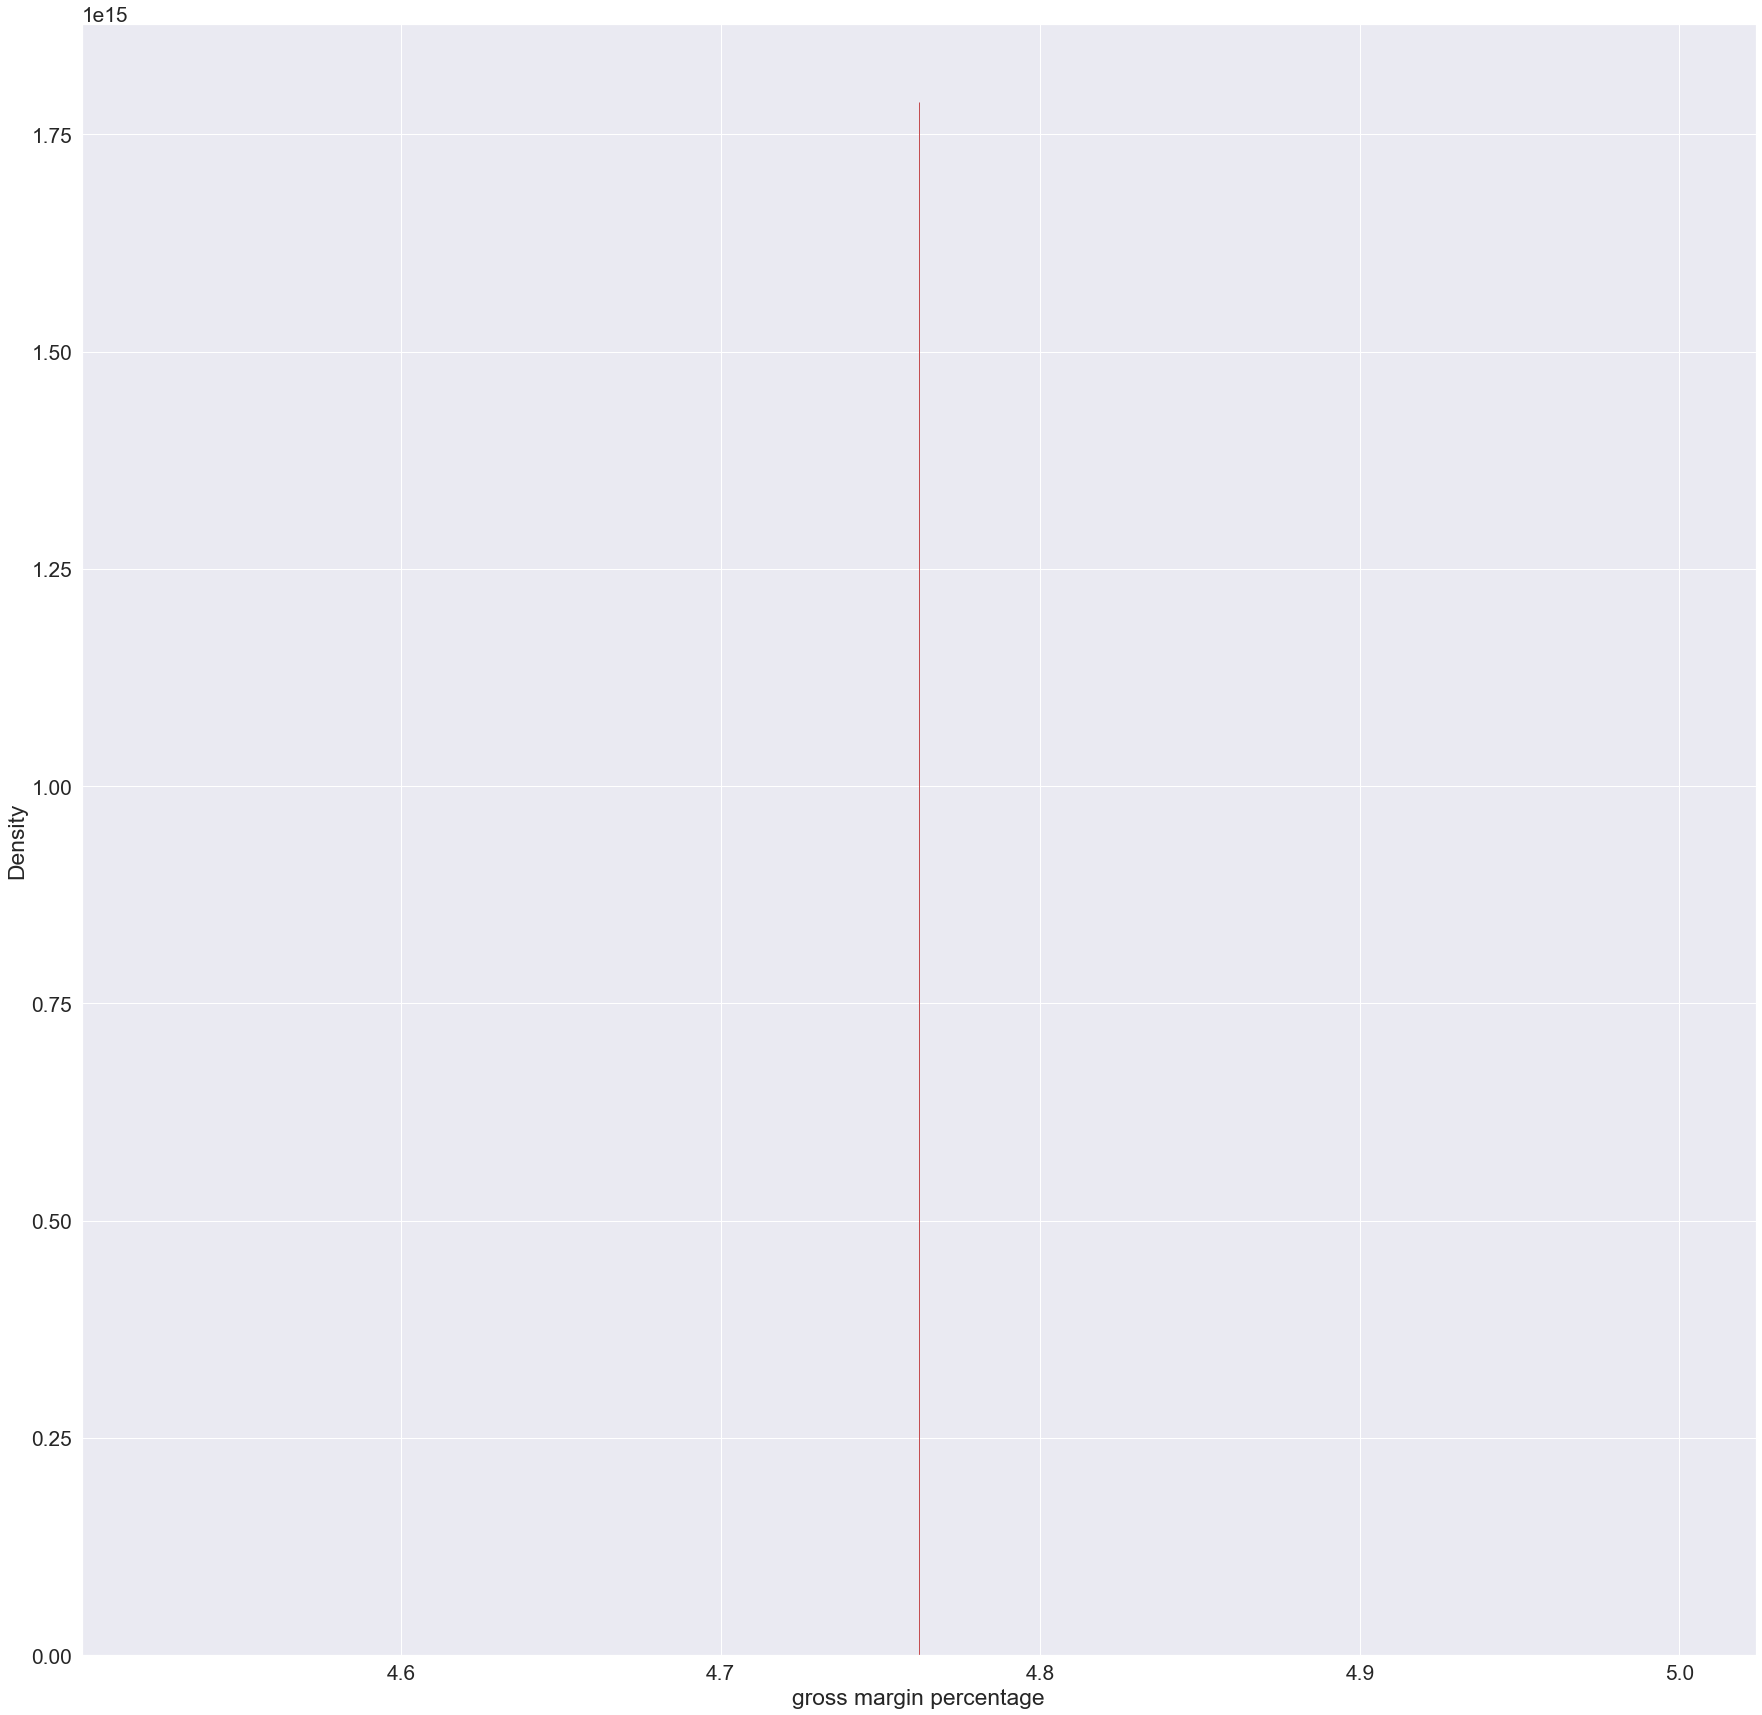

In [55]:
sns.kdeplot(df["gross margin percentage"] , shade=True , color="r")

<AxesSubplot:xlabel='Rating'>

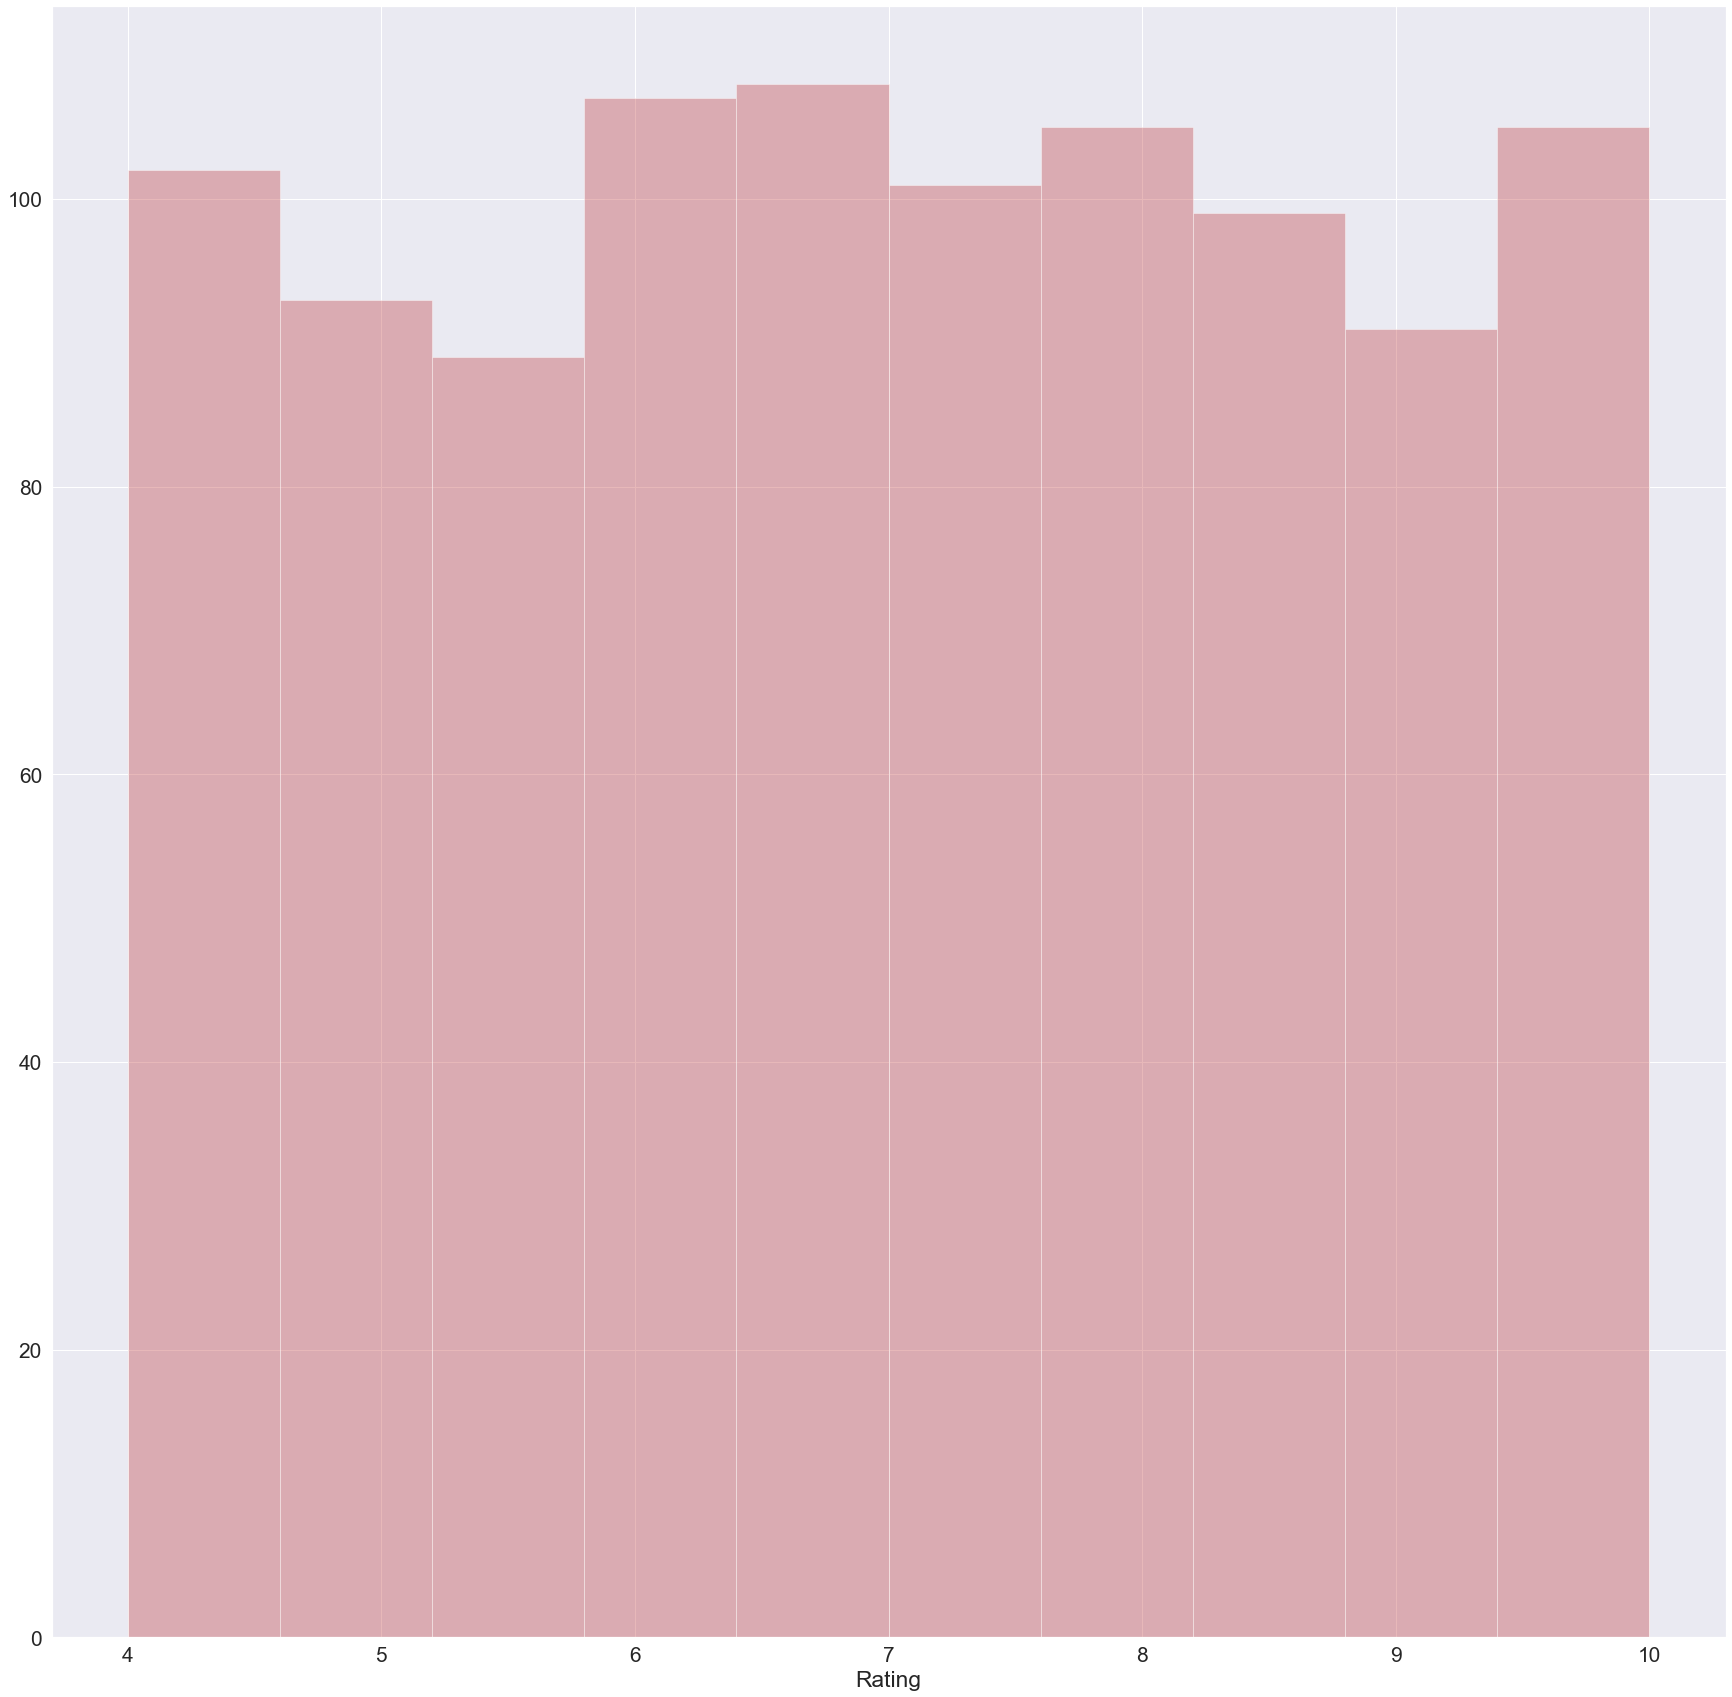

In [56]:
# identify The Rating distribution 
sns.distplot(df["Rating"] , kde=False , color="r")

<AxesSubplot:xlabel='Rating', ylabel='Density'>

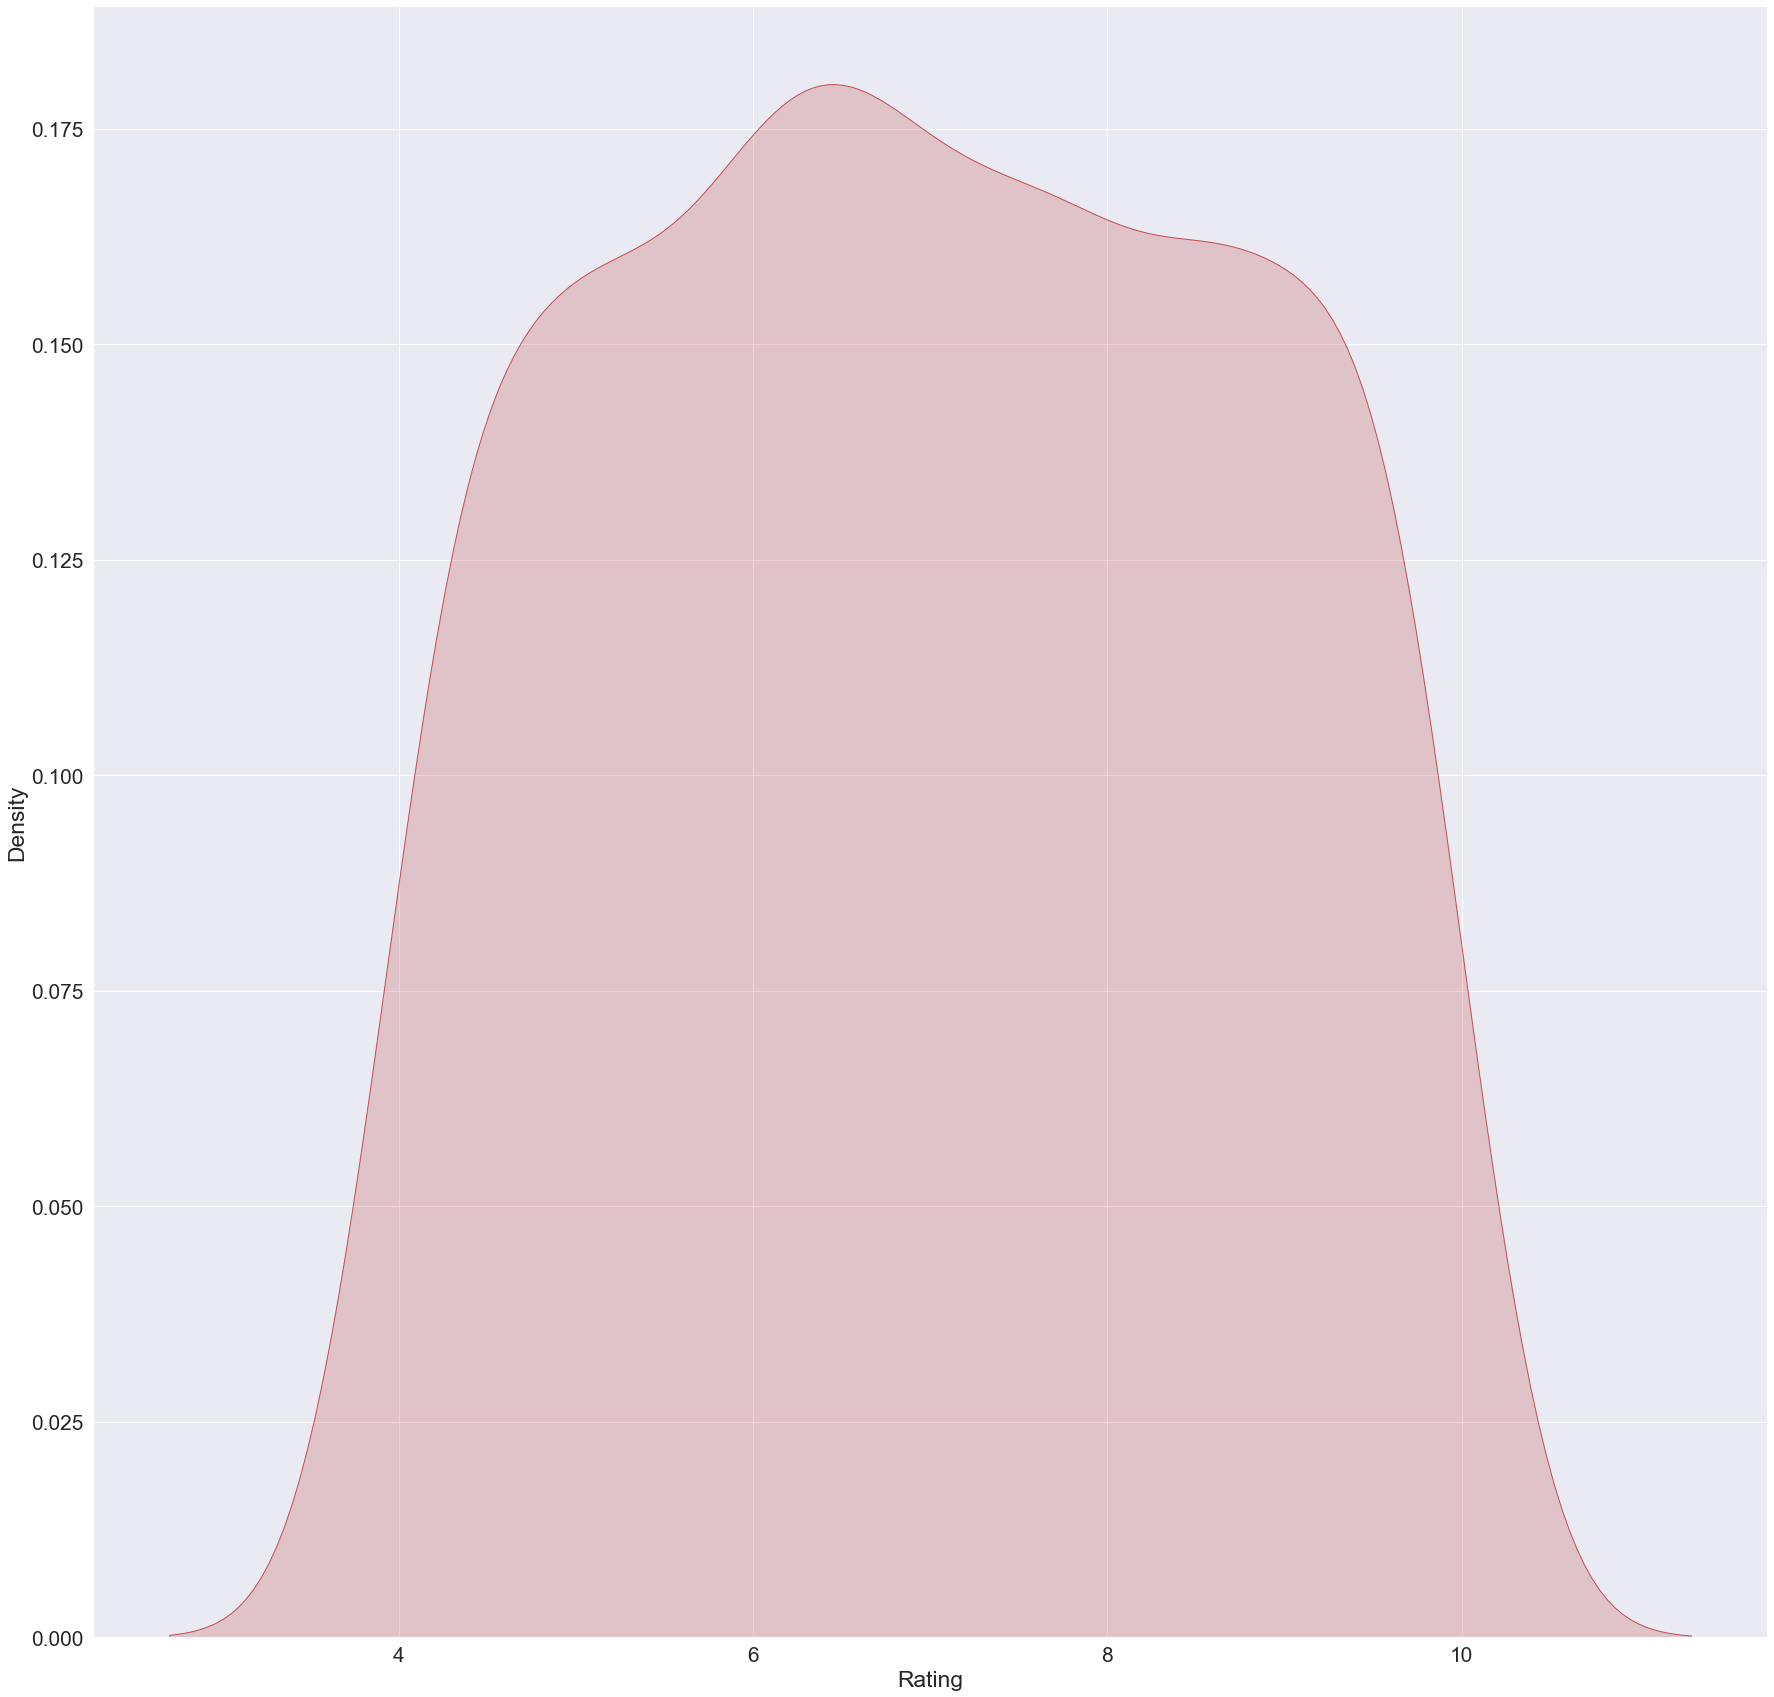

In [57]:
sns.kdeplot(df["Rating"] , shade=True , color="r")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

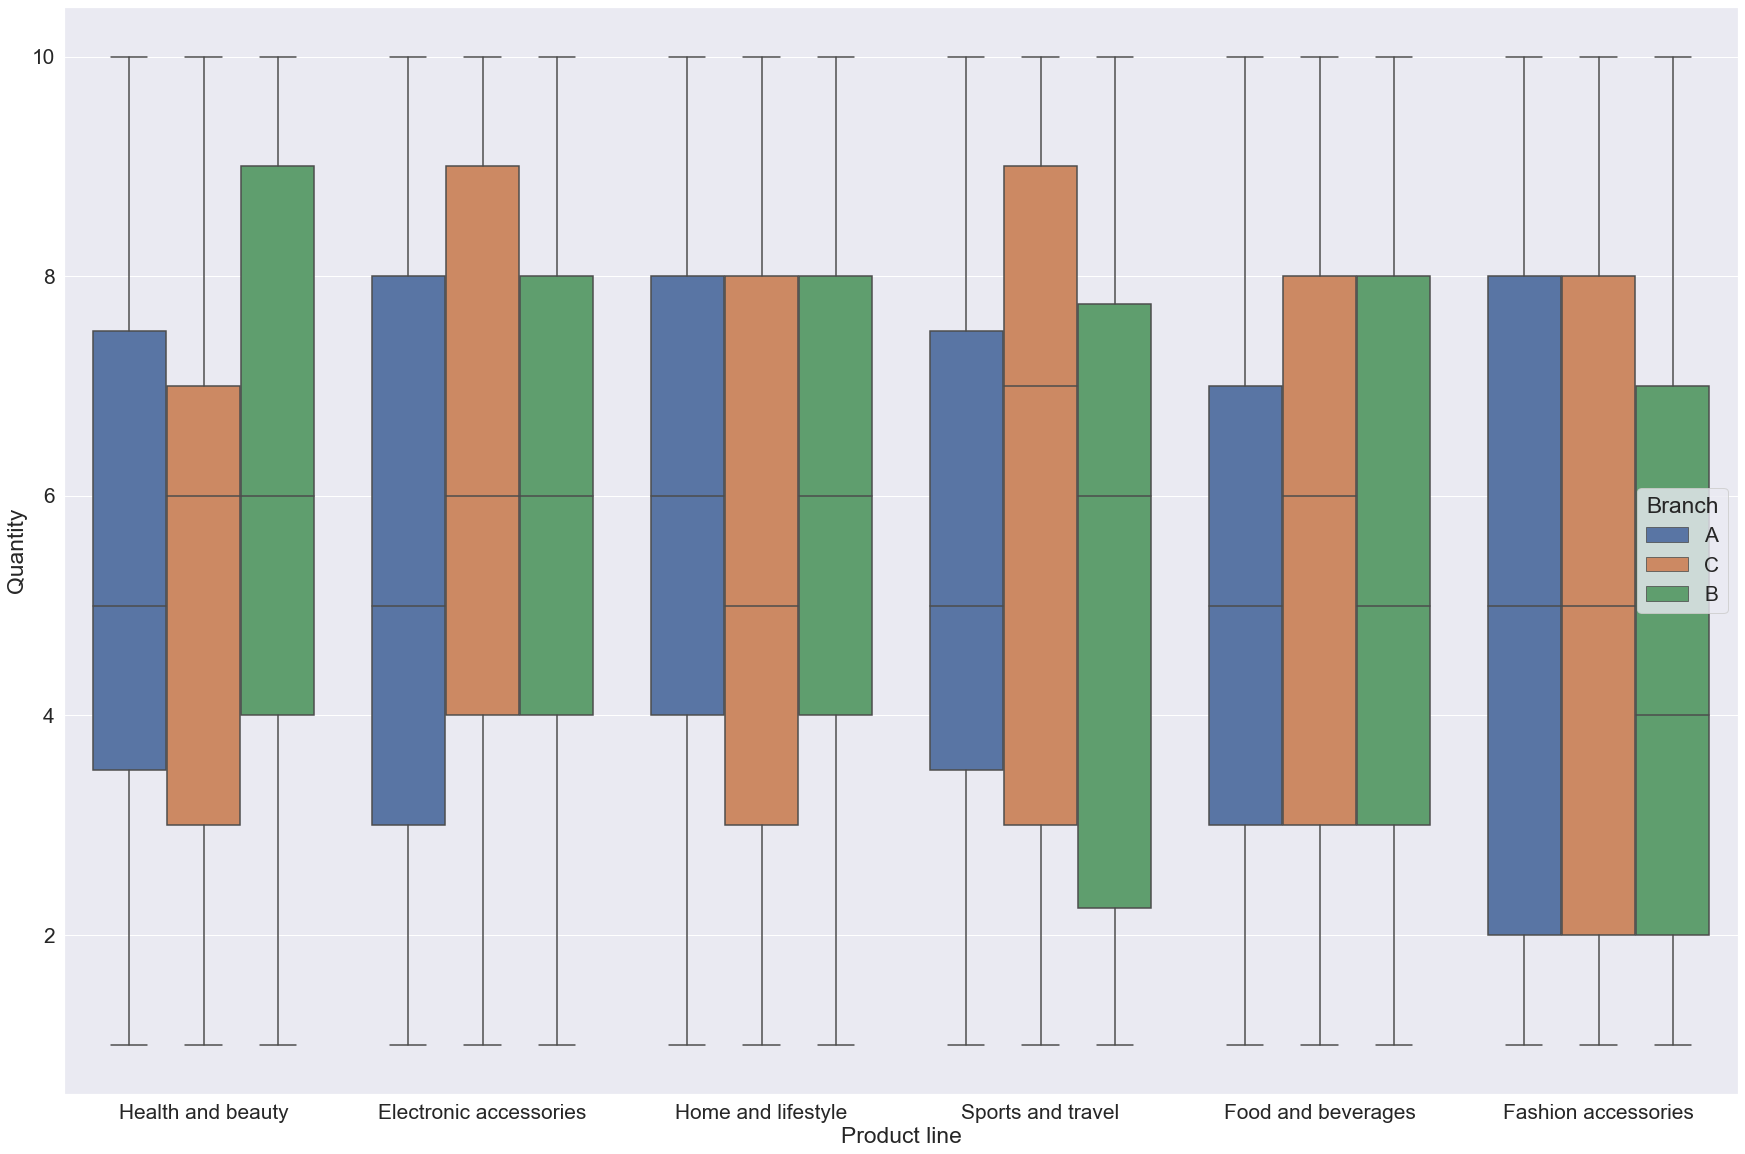

In [59]:
sns.set( rc = {"figure.figsize" : [30 , 20]} , font_scale=1.9)
sns.boxplot(y = "Quantity" , x = "Product line" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Customer type'>

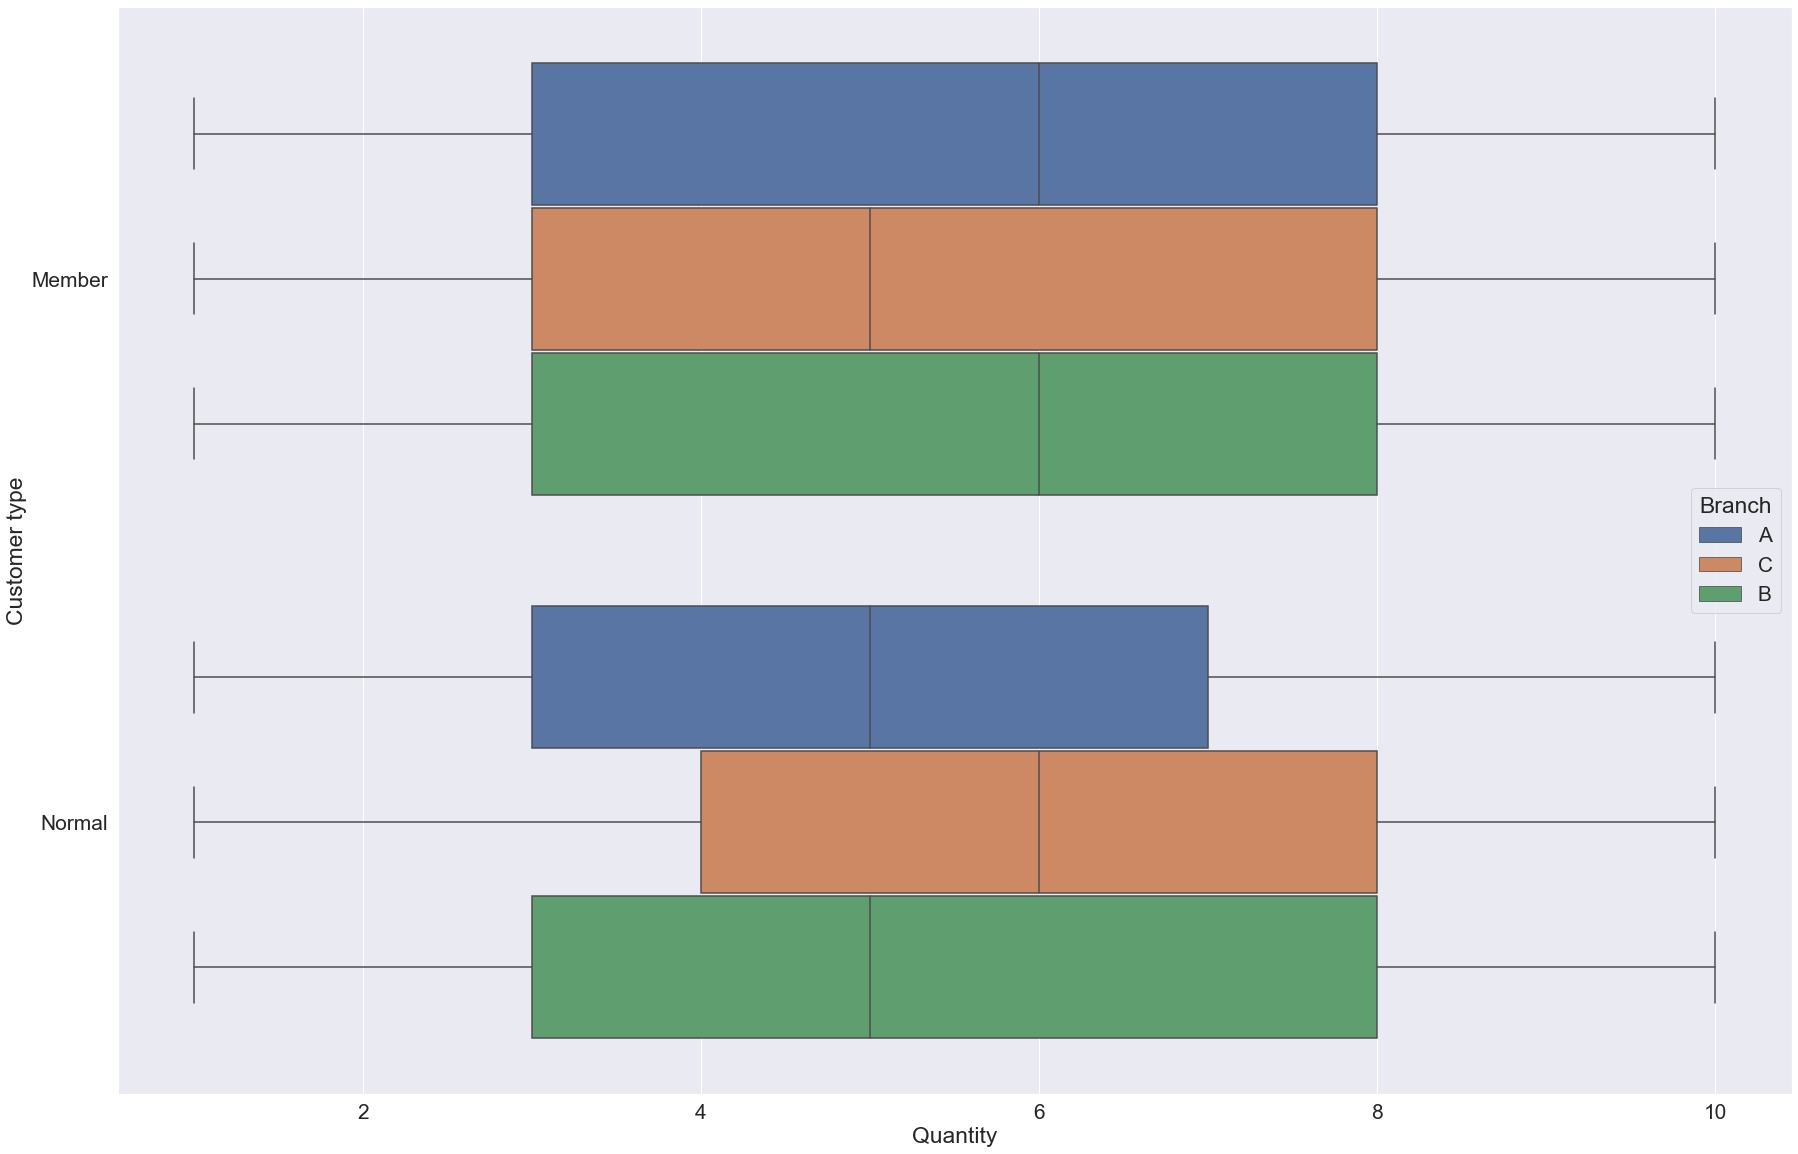

In [60]:
sns.boxplot(y = "Customer type" , x = "Quantity" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Gender'>

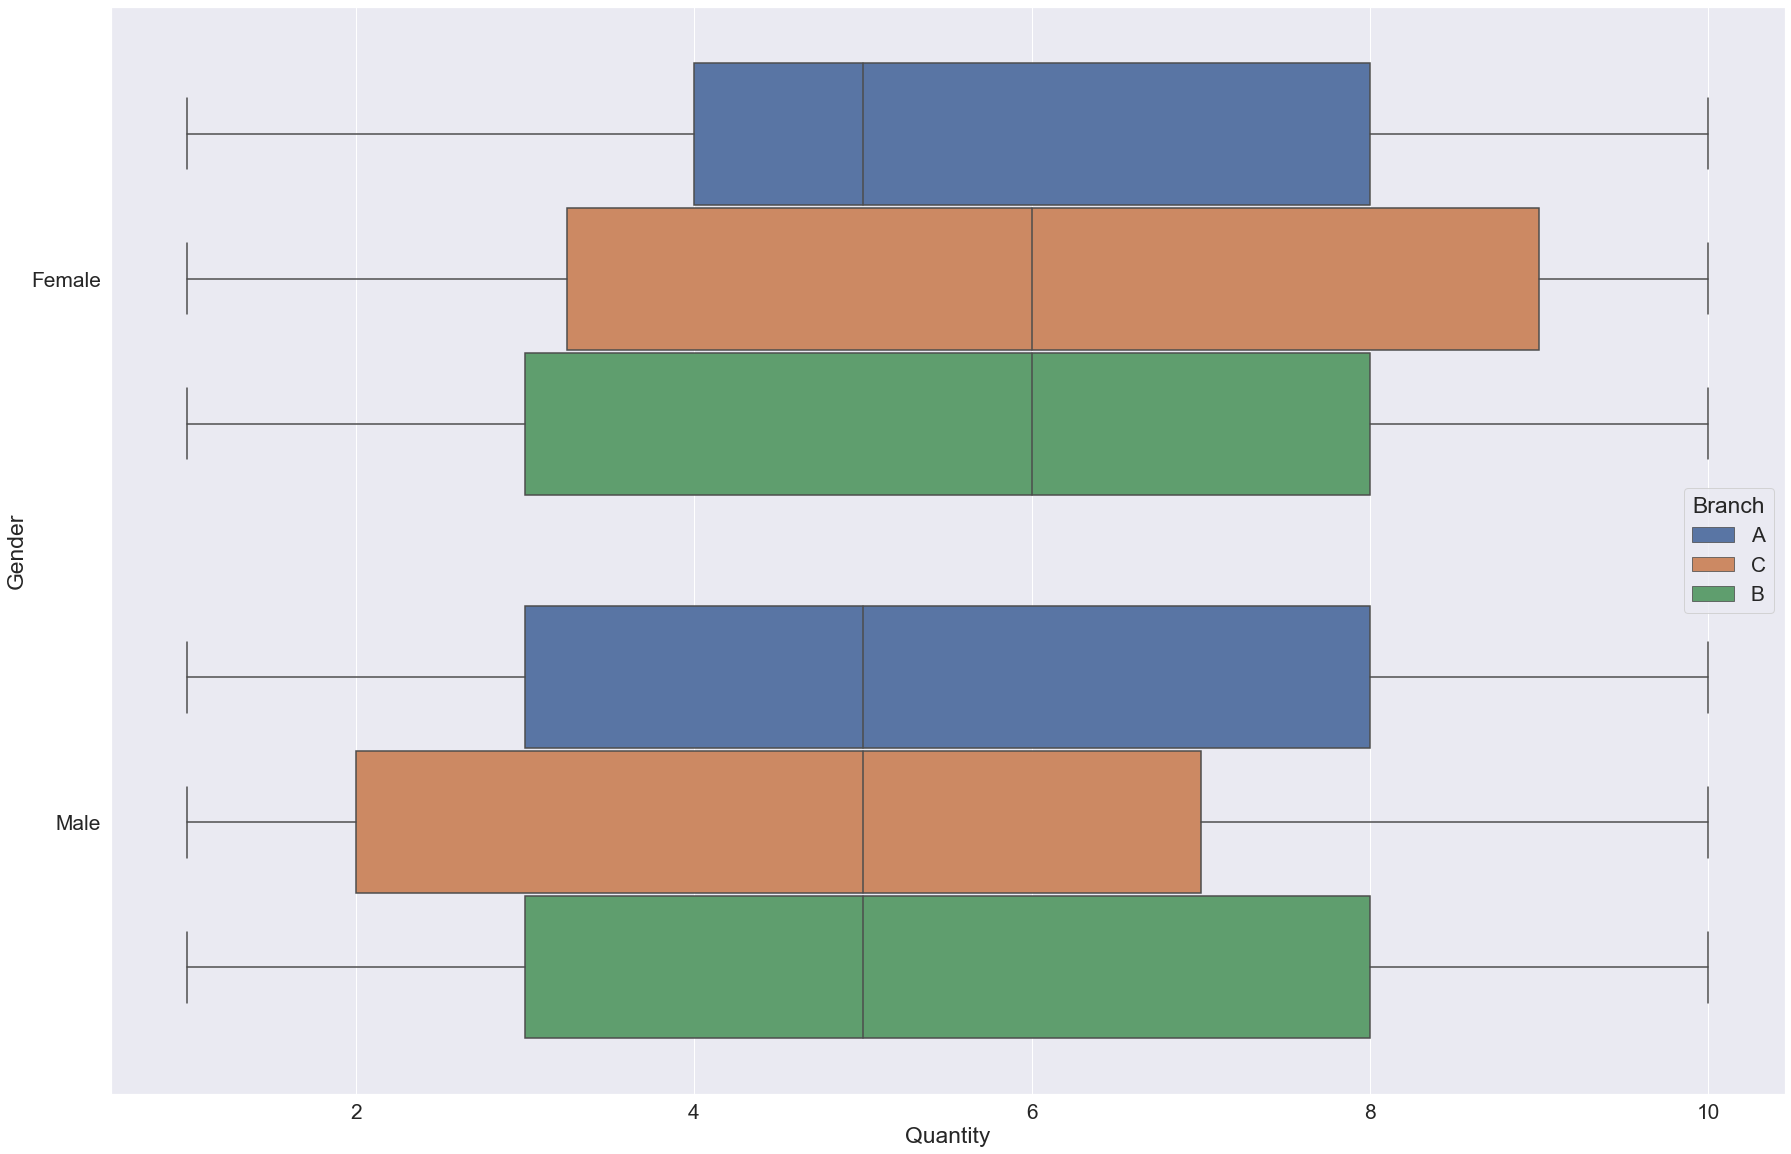

In [61]:
sns.boxplot(y = "Gender" , x = "Quantity" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Payment'>

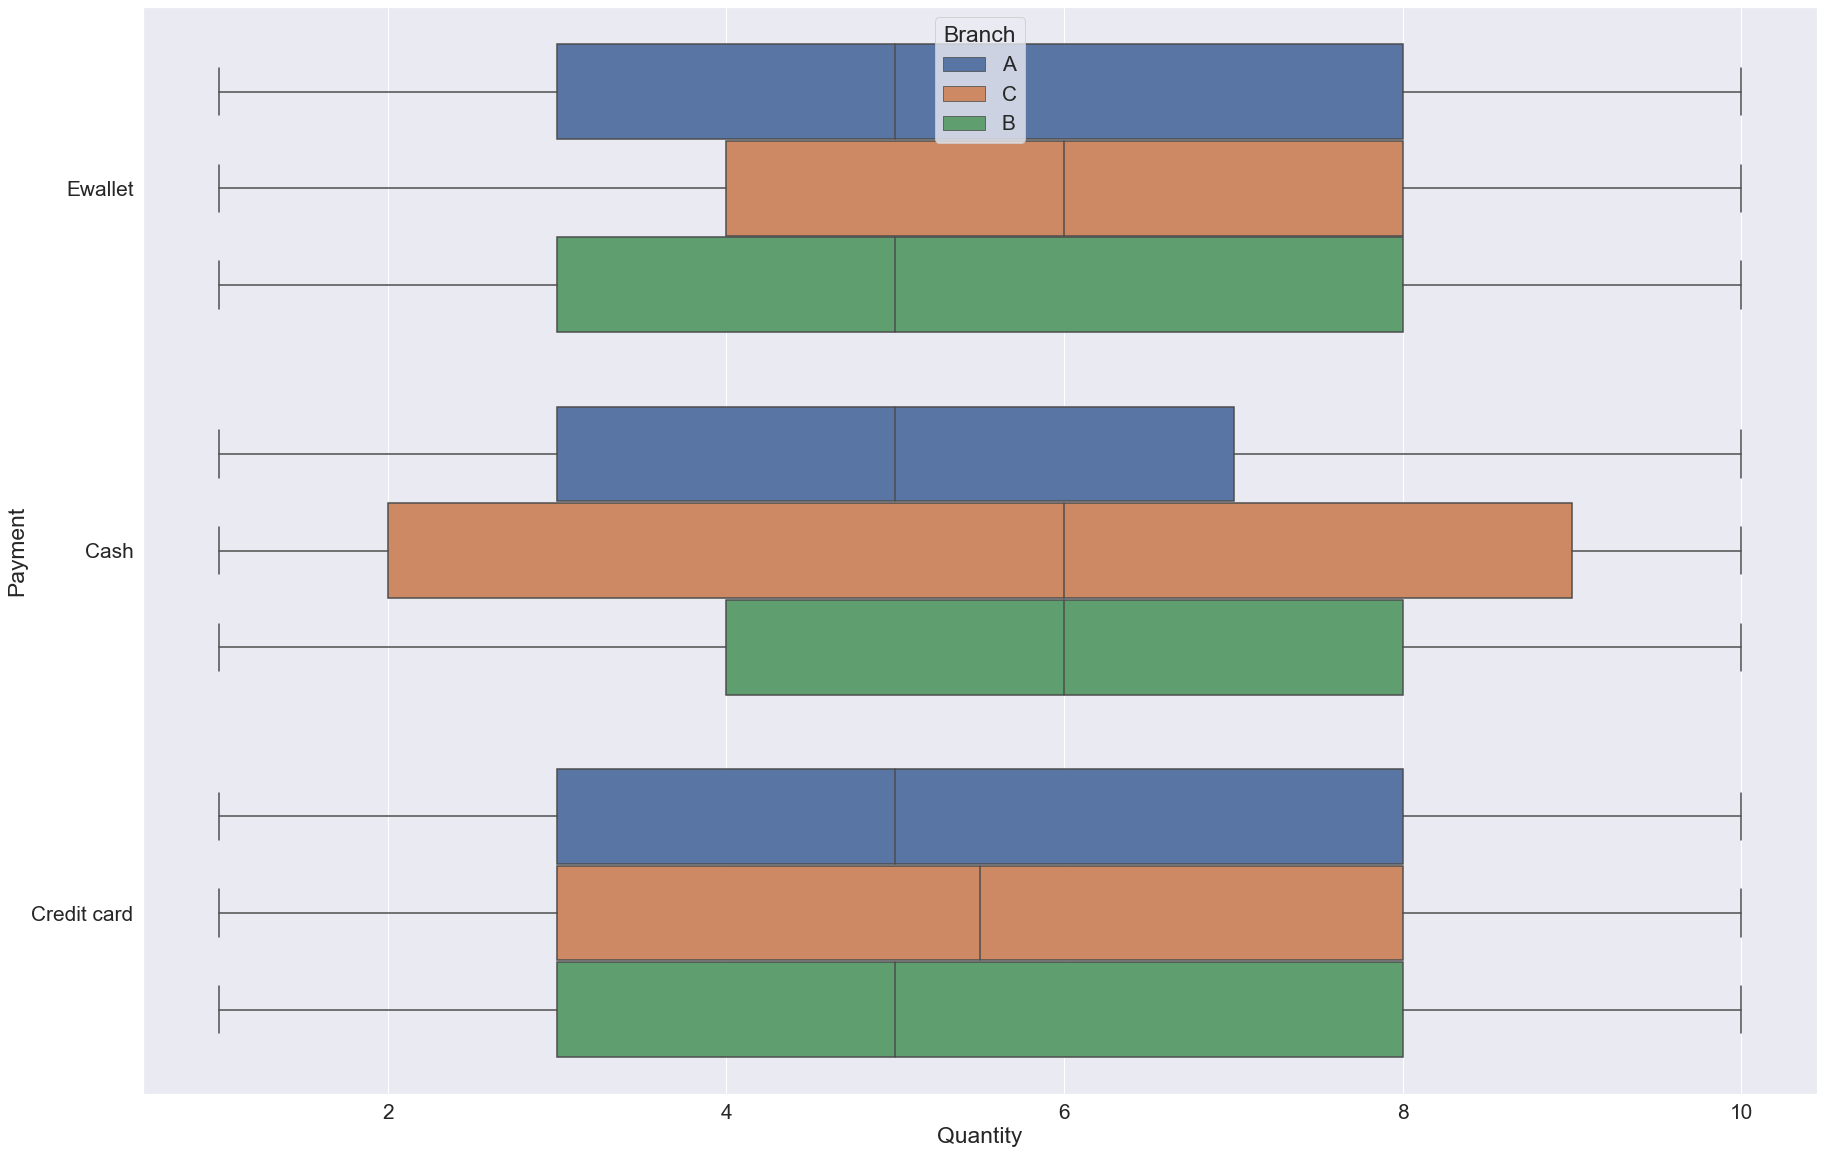

In [62]:
sns.boxplot(y = "Payment" , x = "Quantity" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Years'>

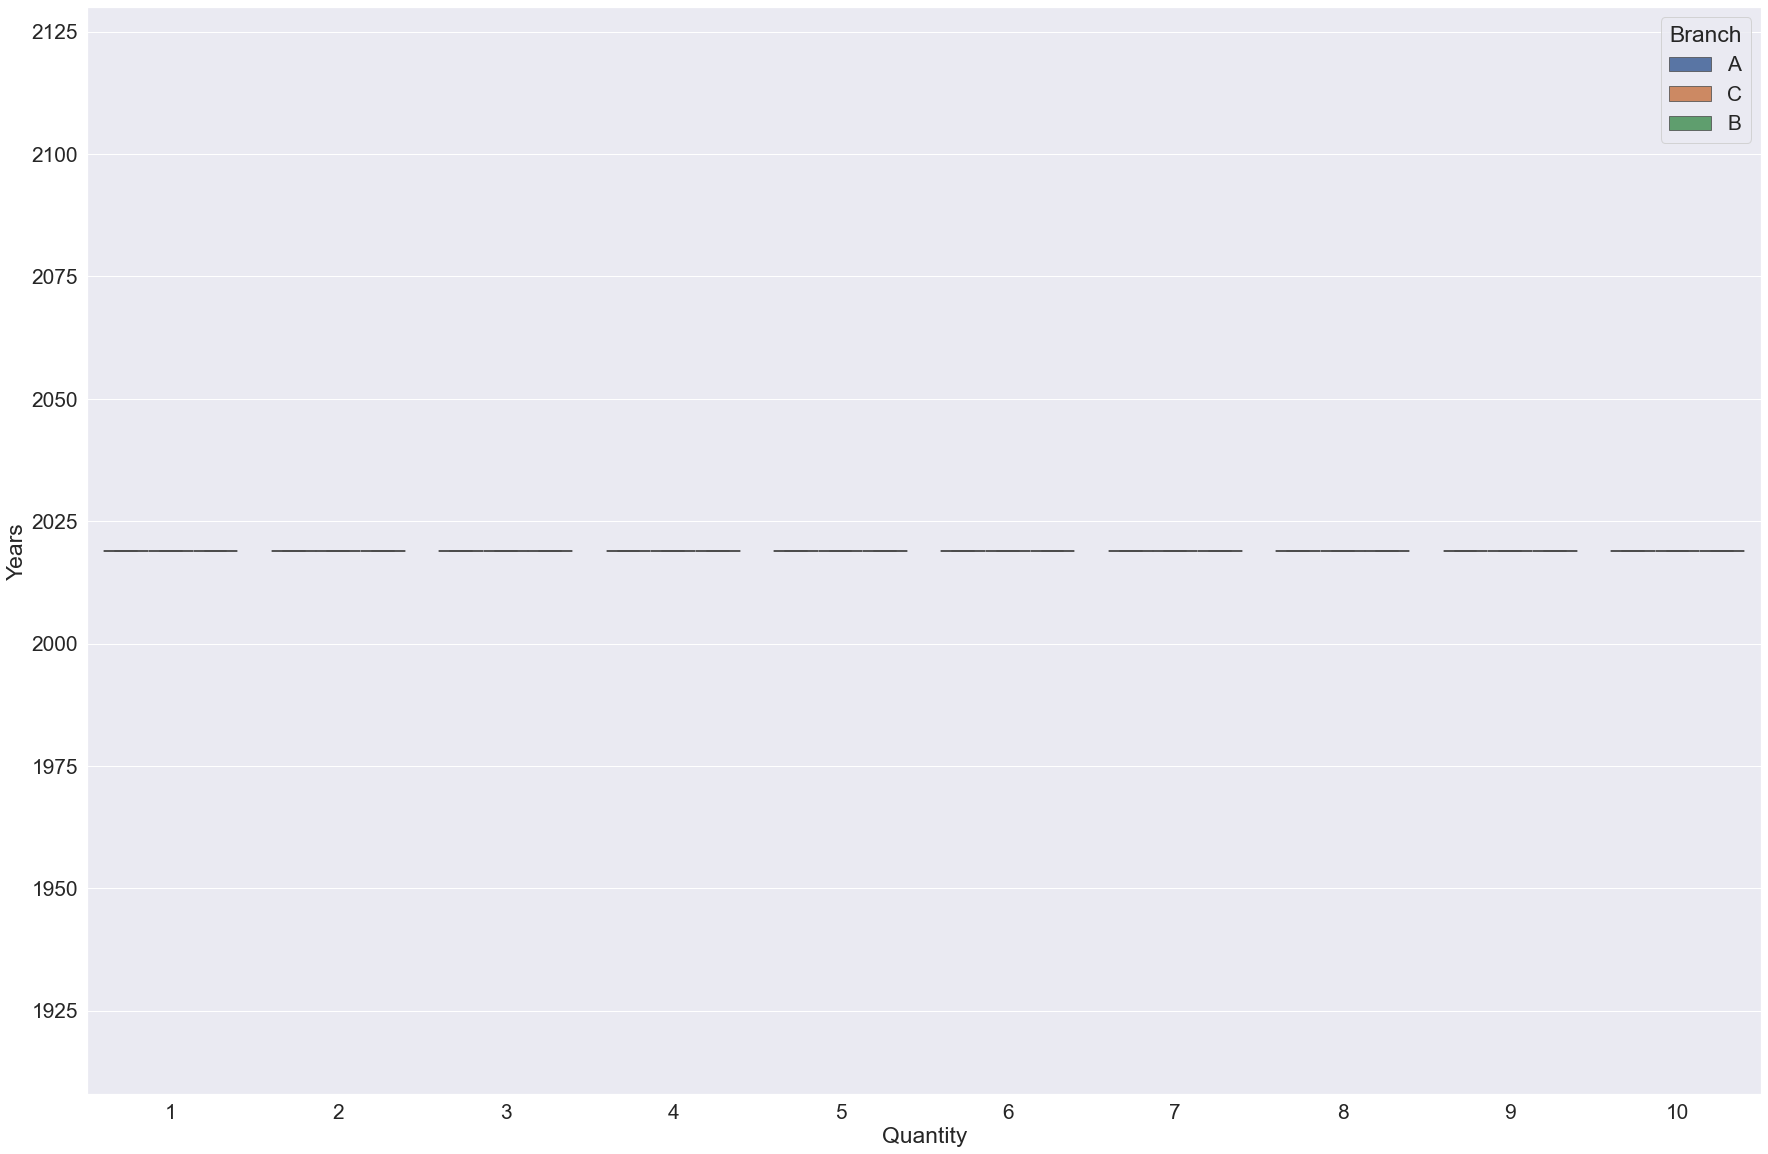

In [63]:
sns.boxplot(y = "Years" , x = "Quantity" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Month'>

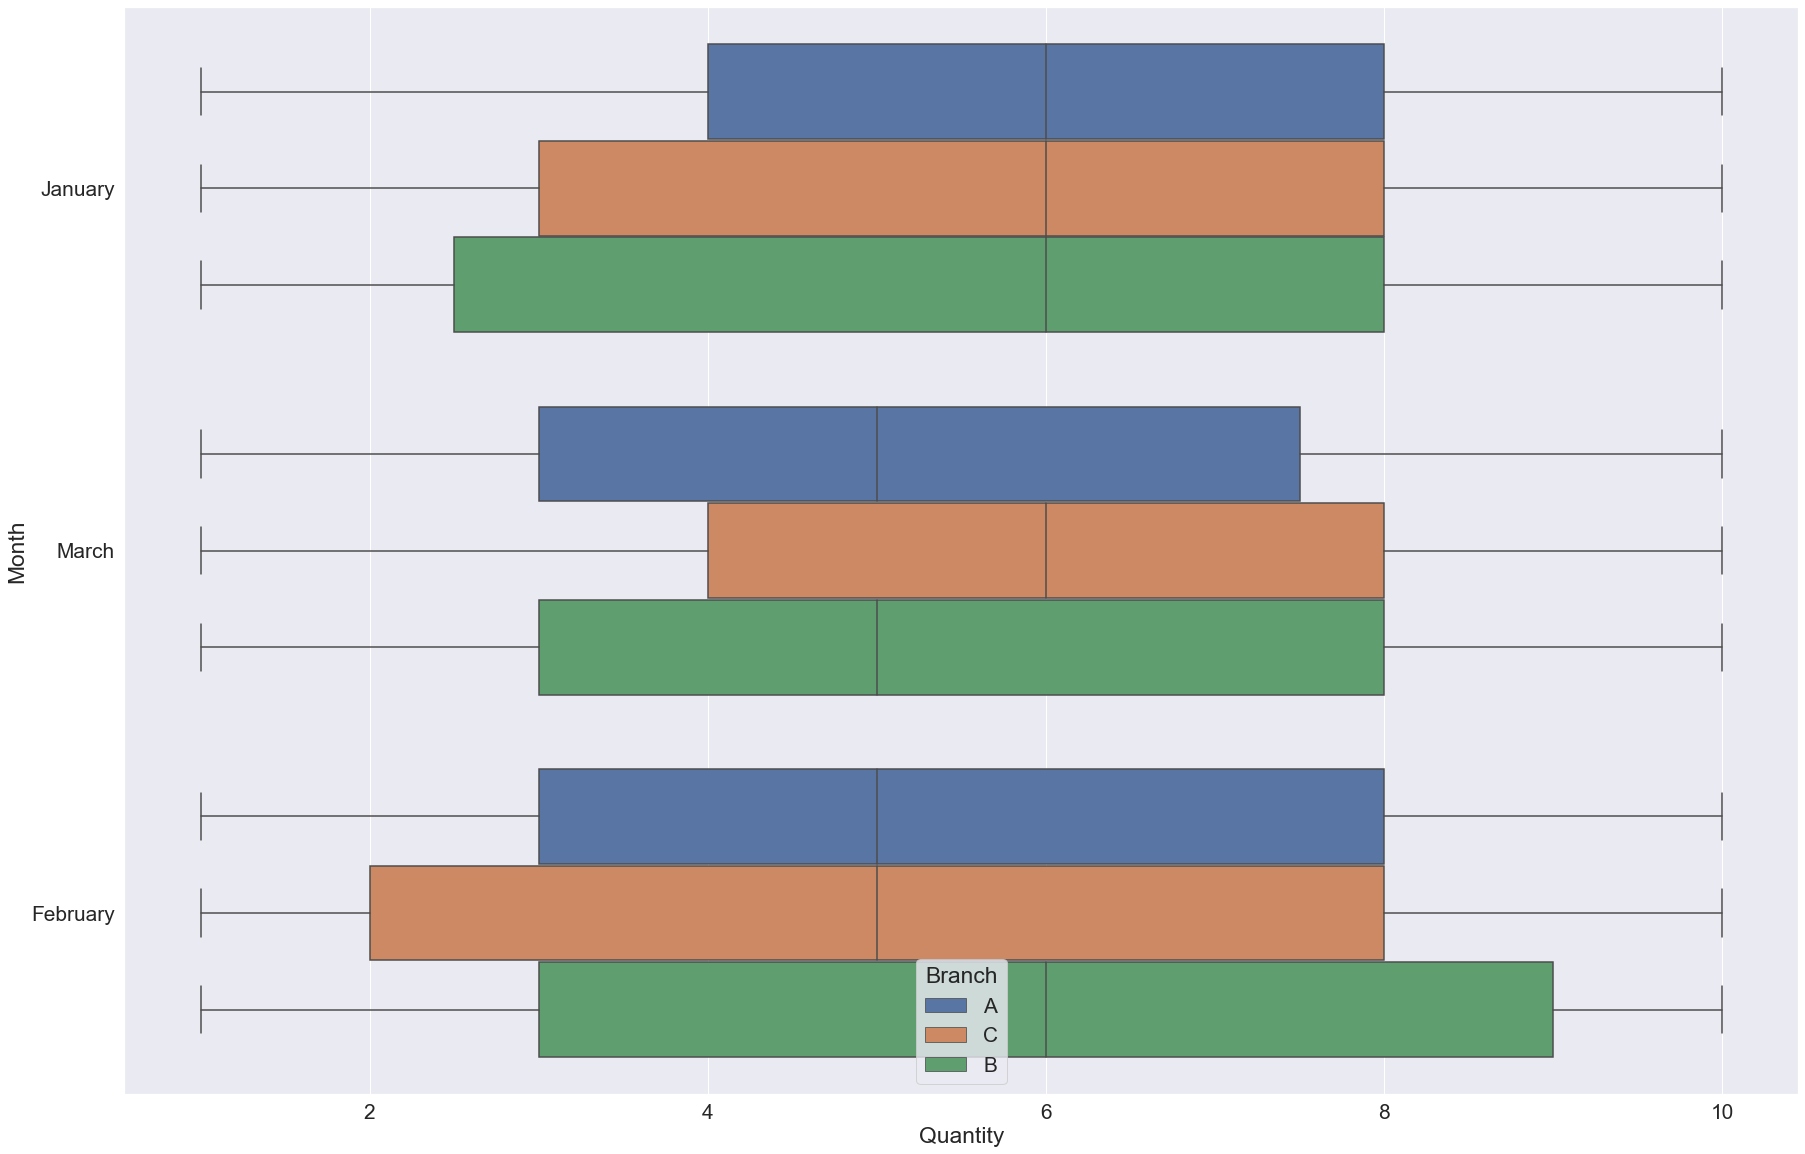

In [64]:
sns.boxplot(y = "Month" , x = "Quantity" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Day'>

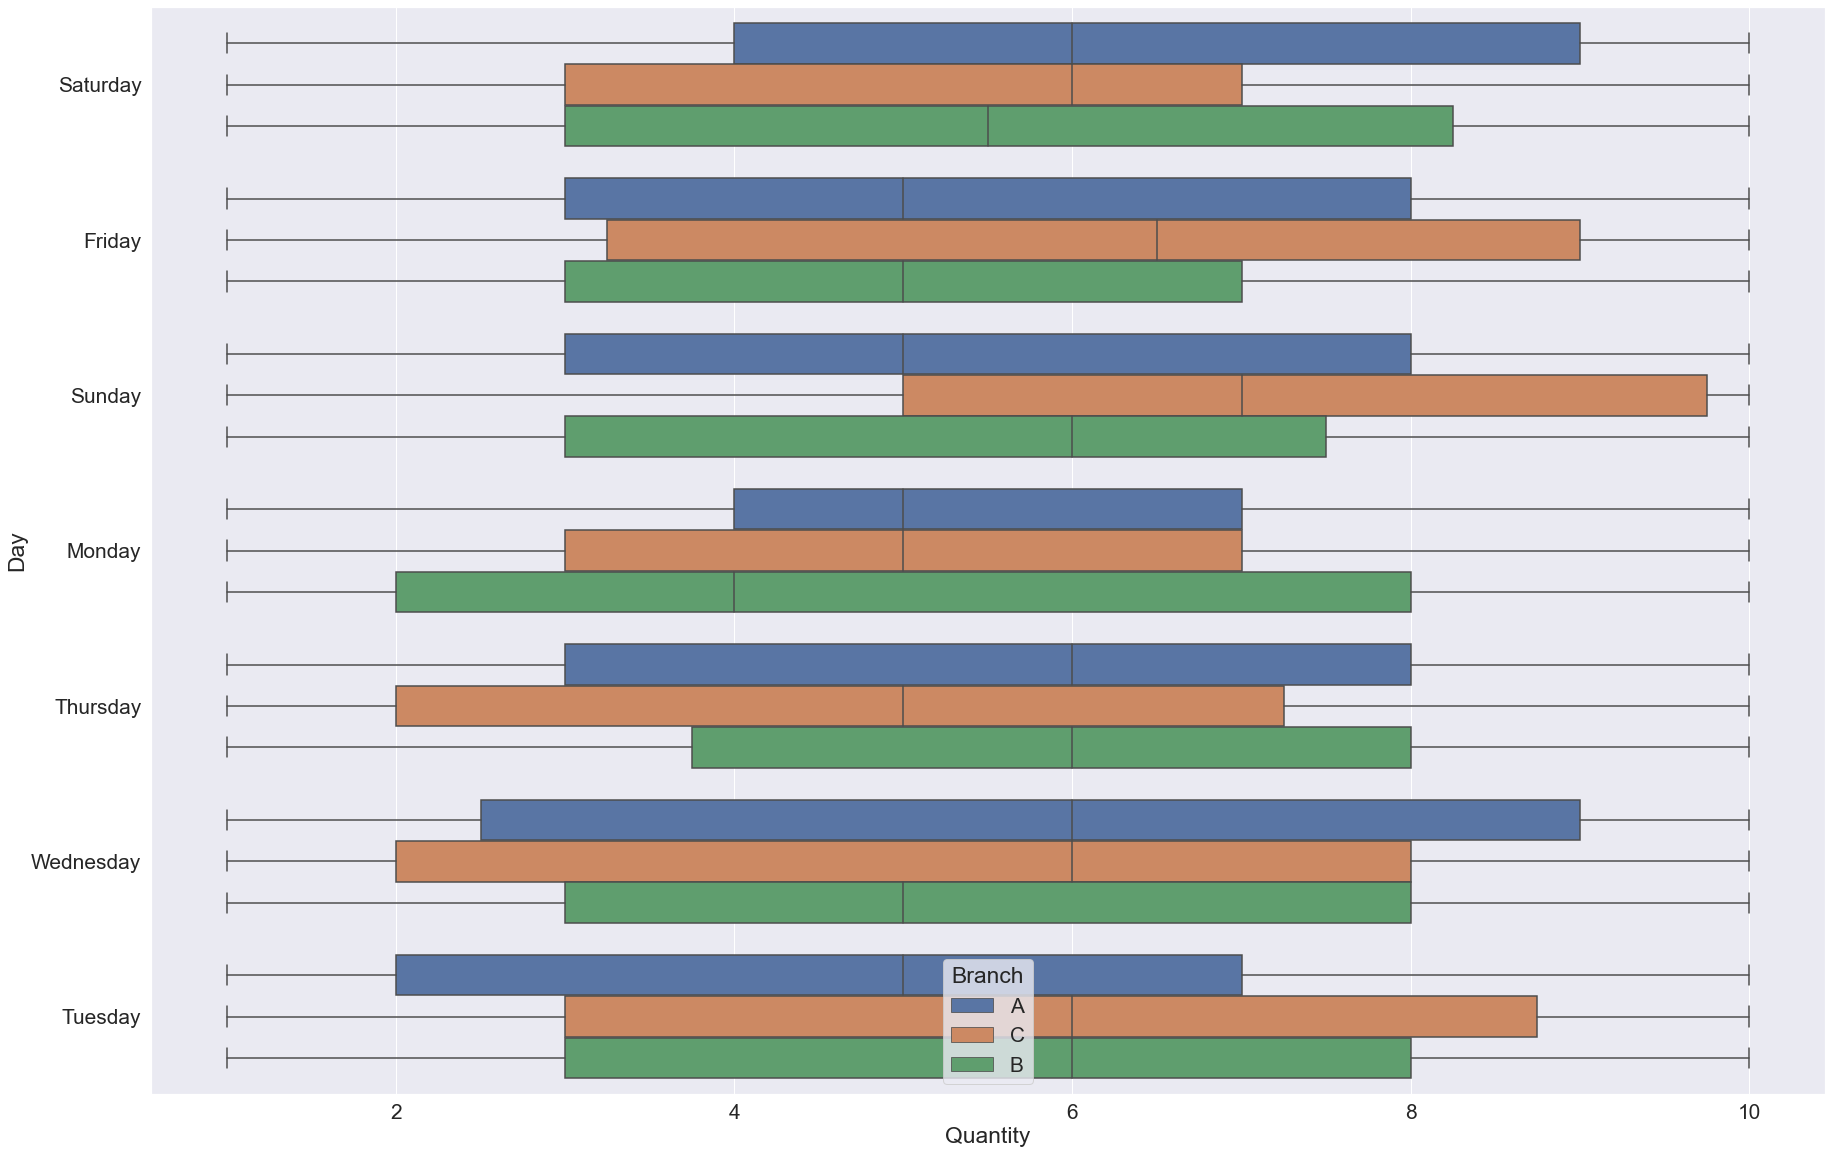

In [65]:
sns.boxplot(y = "Day" , x = "Quantity" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Product line', ylabel='Weeday'>

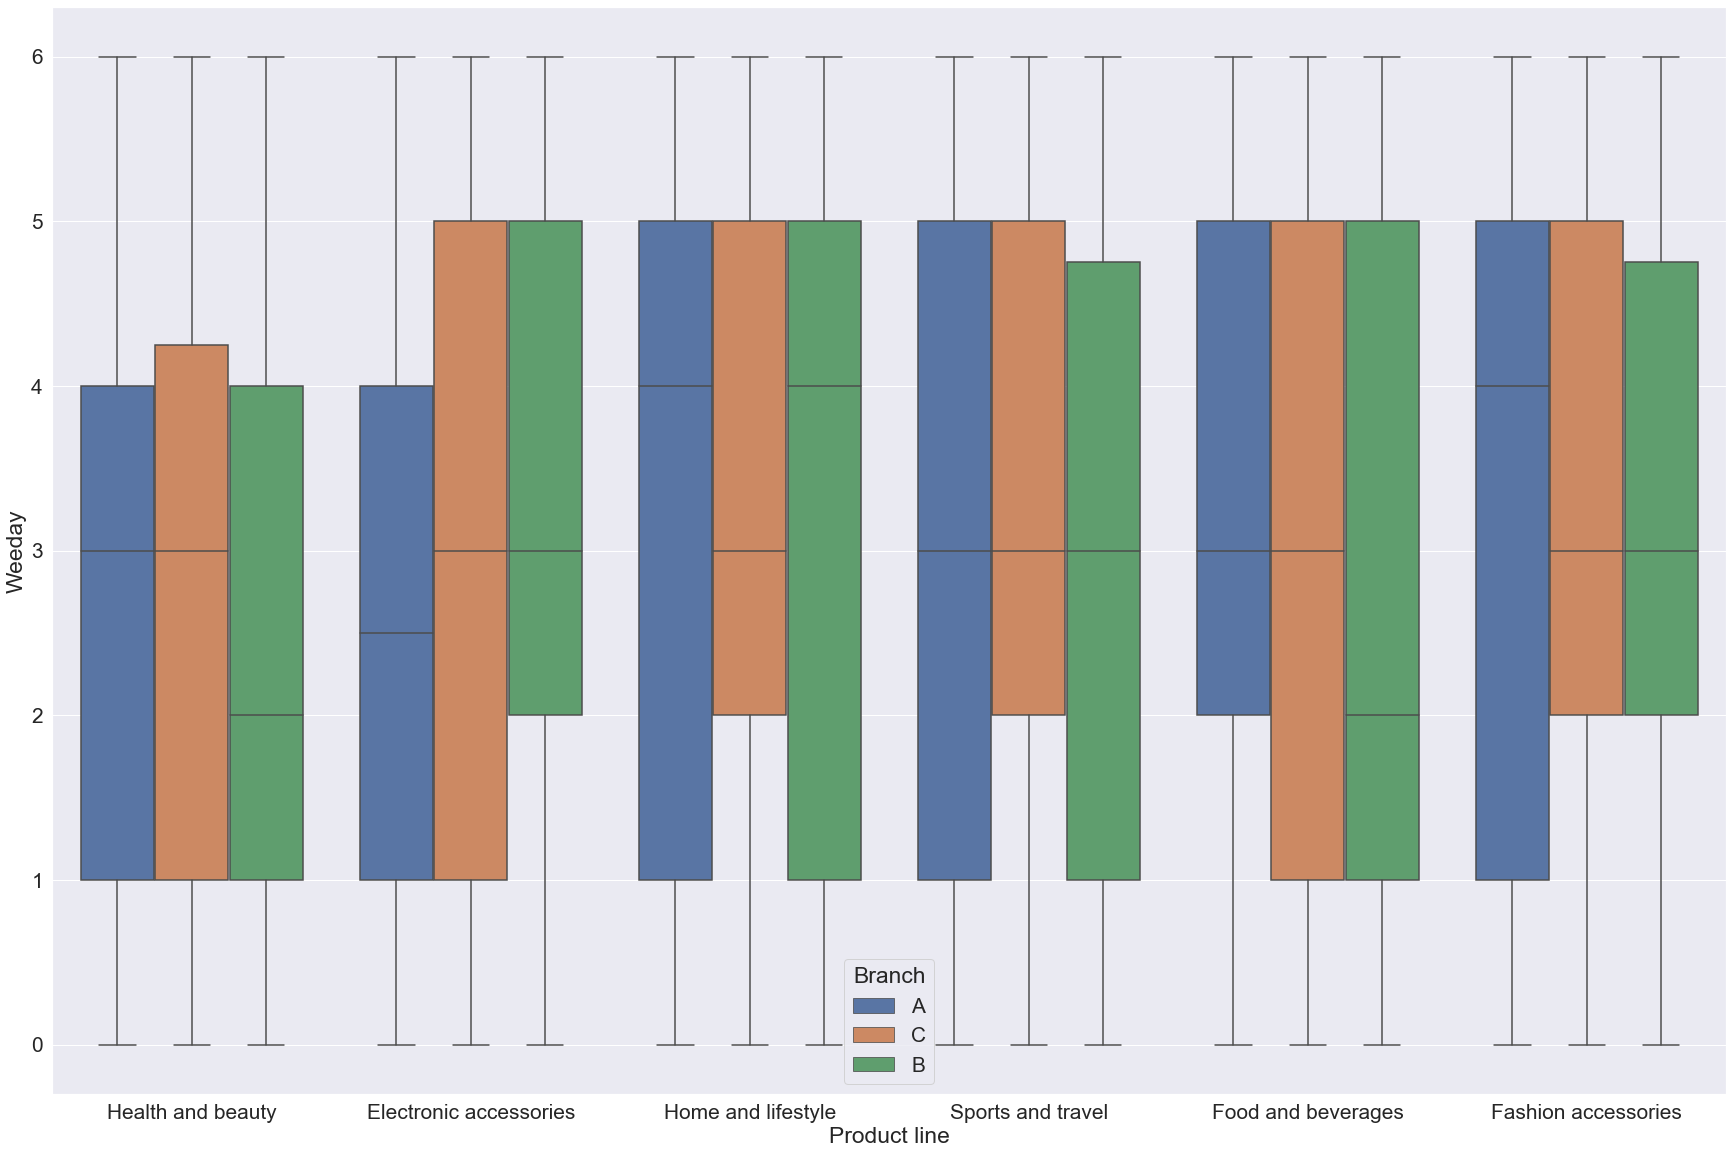

In [66]:
sns.boxplot(y = "Weeday" , x = "Product line" ,  hue = "Branch" , data = df)

<AxesSubplot:xlabel='Quantity', ylabel='Weeday'>

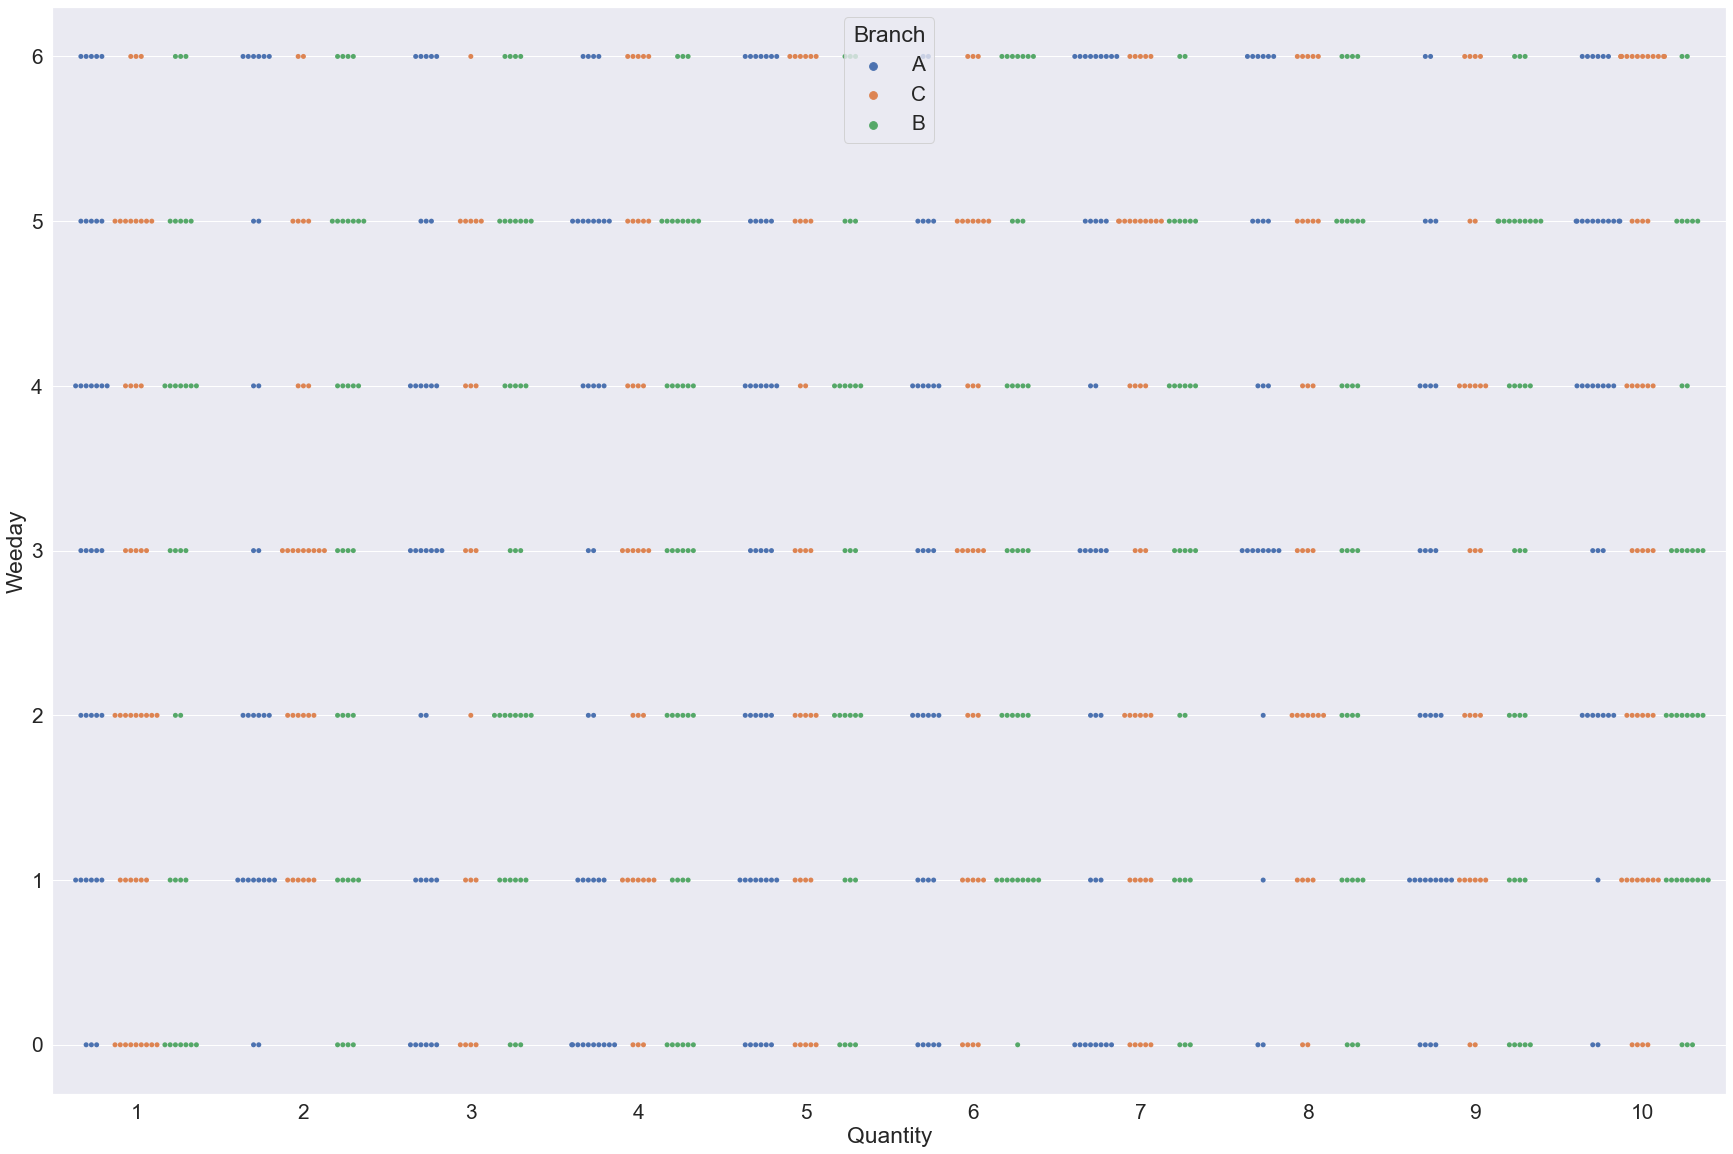

In [67]:
sns.swarmplot(y = "Weeday" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='Day'>

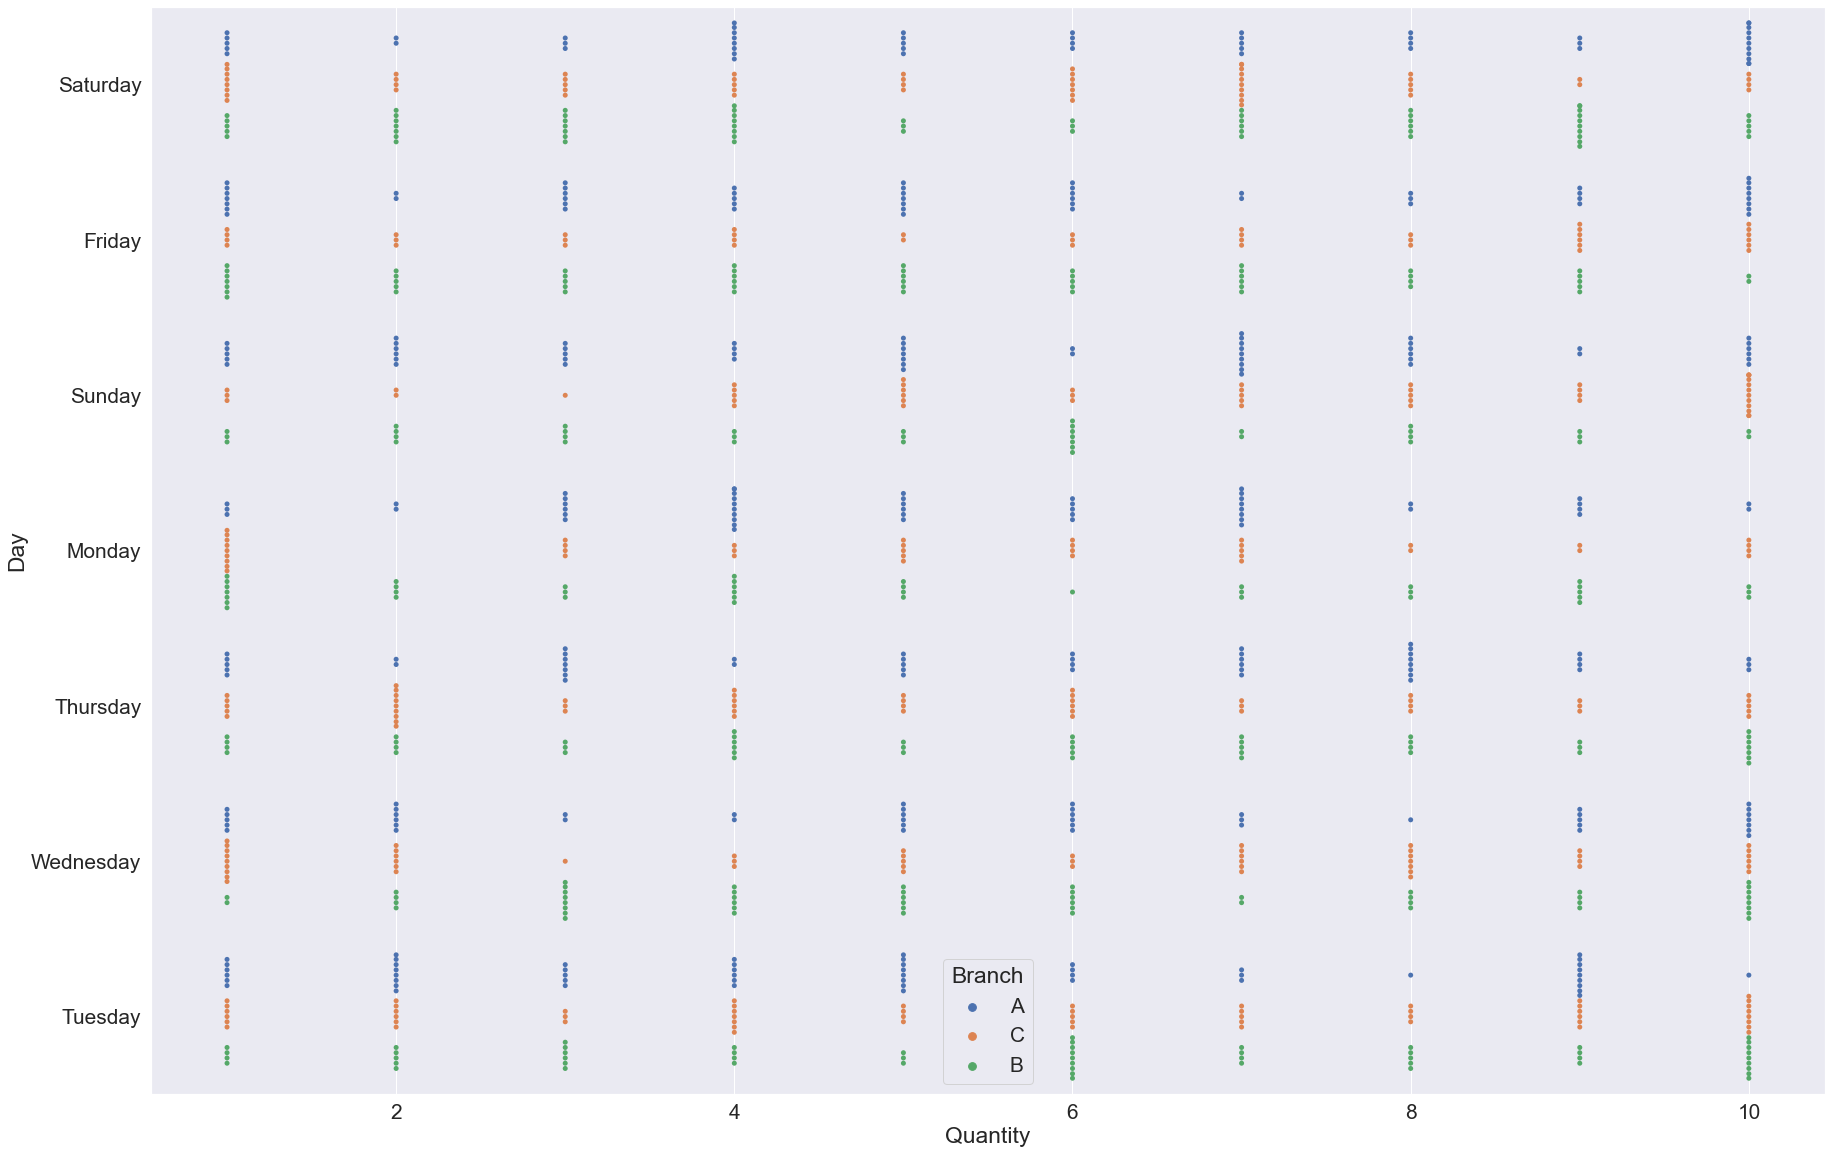

In [68]:
sns.swarmplot(y = "Day" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='Month'>

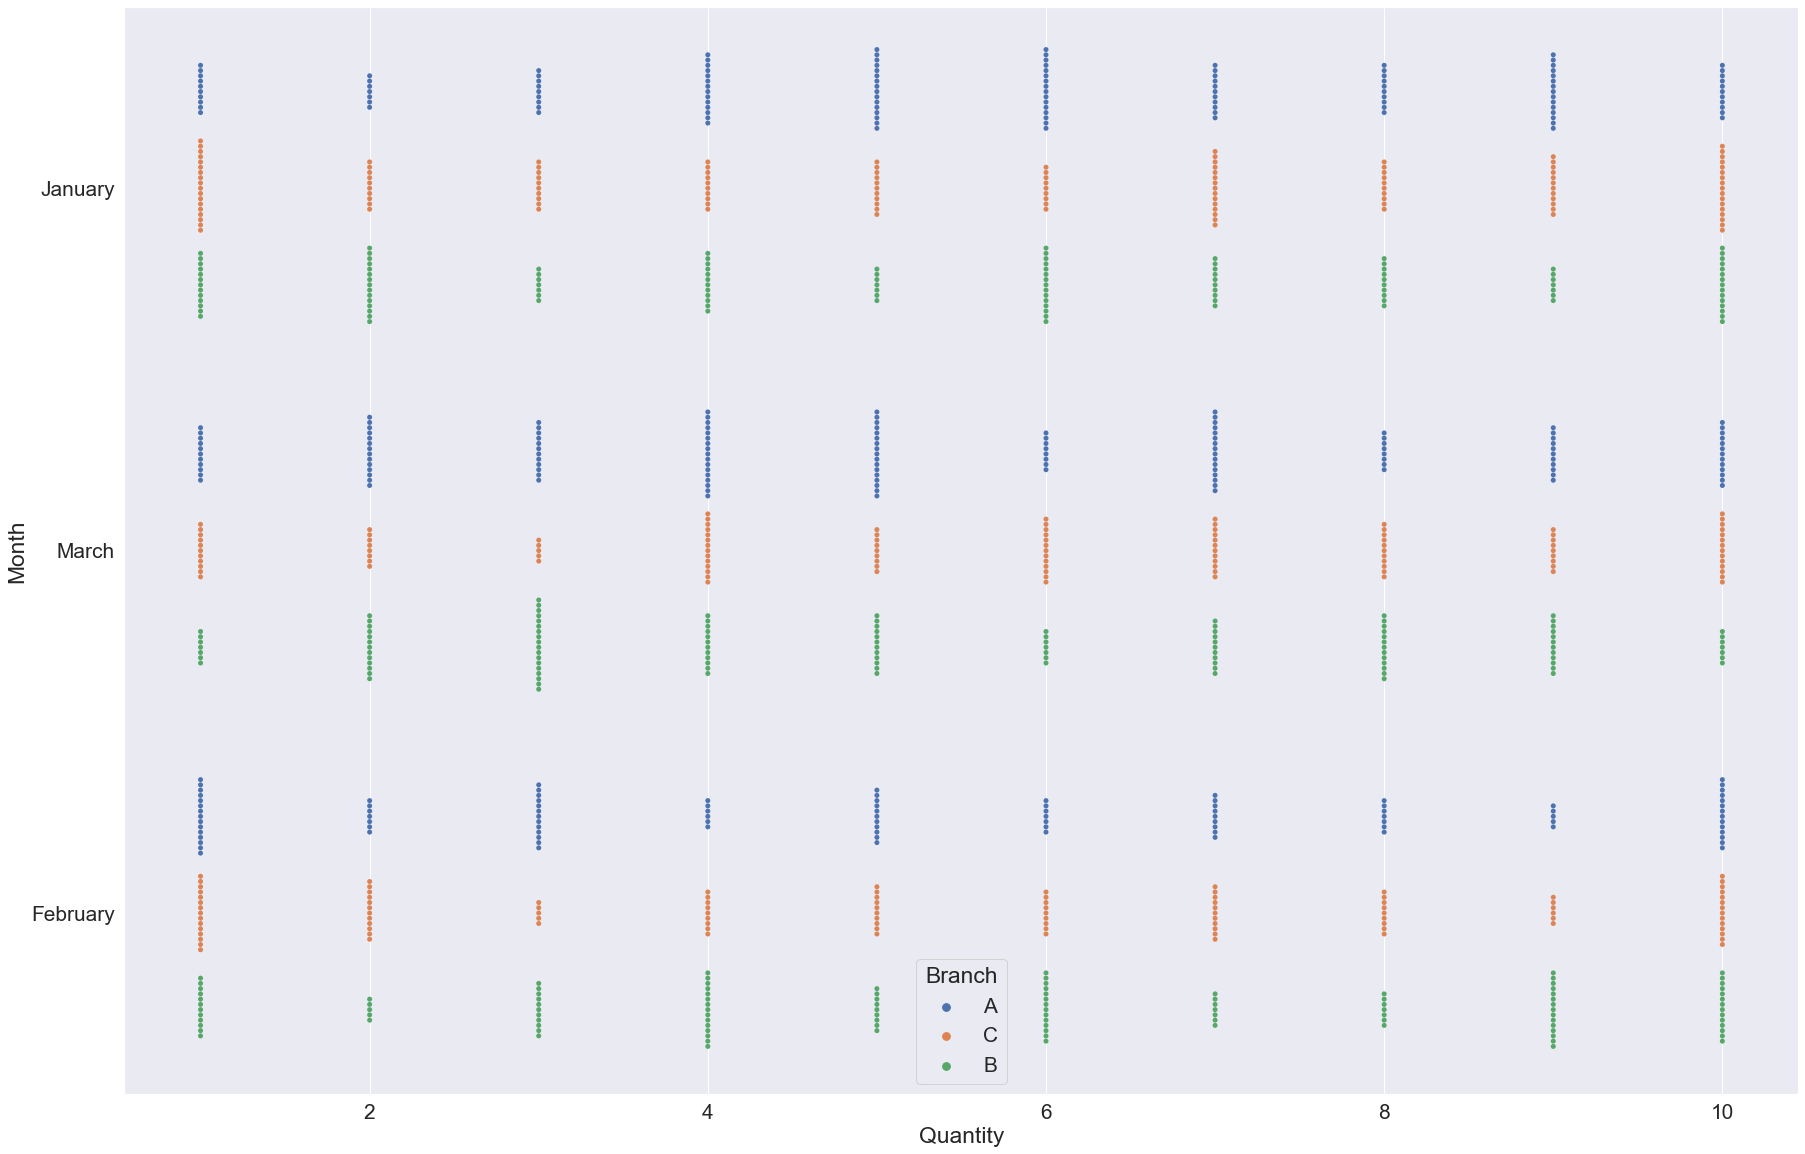

In [69]:
sns.swarmplot(y = "Month" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='Years'>

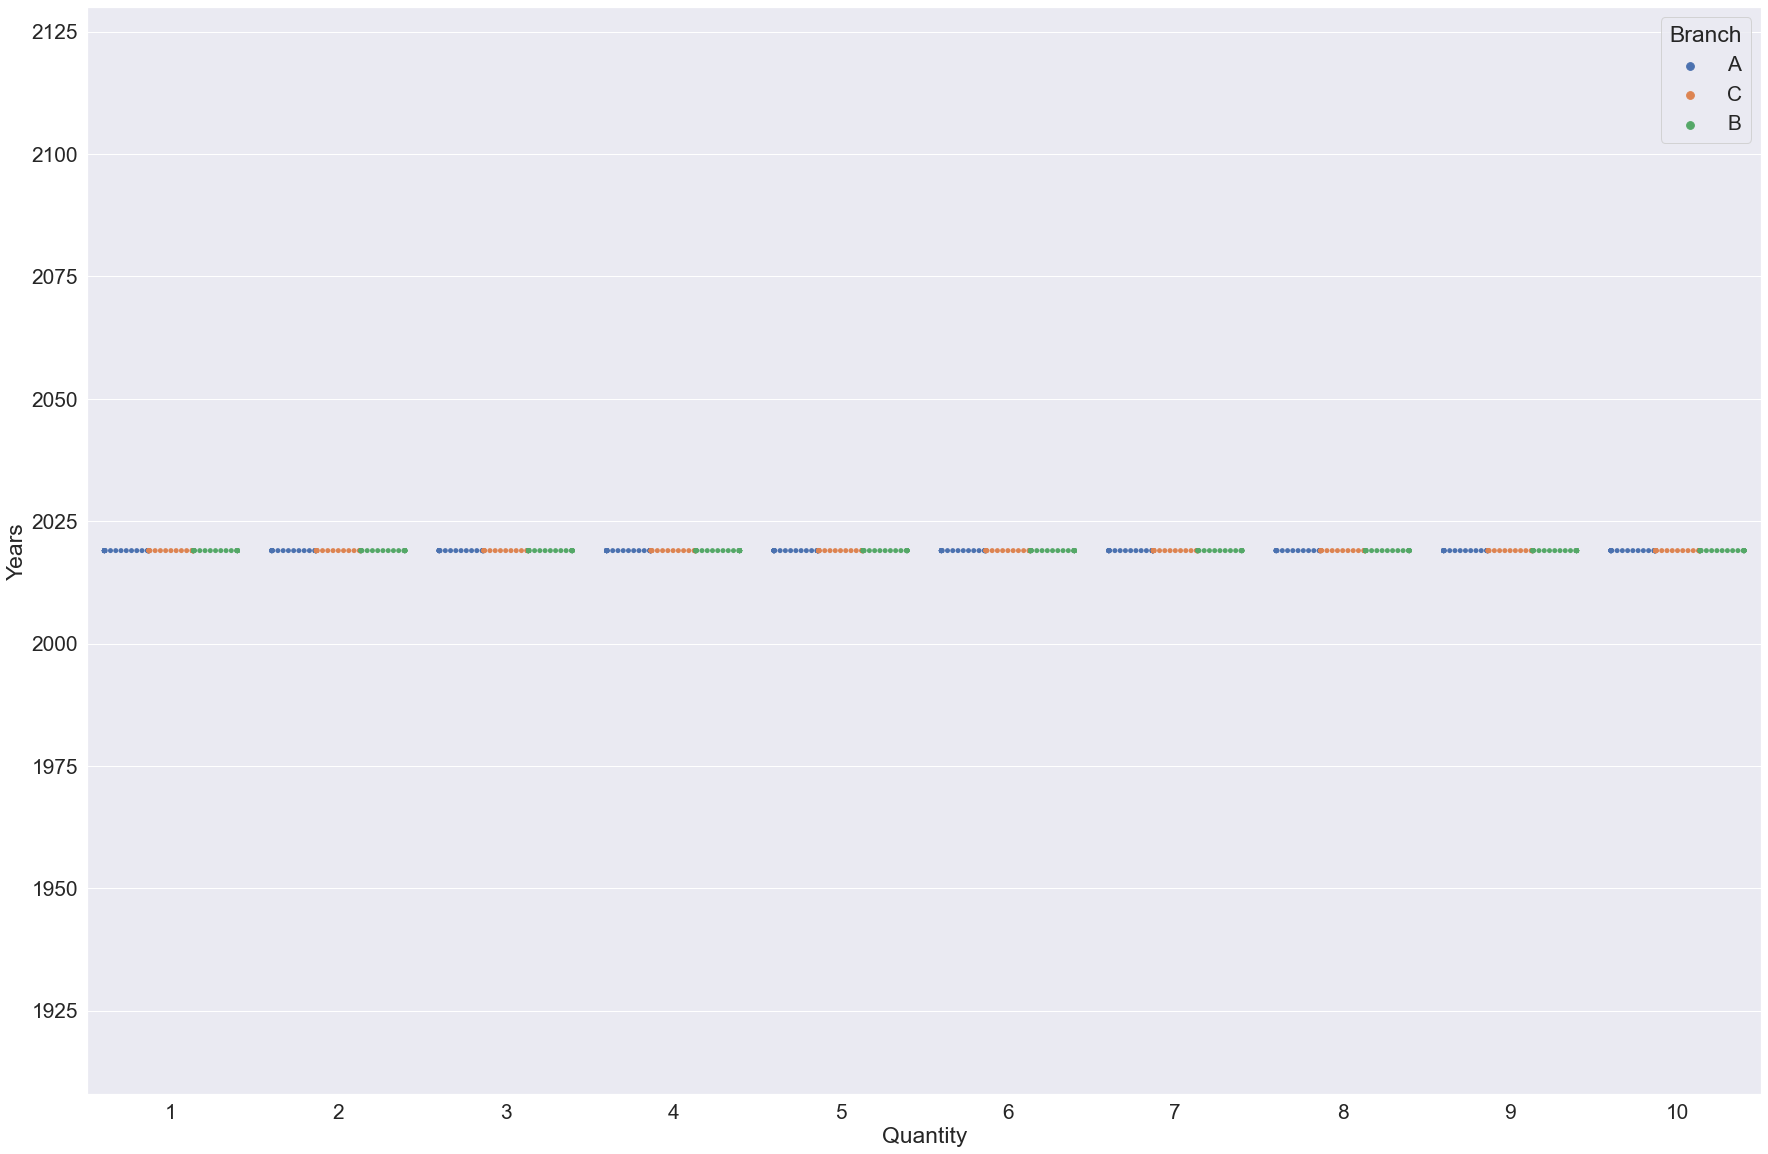

In [70]:
sns.swarmplot(y = "Years" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='Payment'>

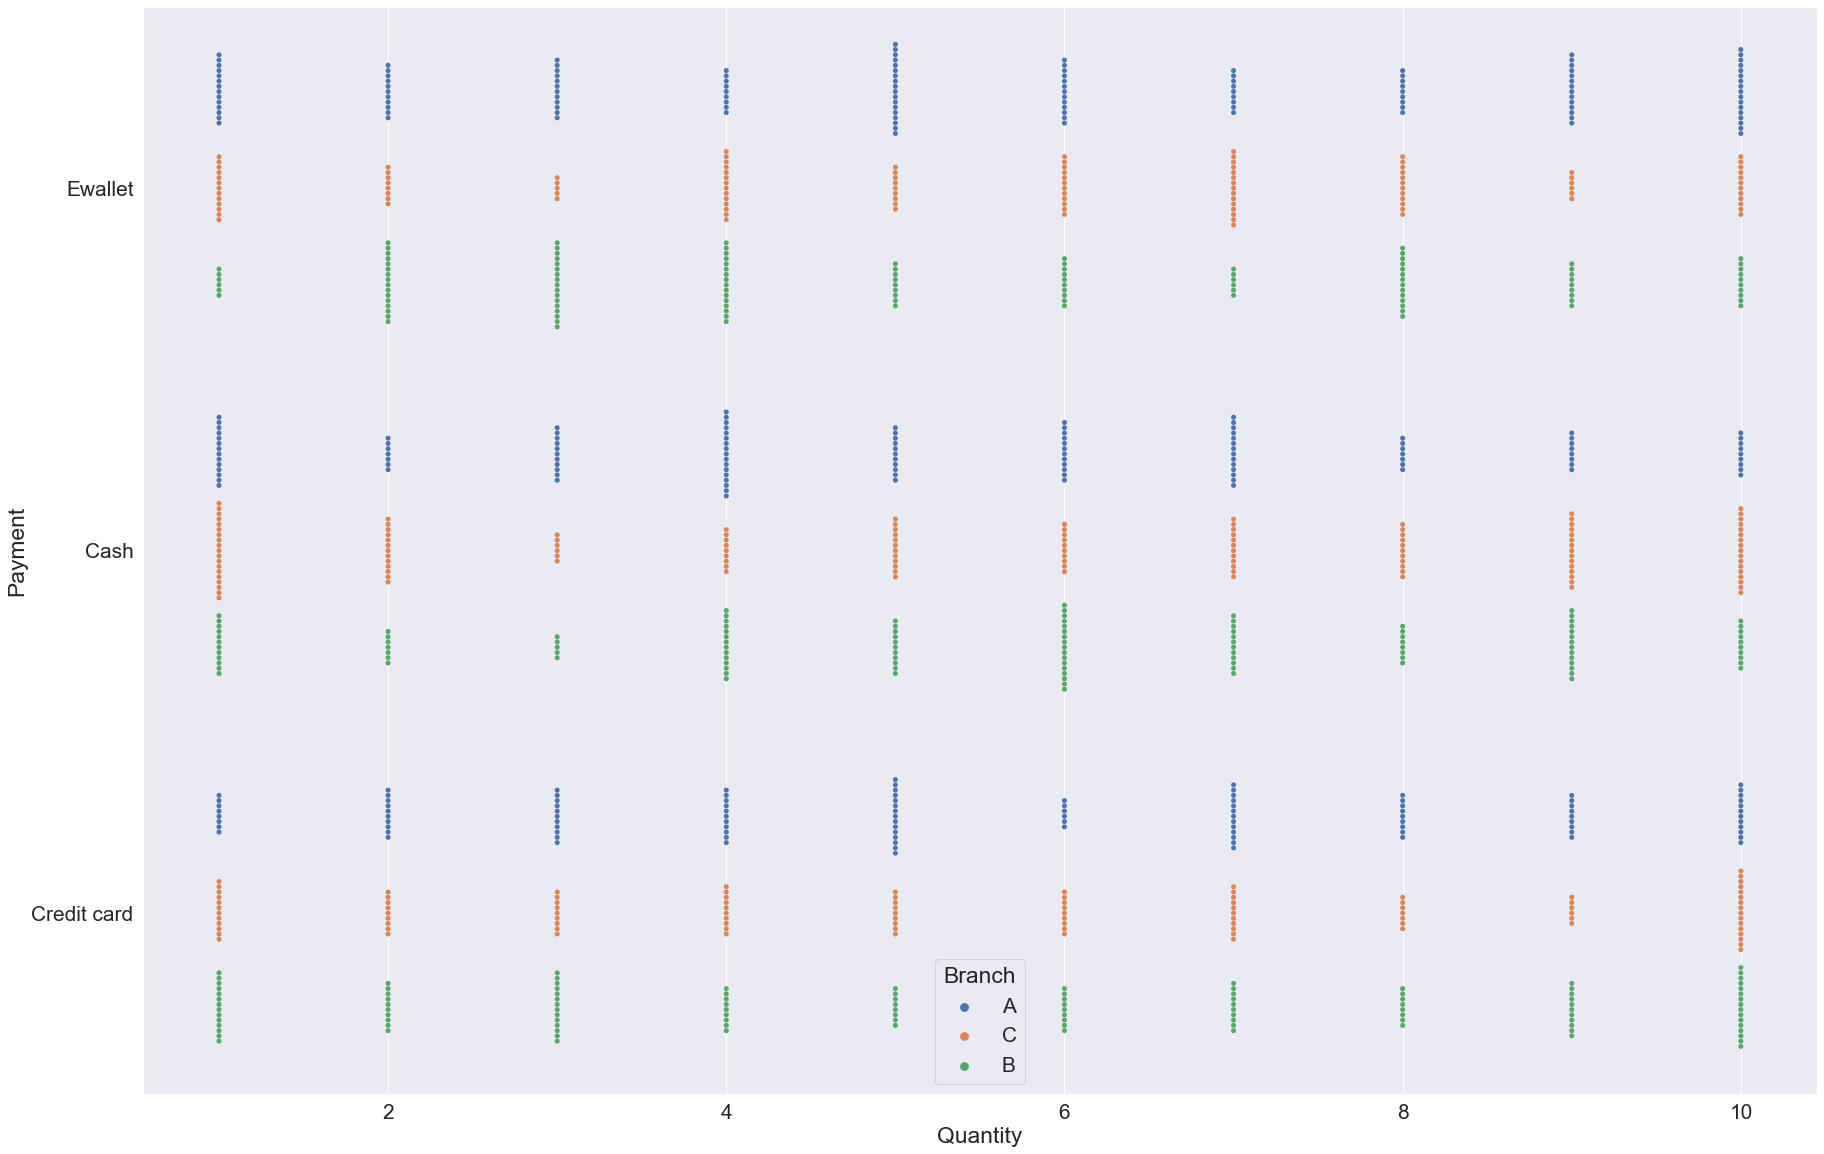

In [71]:
sns.swarmplot(y = "Payment" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='Gender'>

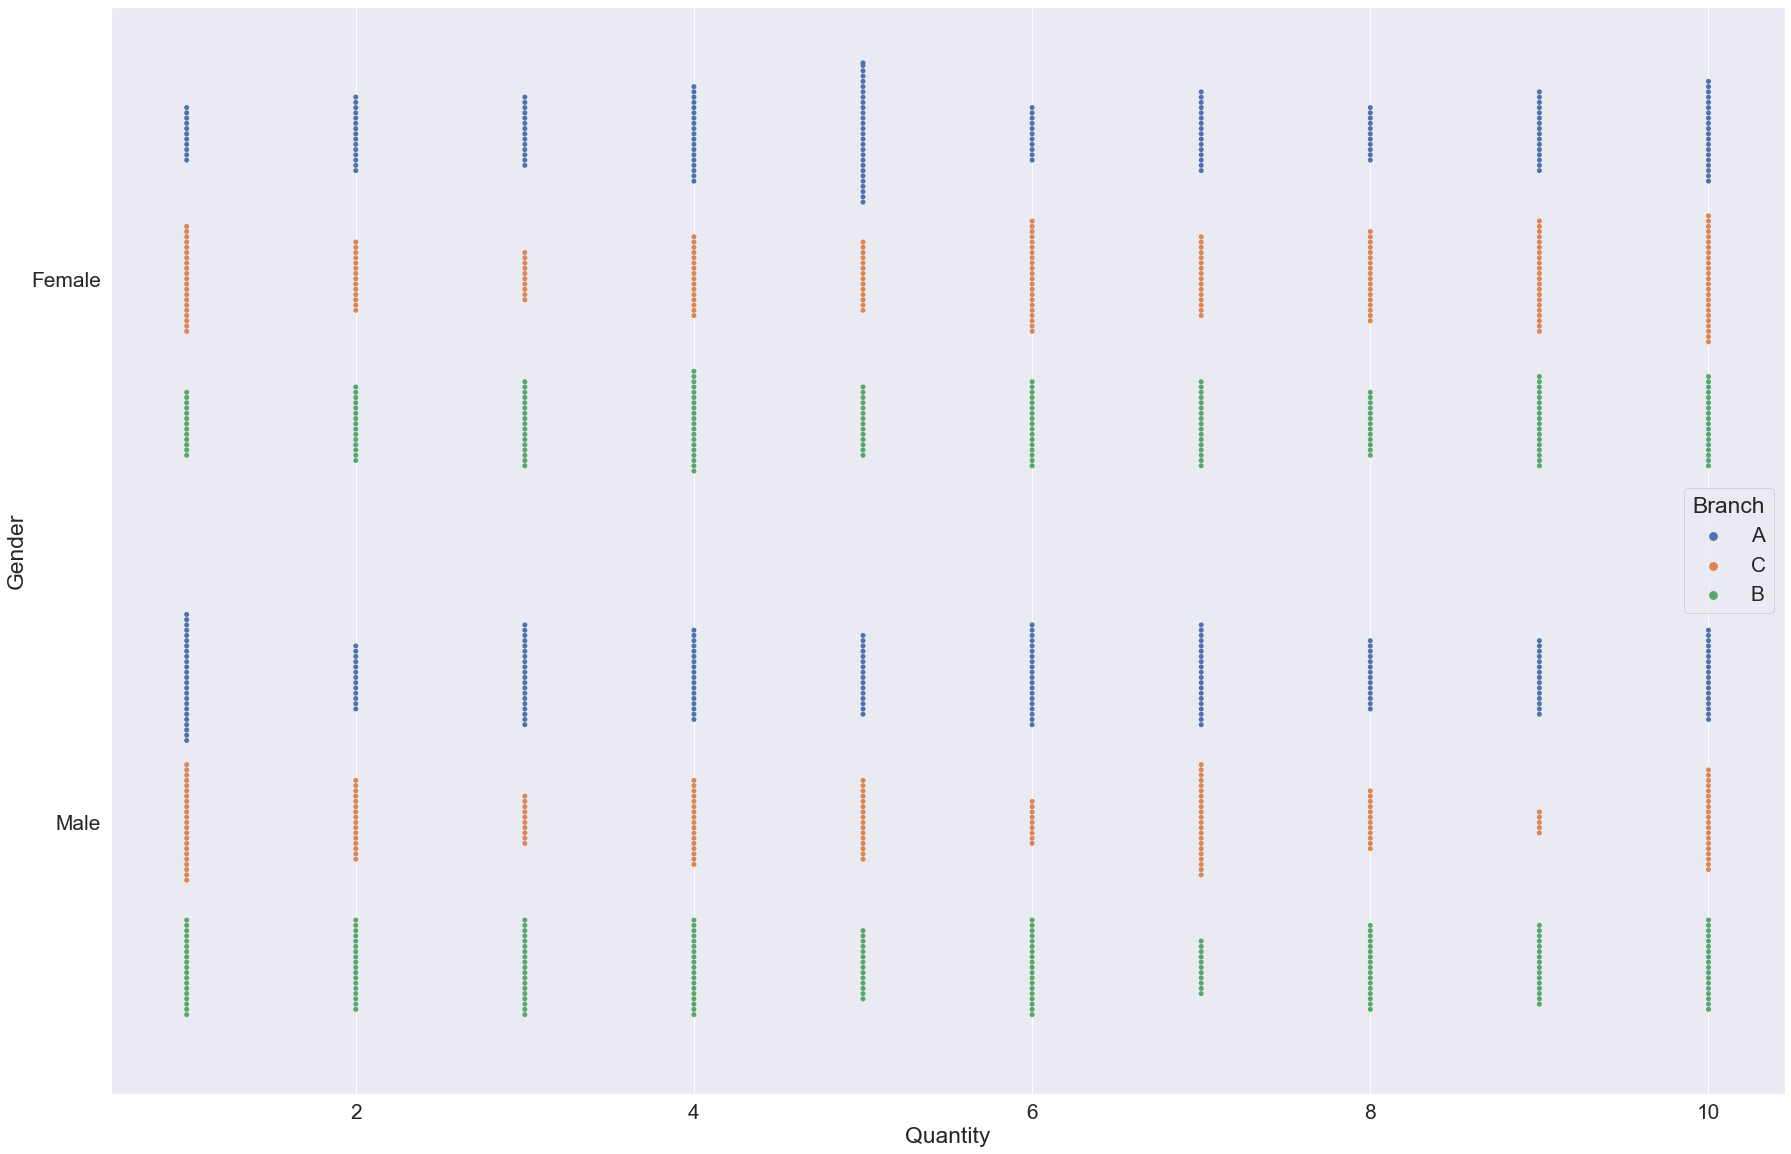

In [72]:
sns.swarmplot(y = "Gender" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='Customer type'>

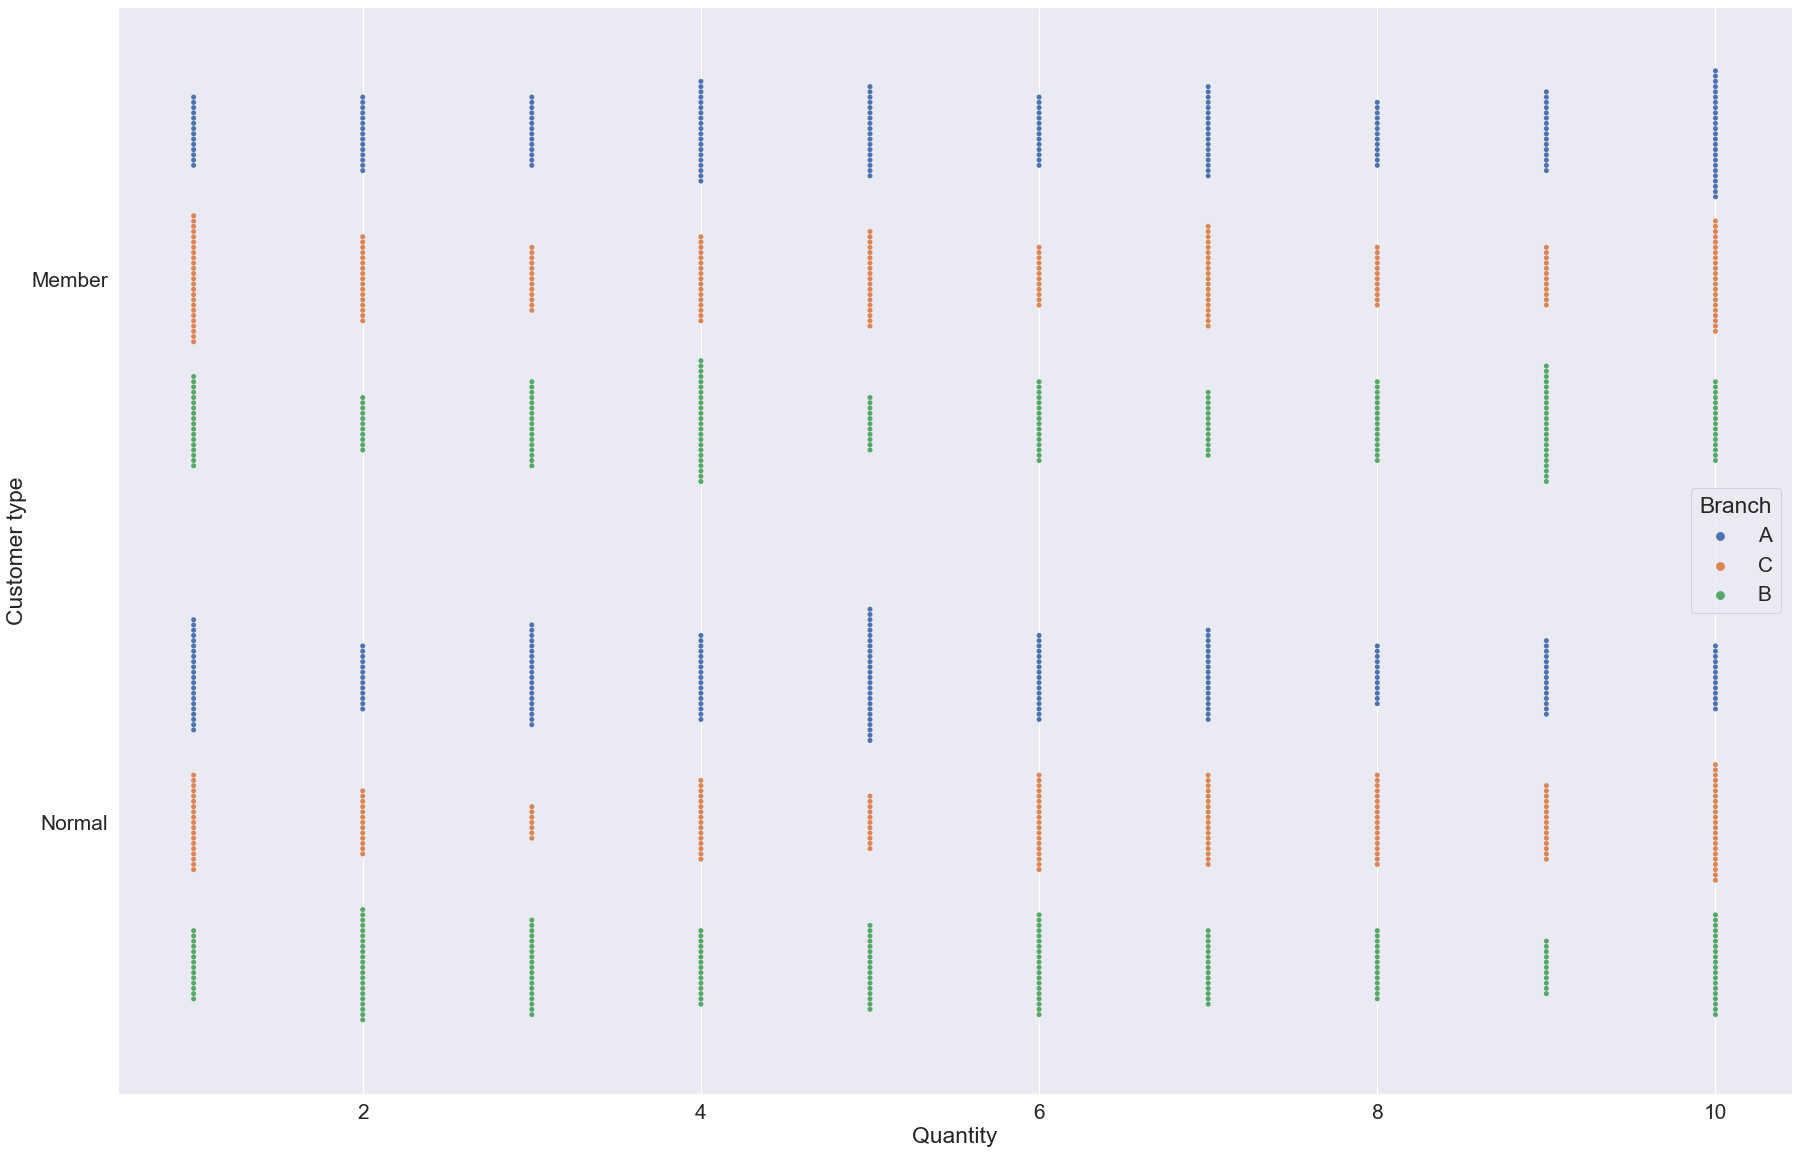

In [73]:
sns.swarmplot(y = "Customer type" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

<AxesSubplot:xlabel='Quantity', ylabel='City'>

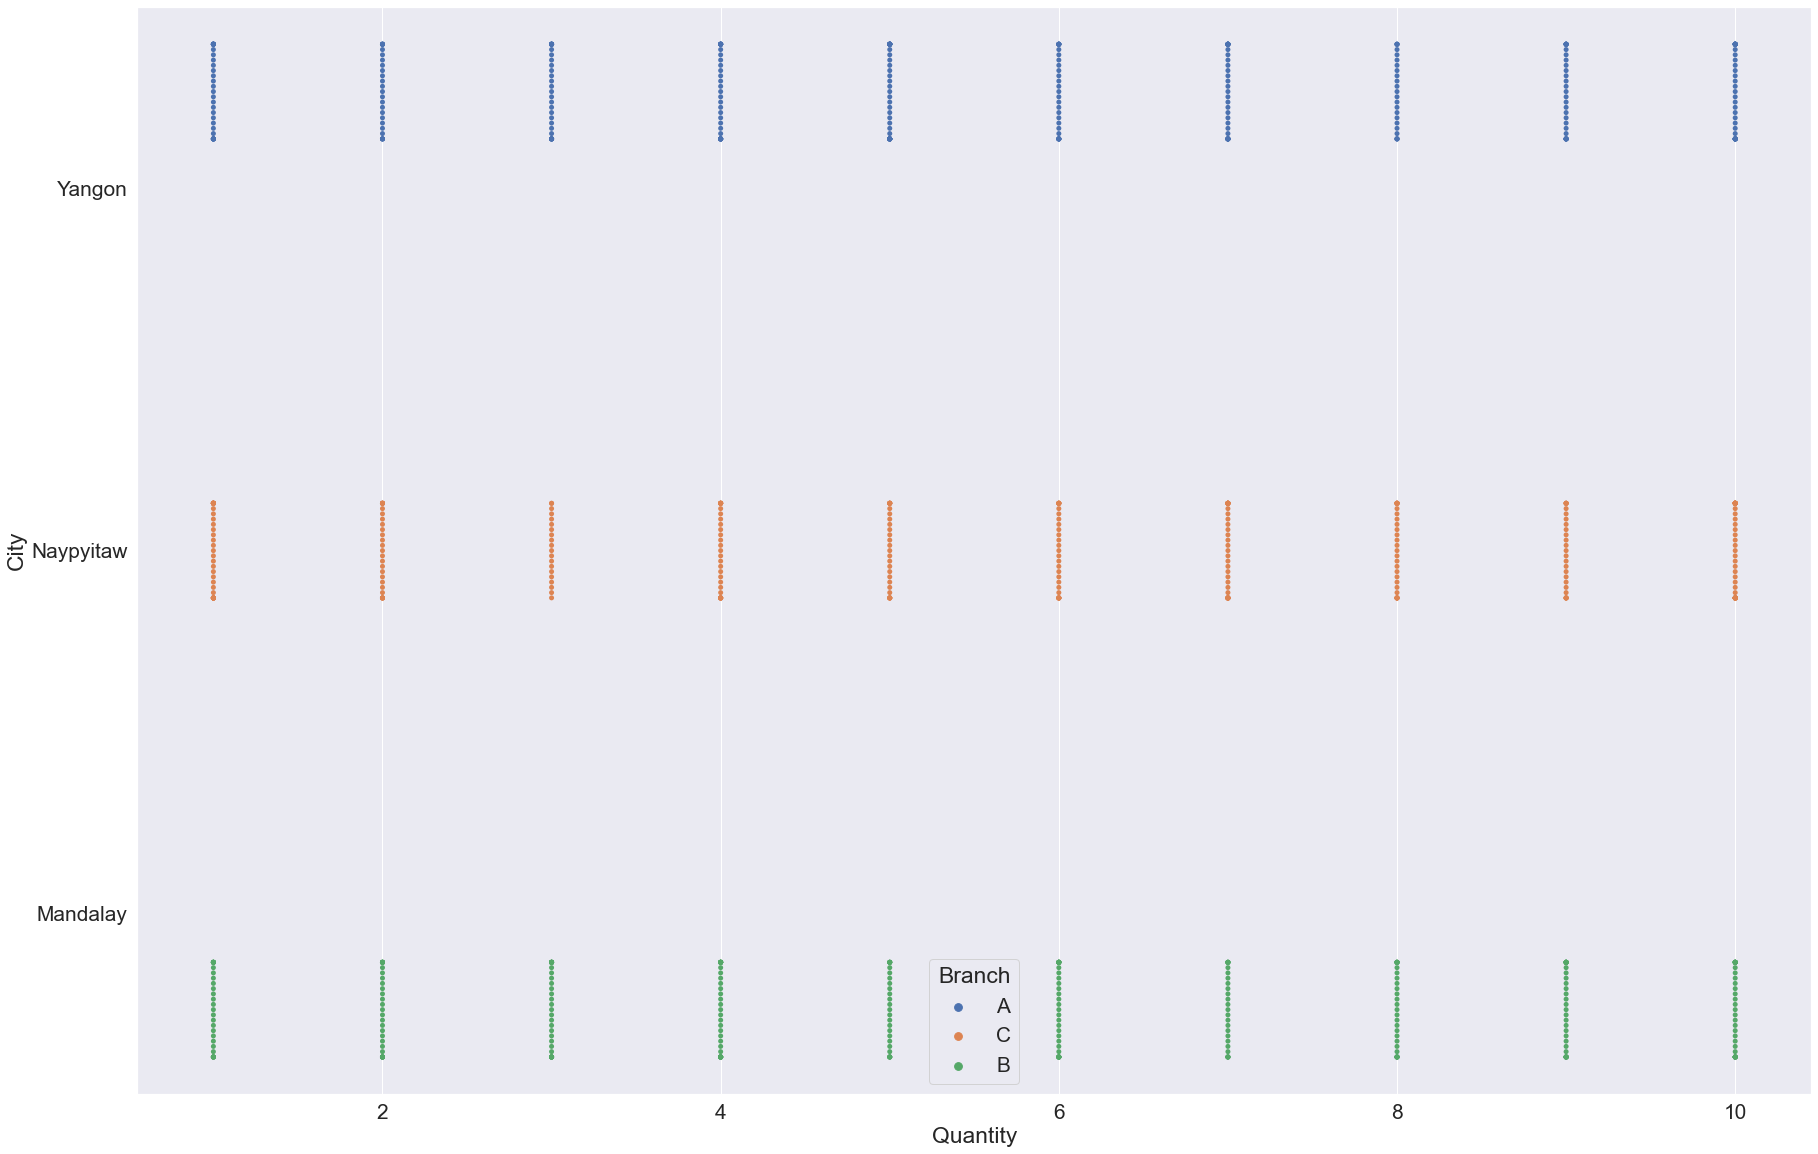

In [74]:
sns.swarmplot(y = "City" , x = "Quantity" ,  hue = "Branch" , data = df , dodge = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [76]:
df["Branch"].value_counts()


A    340
B    332
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

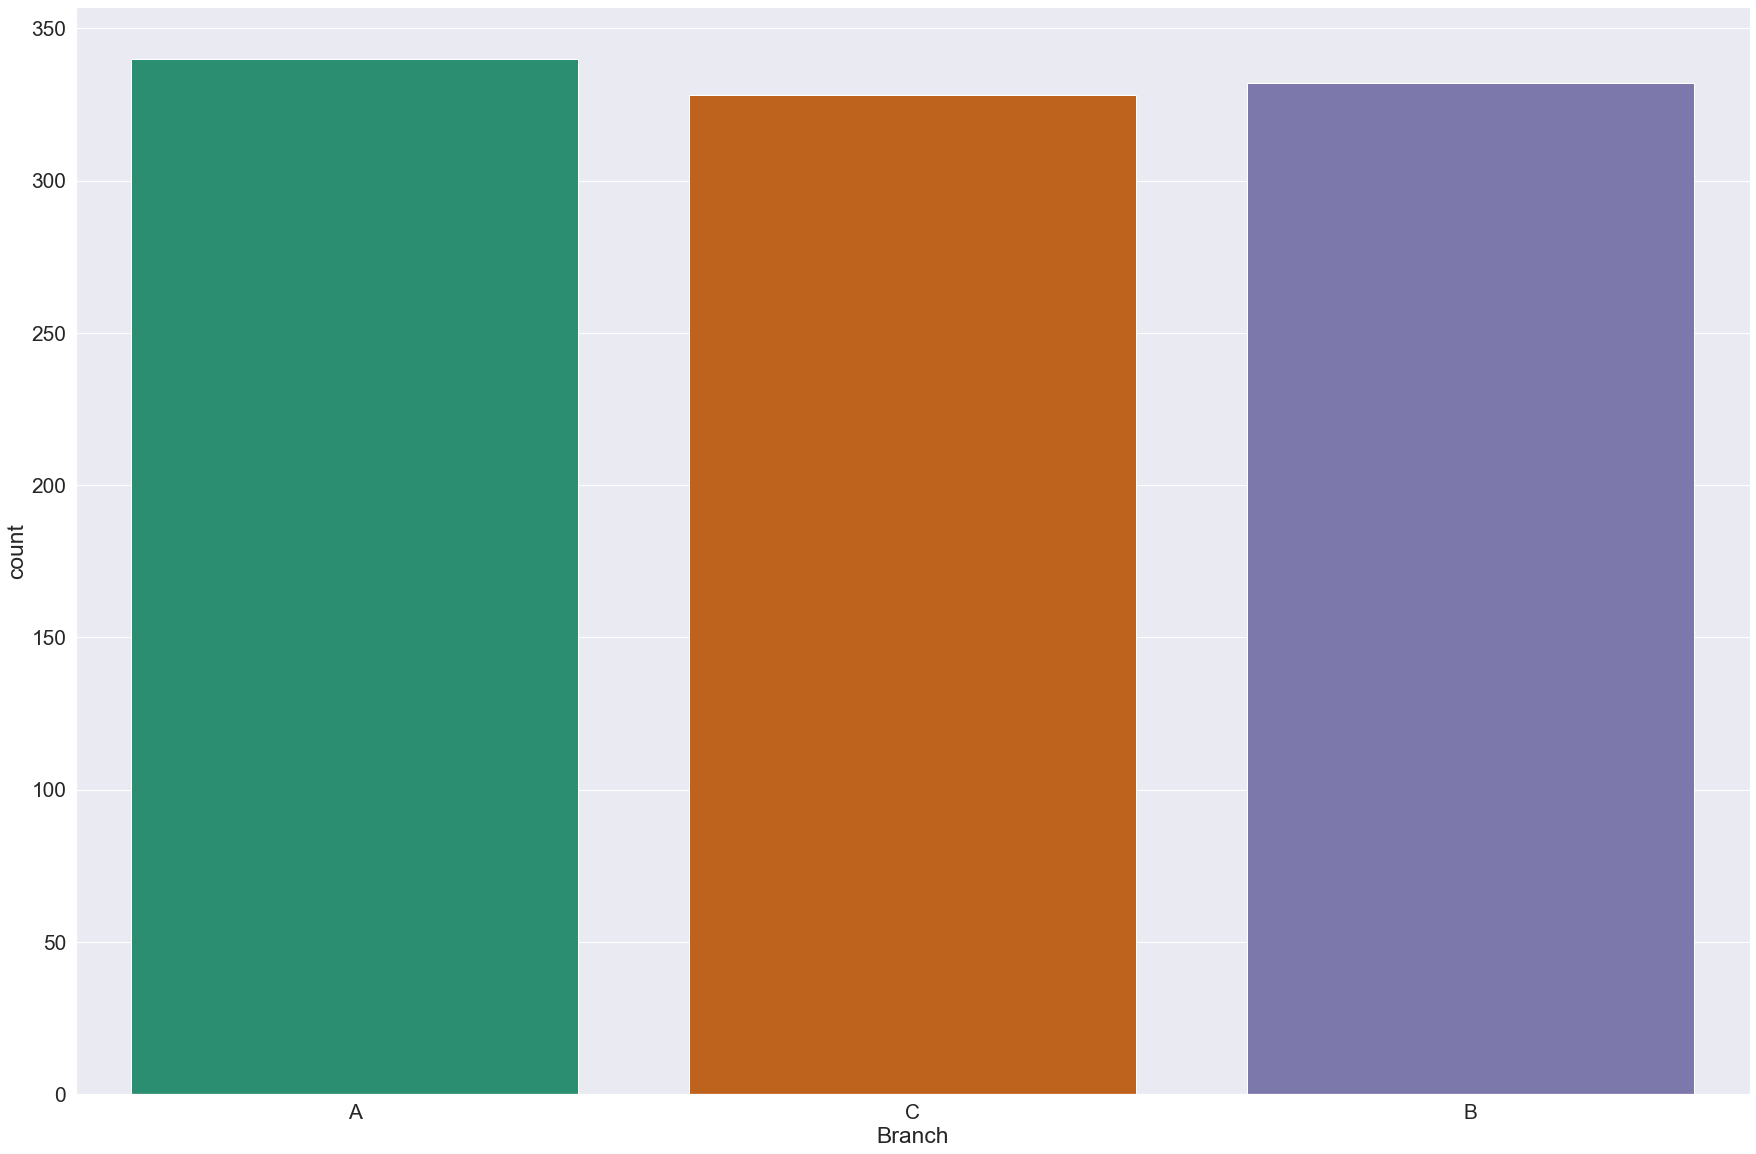

In [77]:
sns.countplot( "Branch" , data = df , palette="Dark2")


In [78]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

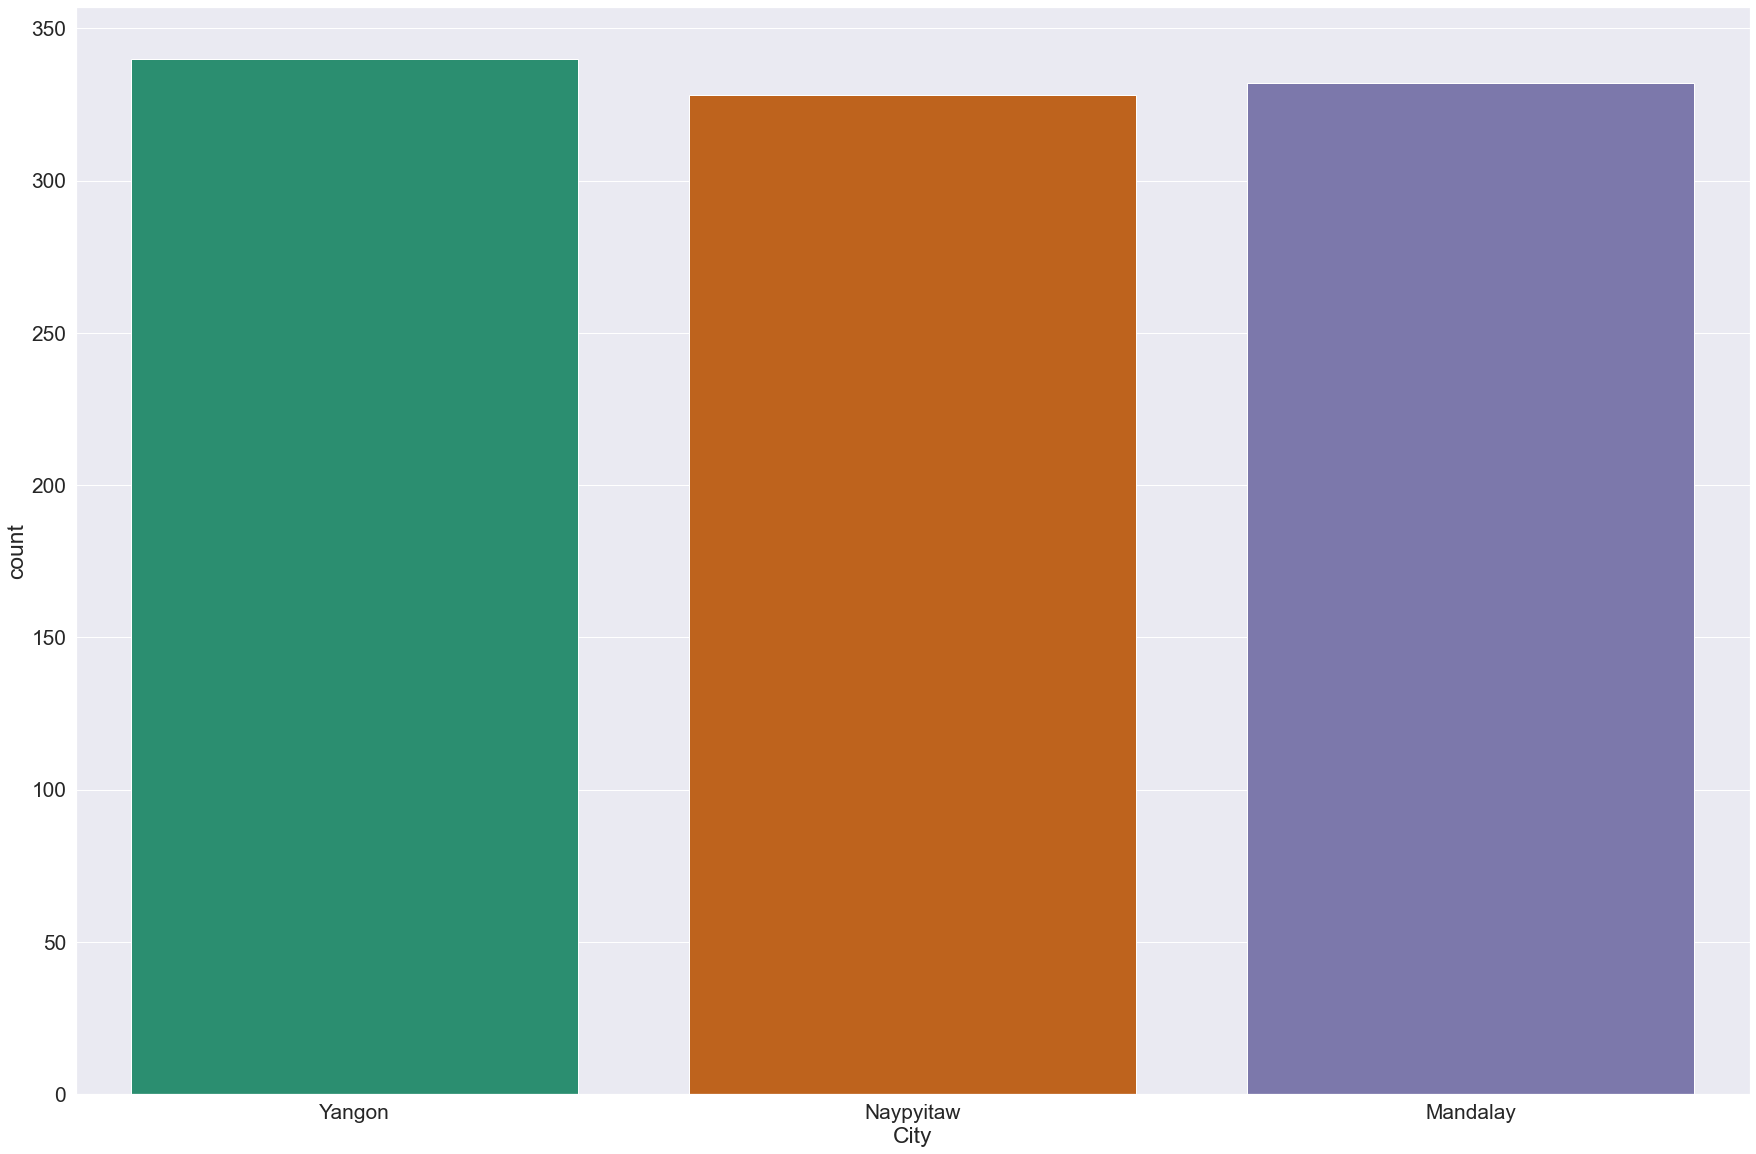

In [79]:
sns.countplot( "City" , data = df , palette="Dark2")


In [80]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

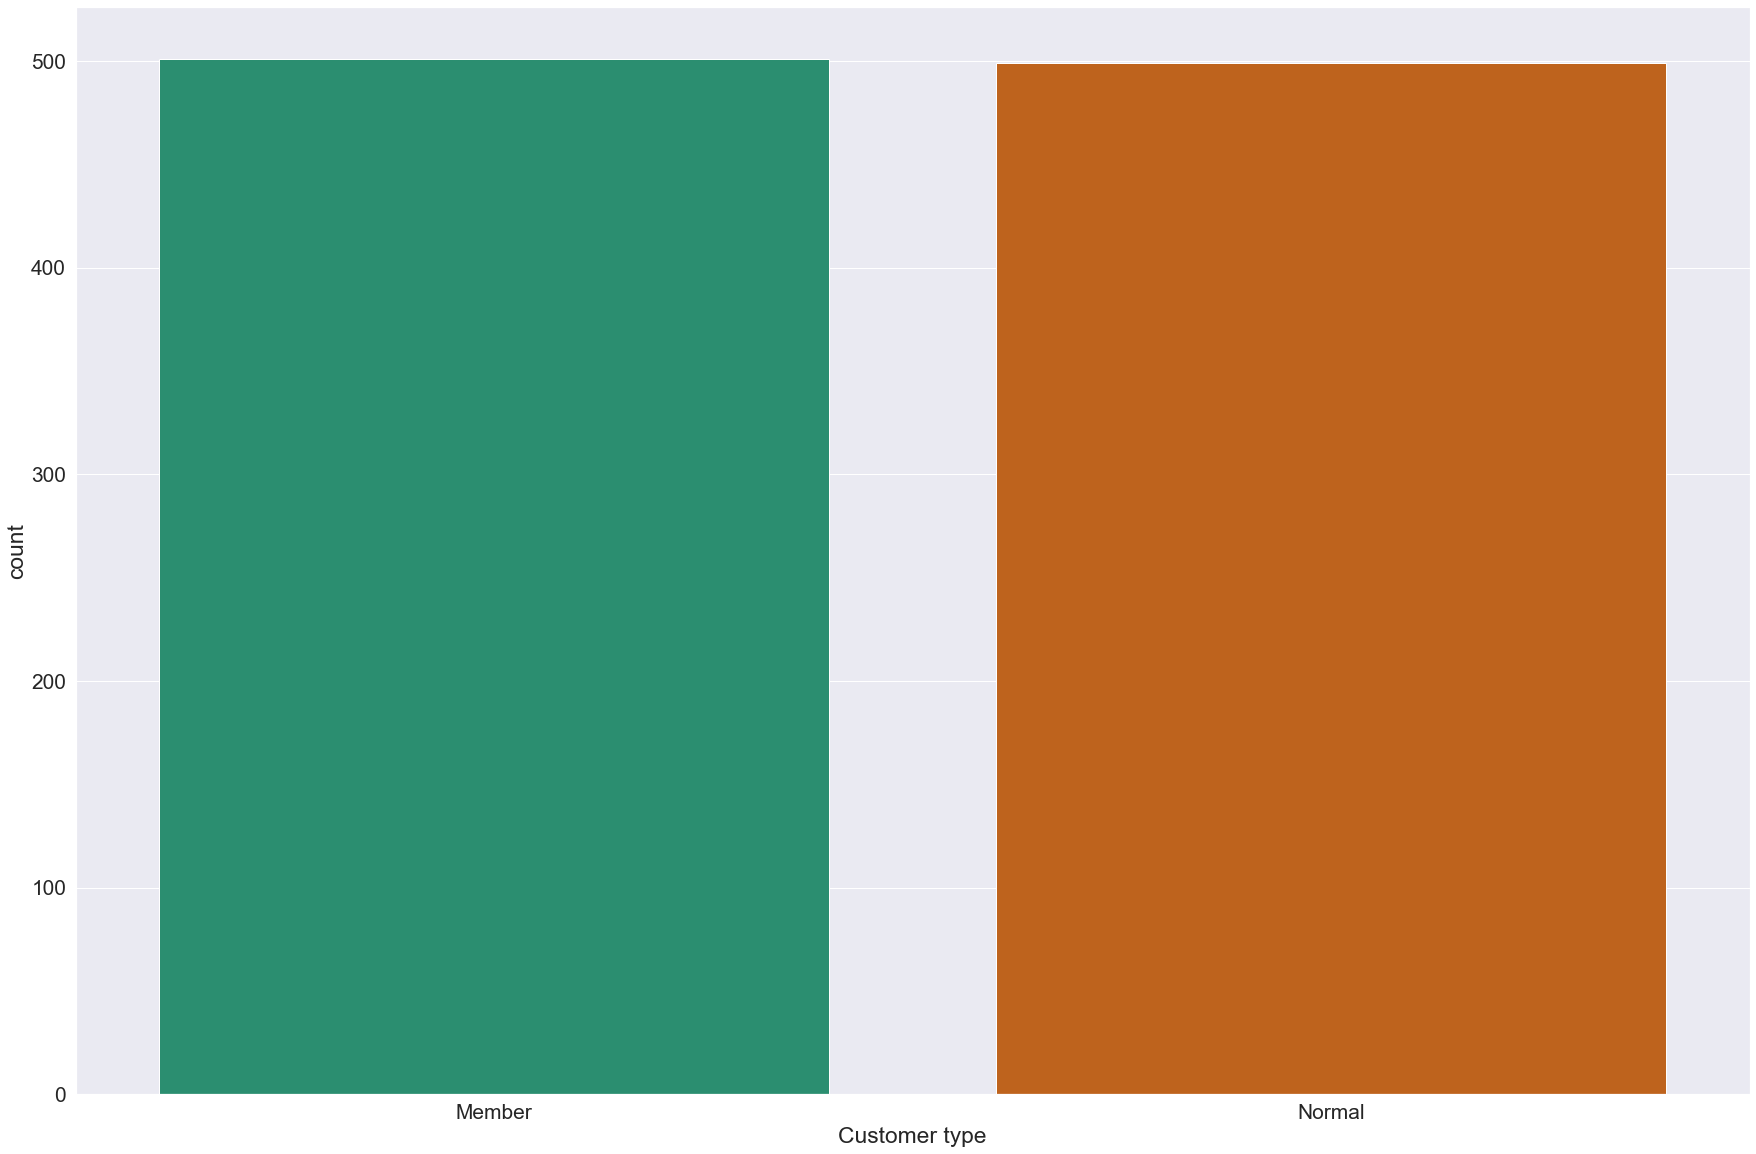

In [81]:
sns.countplot( "Customer type" , data = df , palette="Dark2")


In [82]:
df.head(2)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   

    Time  Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08  Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29     Cash   76.40                 4.761905        3.8200     9.6   

   Years    Month       Day Weeday  
0   2019  January  Saturday      5  
1   2019    March    Friday      4  

[2 rows x 21 columns]

<AxesSubplot:xlabel='Gender', ylabel='count'>

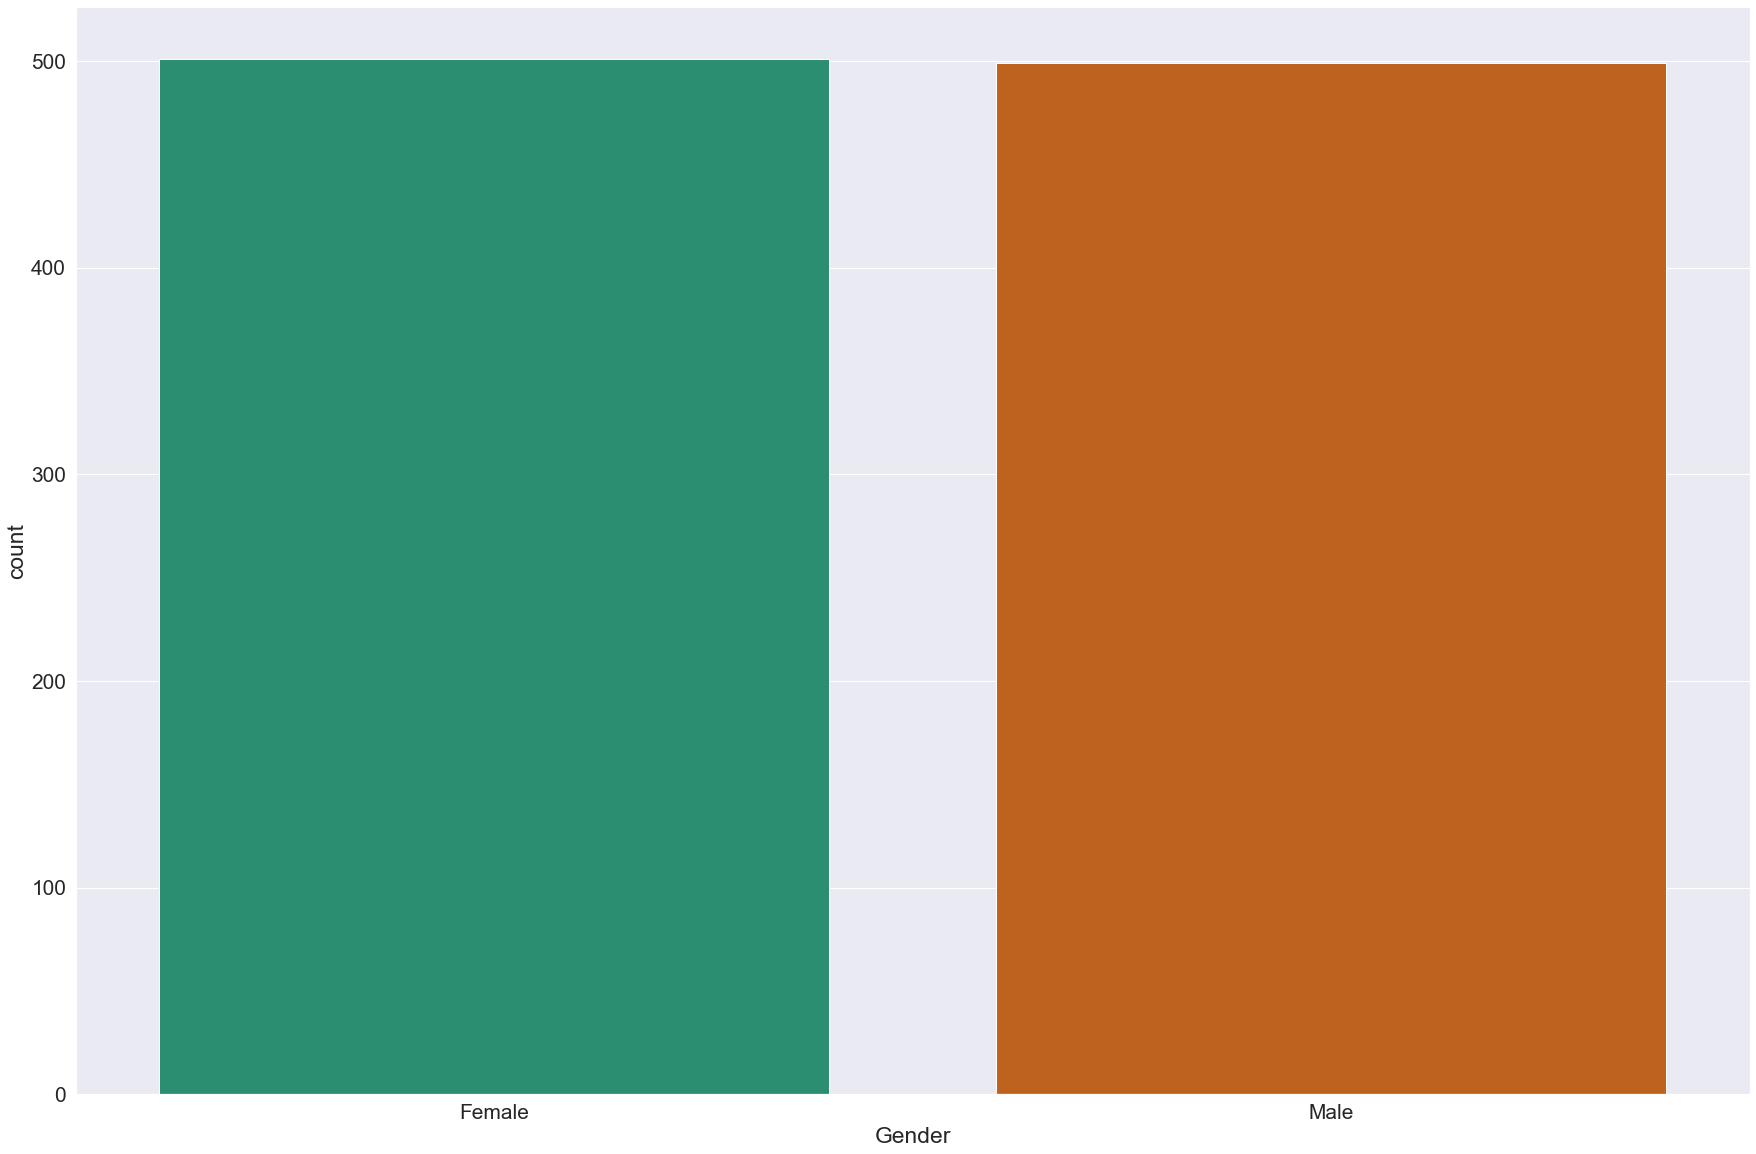

In [83]:
sns.countplot( "Gender" , data = df , palette="Dark2")


<AxesSubplot:xlabel='Product line', ylabel='count'>

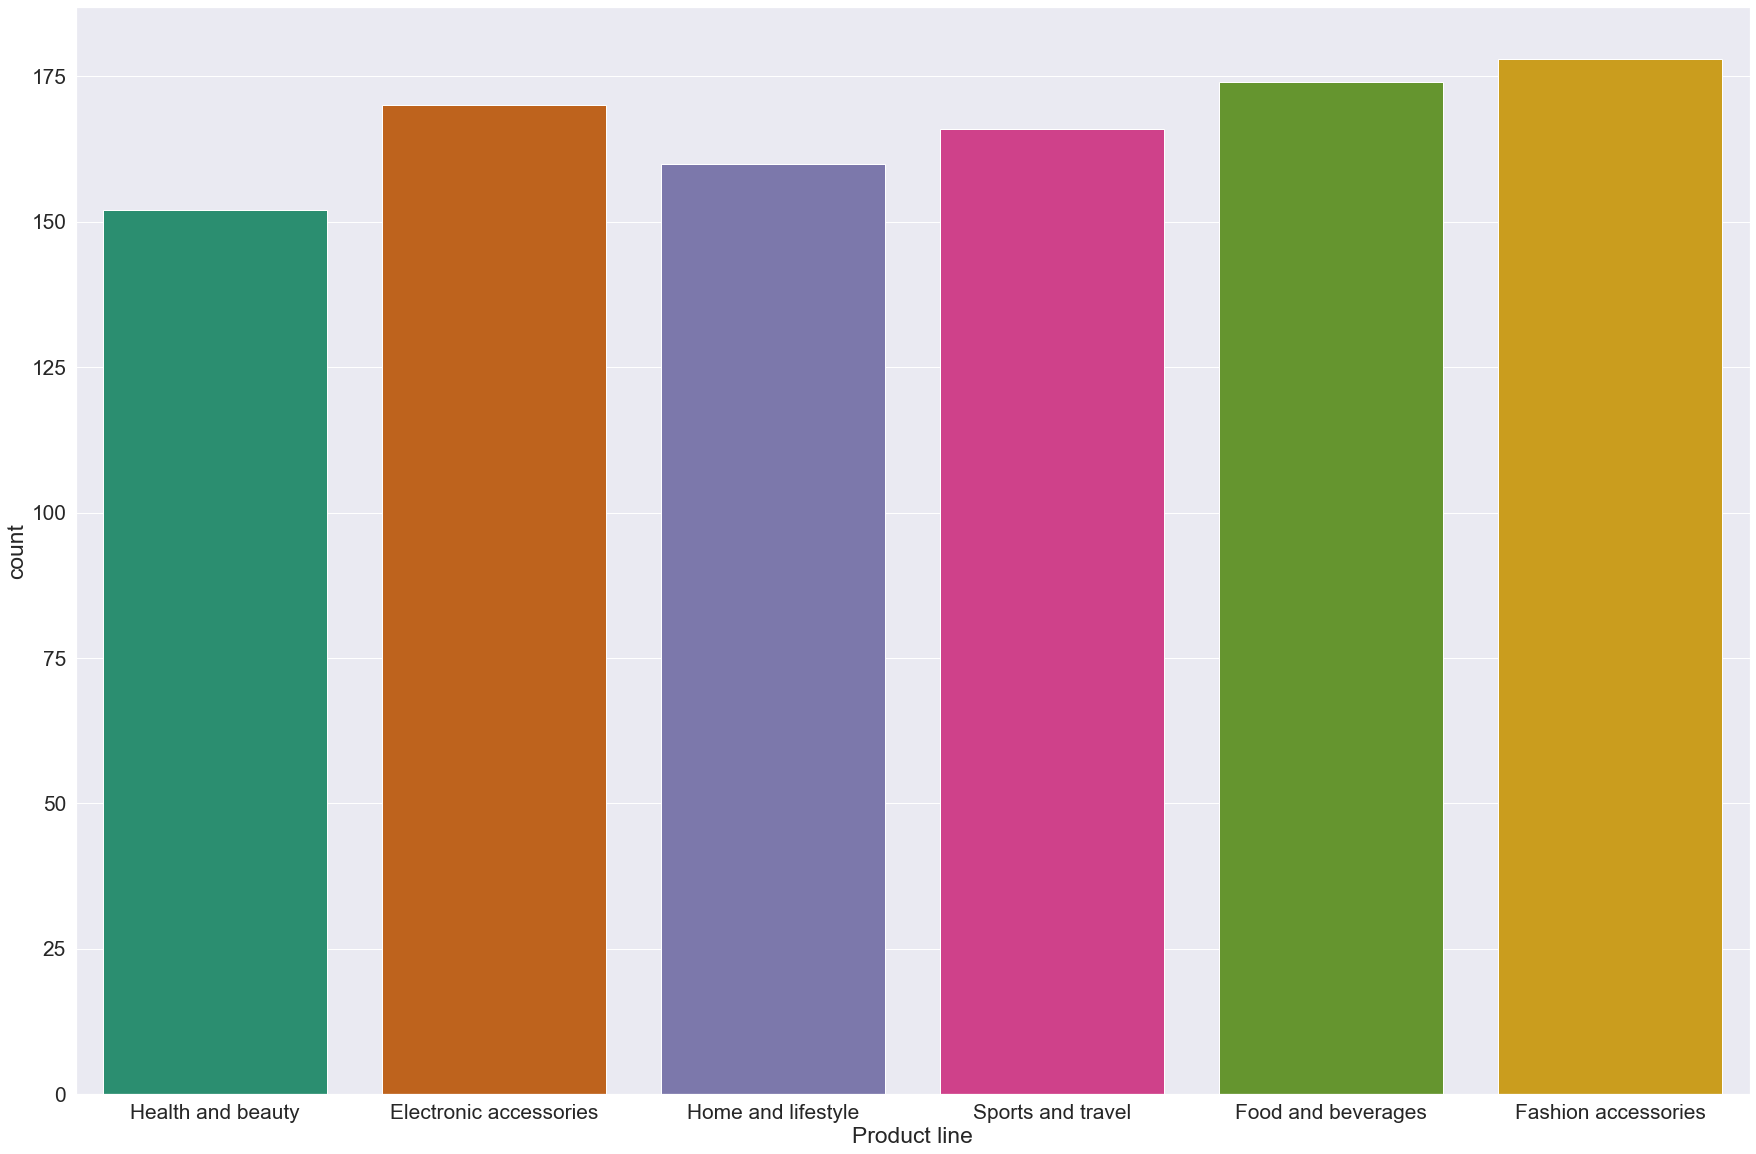

In [84]:
sns.countplot( "Product line" , data = df , palette="Dark2")


<AxesSubplot:xlabel='Payment', ylabel='count'>

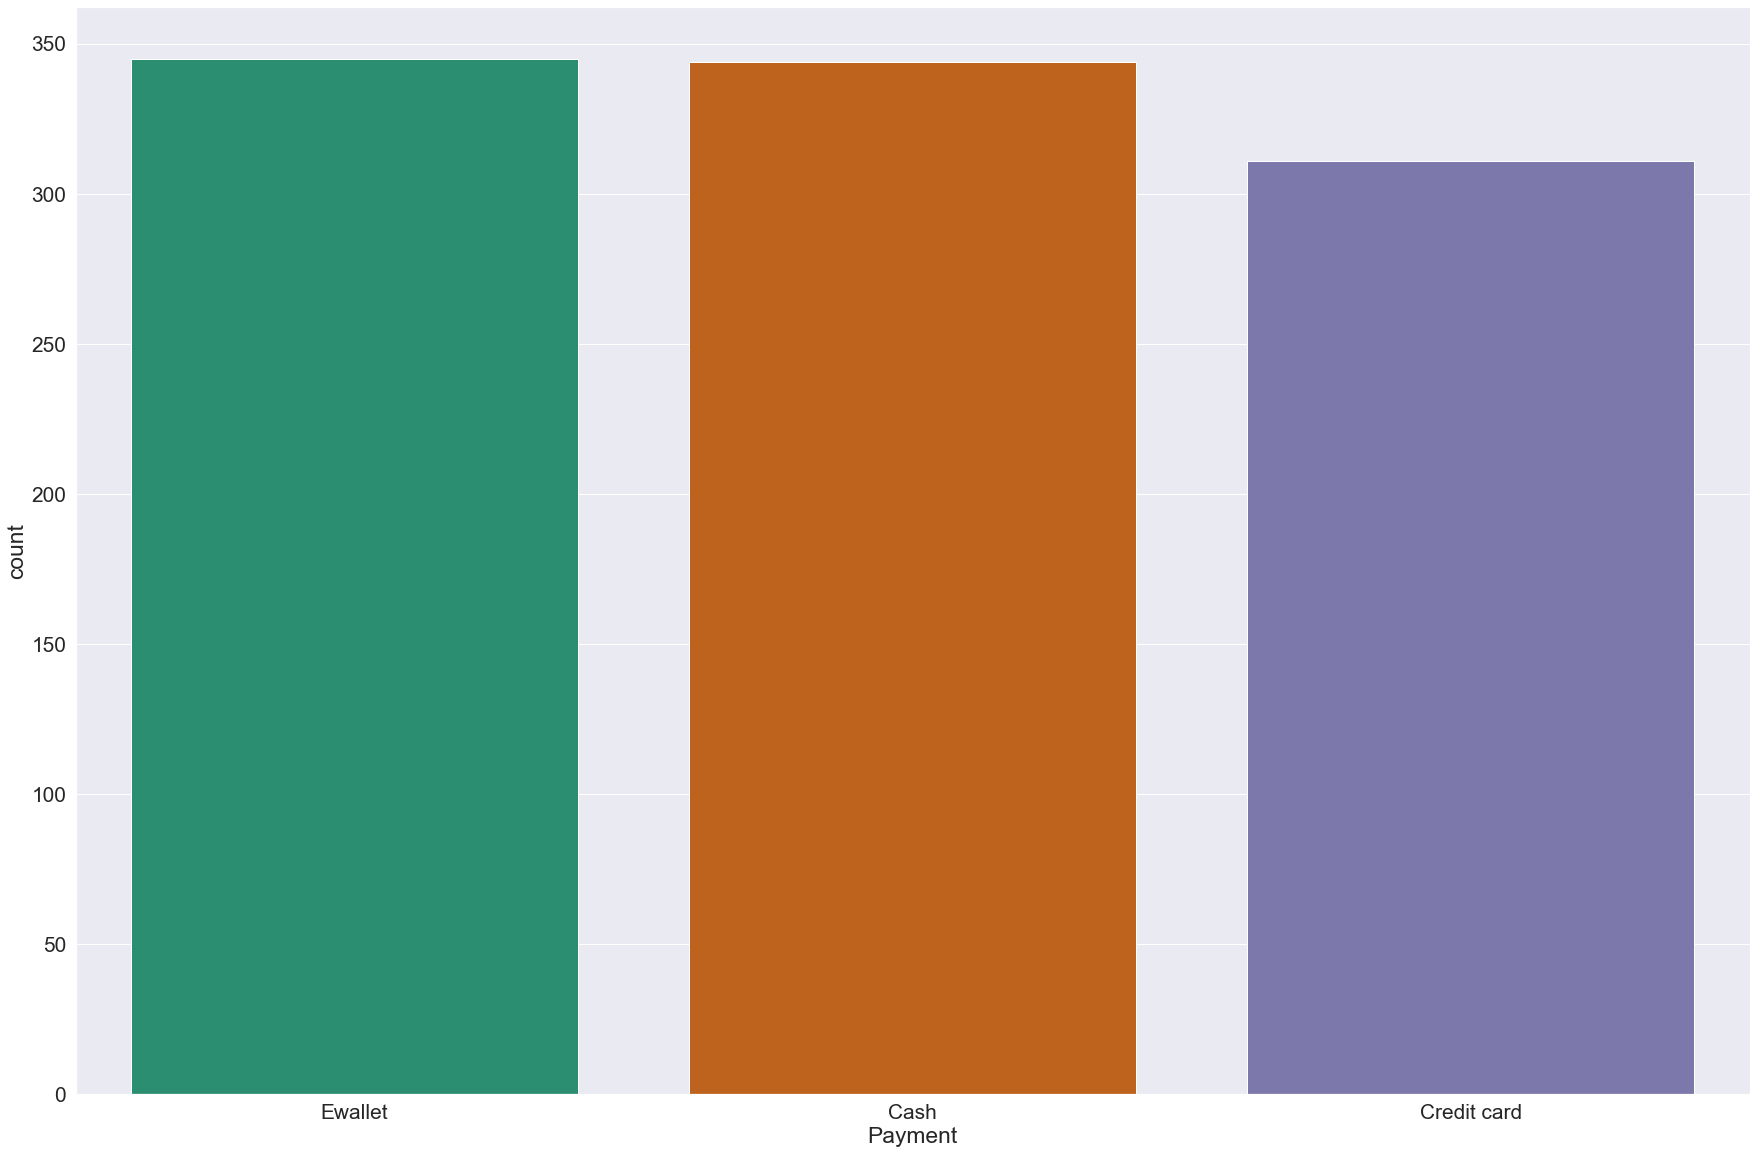

In [85]:
sns.countplot( "Payment" , data = df , palette="Dark2")


<AxesSubplot:xlabel='Years', ylabel='count'>

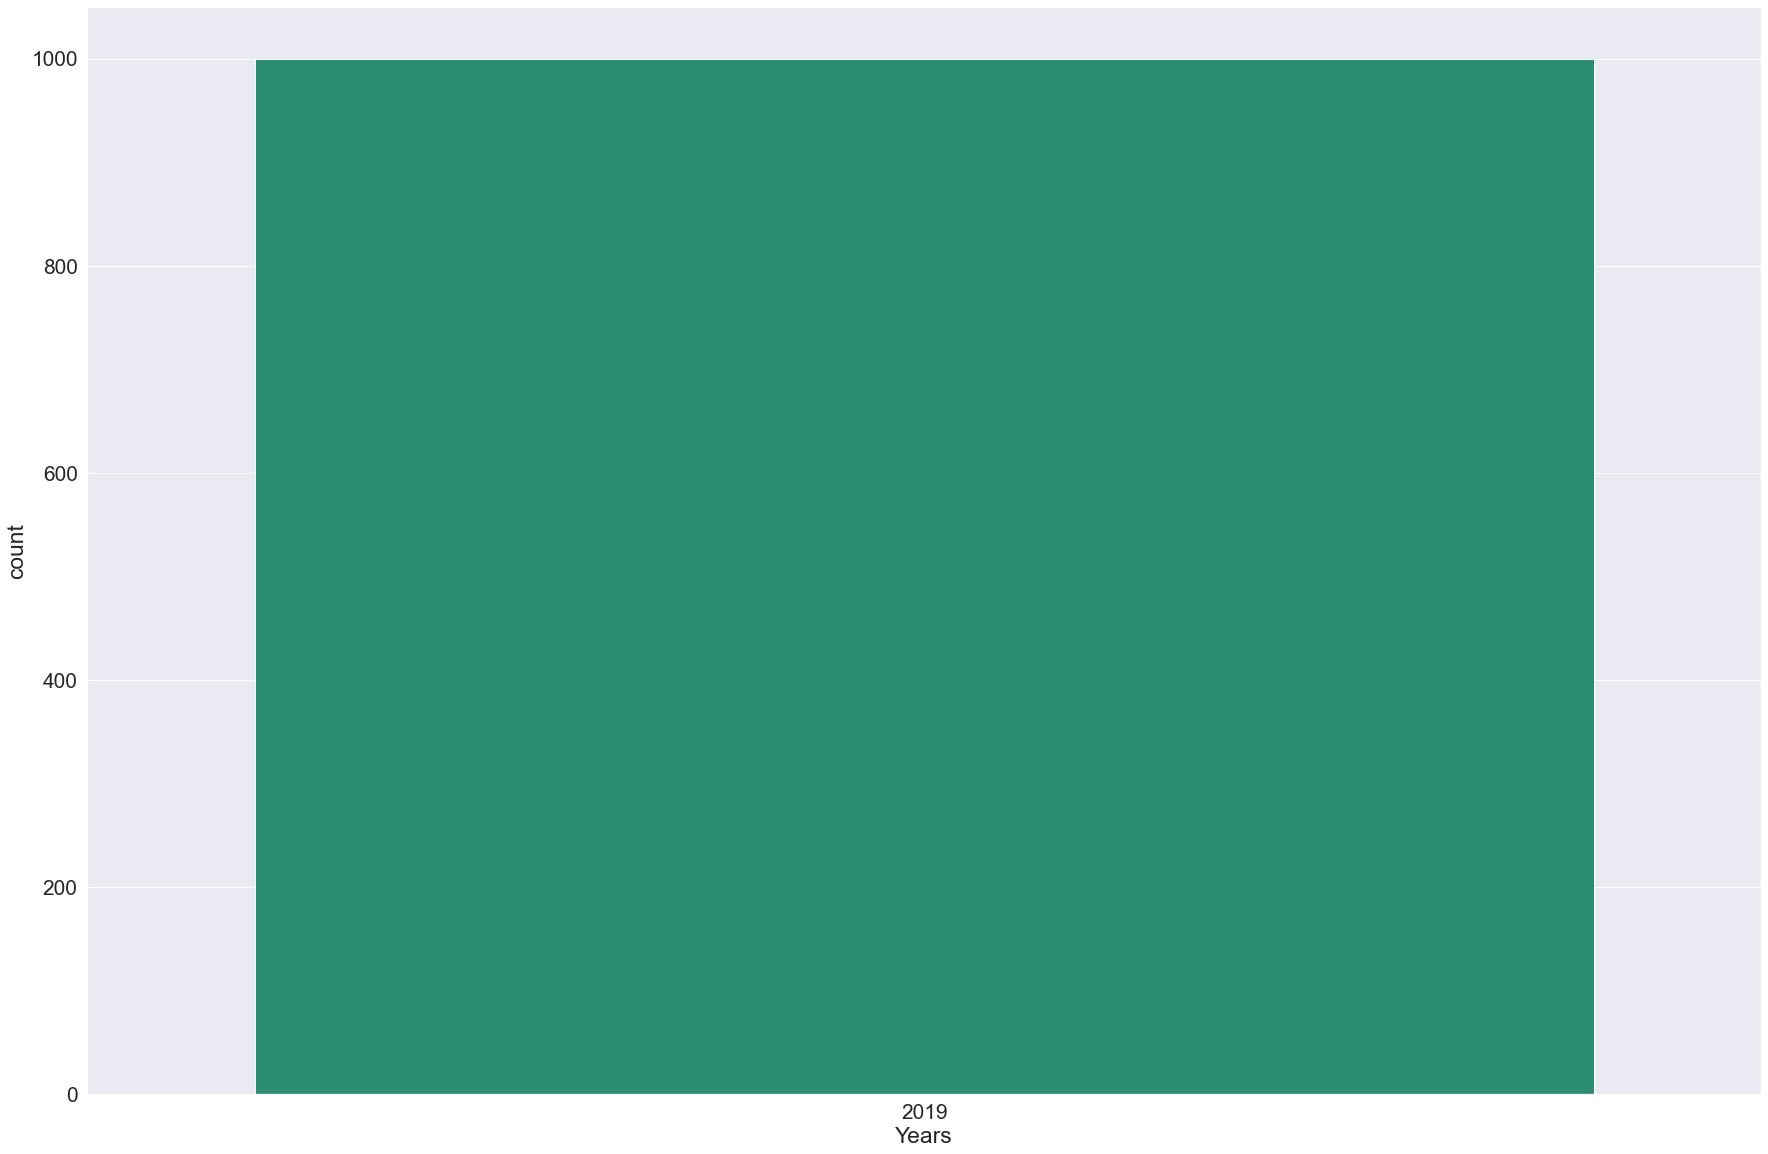

In [86]:
sns.countplot( "Years" , data = df , palette="Dark2")


<AxesSubplot:xlabel='Month', ylabel='count'>

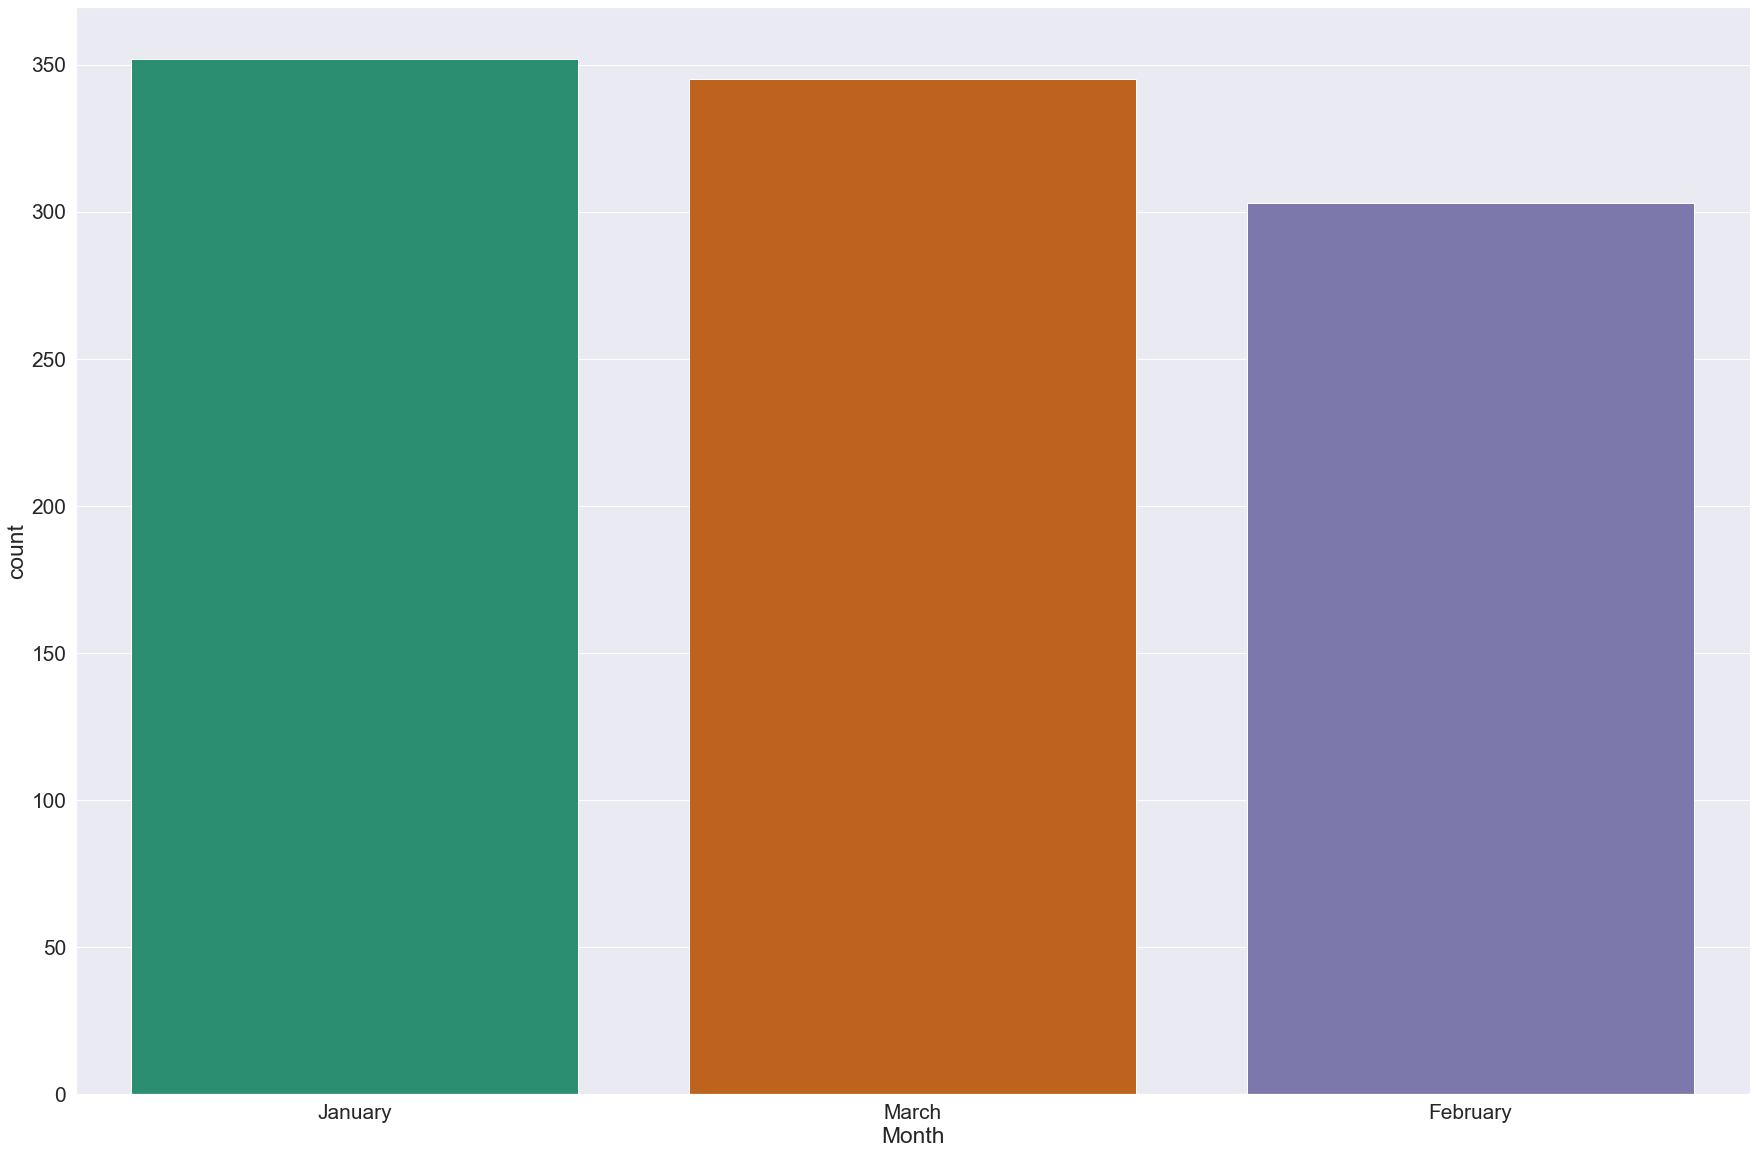

In [87]:
sns.countplot( "Month" , data = df , palette="Dark2")


<AxesSubplot:xlabel='Day', ylabel='count'>

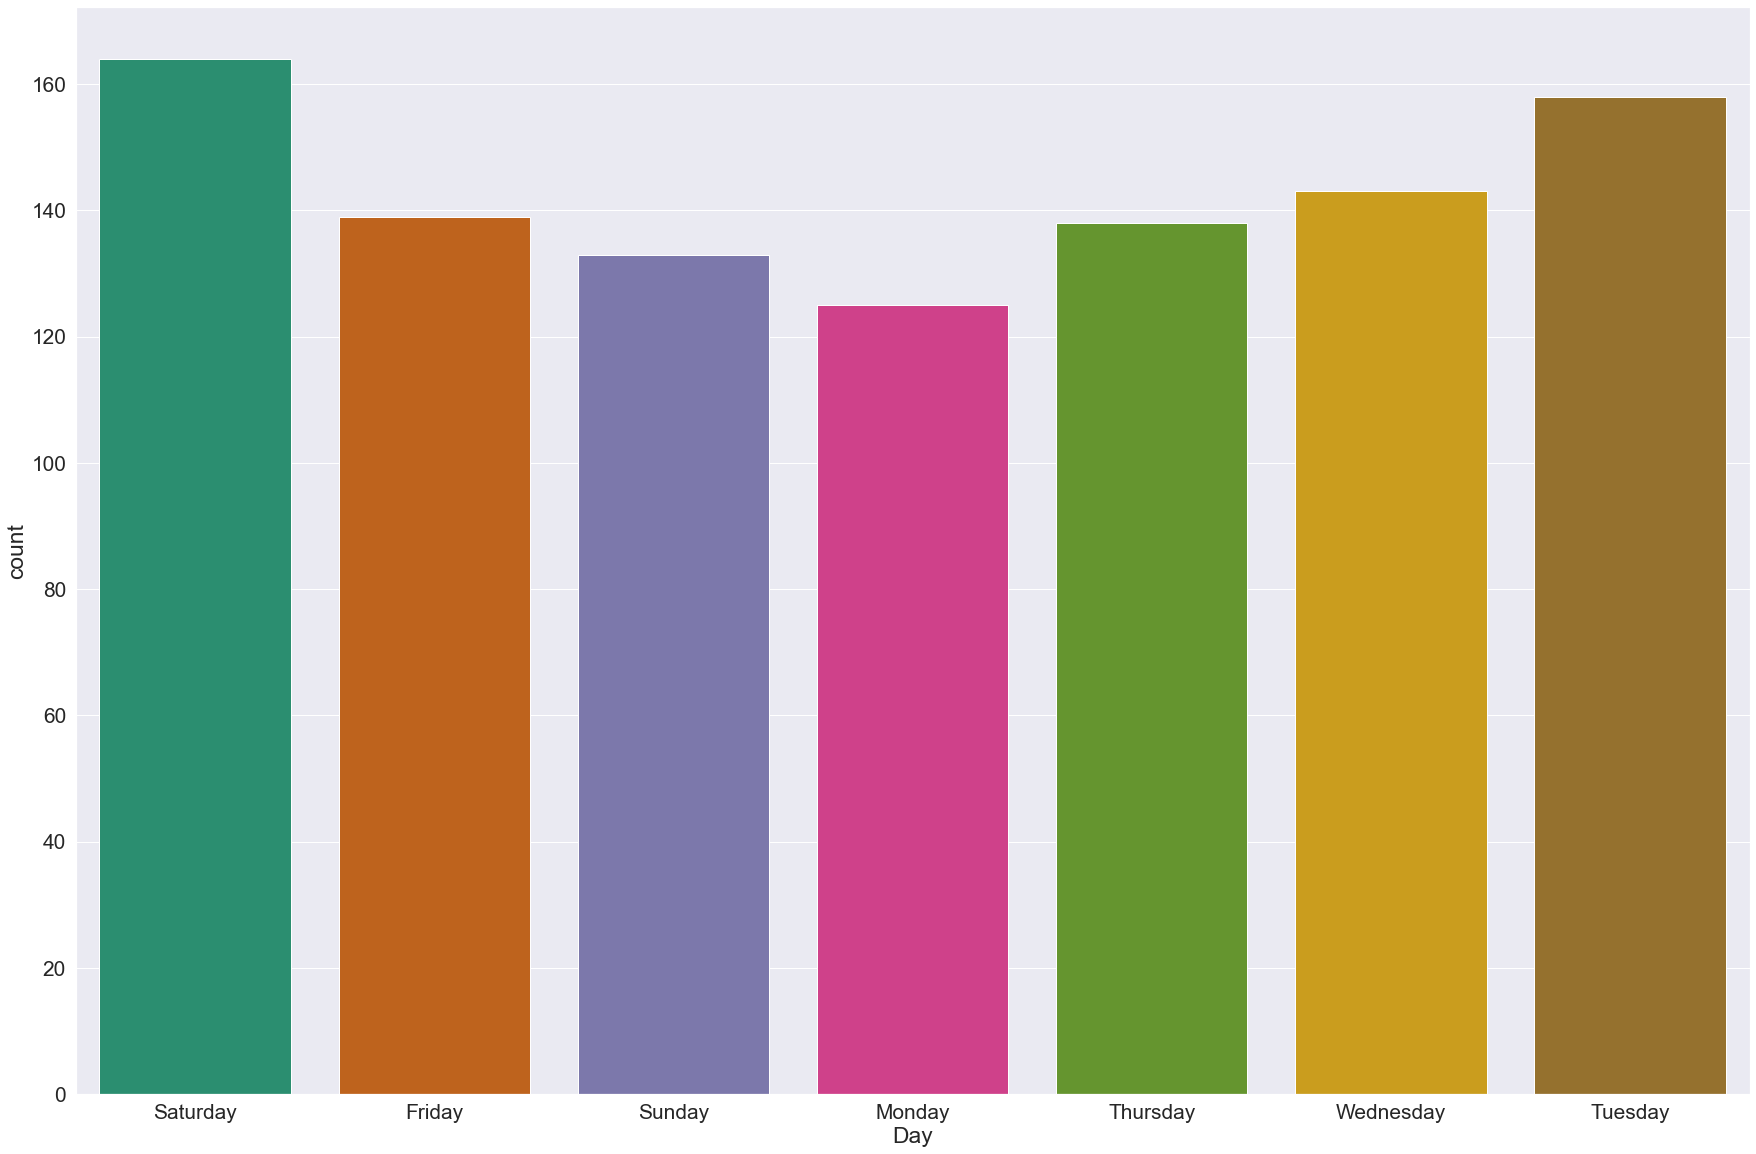

In [88]:
sns.countplot( "Day" , data = df , palette="Dark2")


<AxesSubplot:xlabel='Weeday', ylabel='count'>

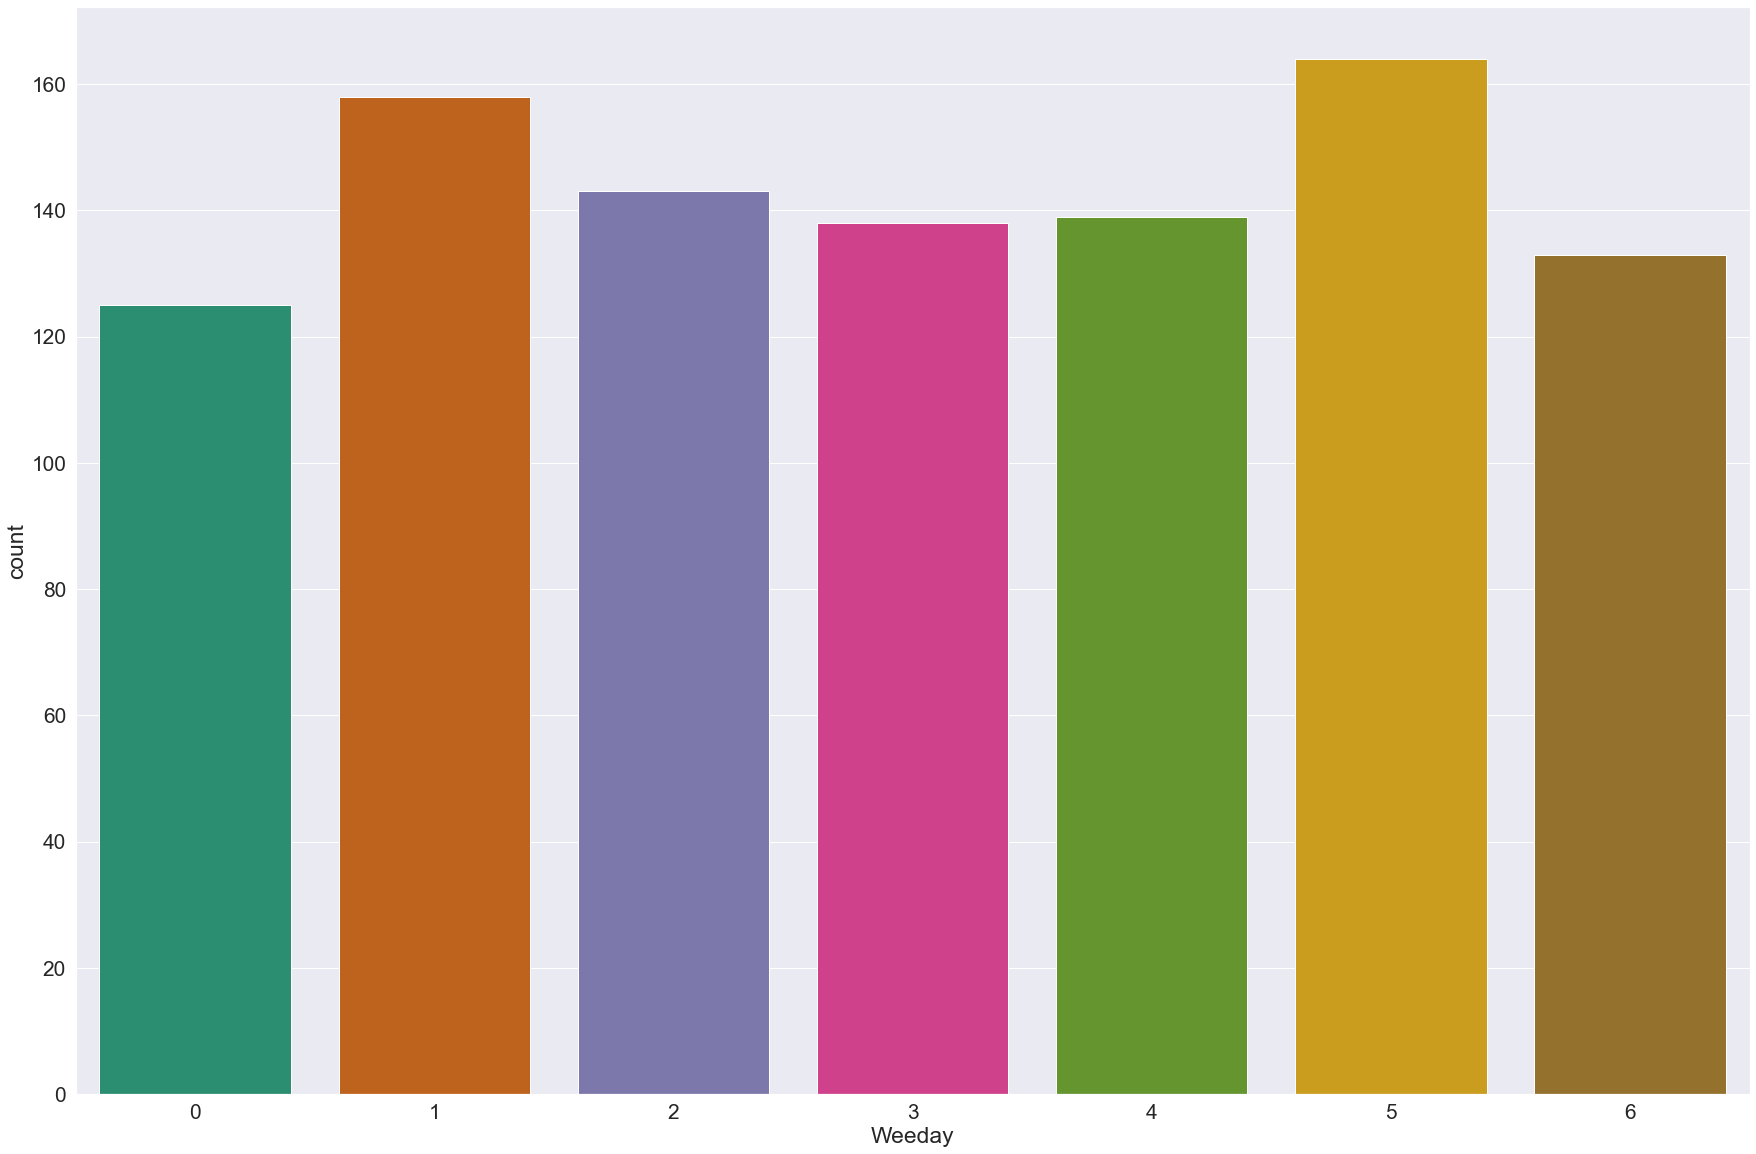

In [89]:
sns.countplot( "Weeday" , data = df , palette="Dark2")


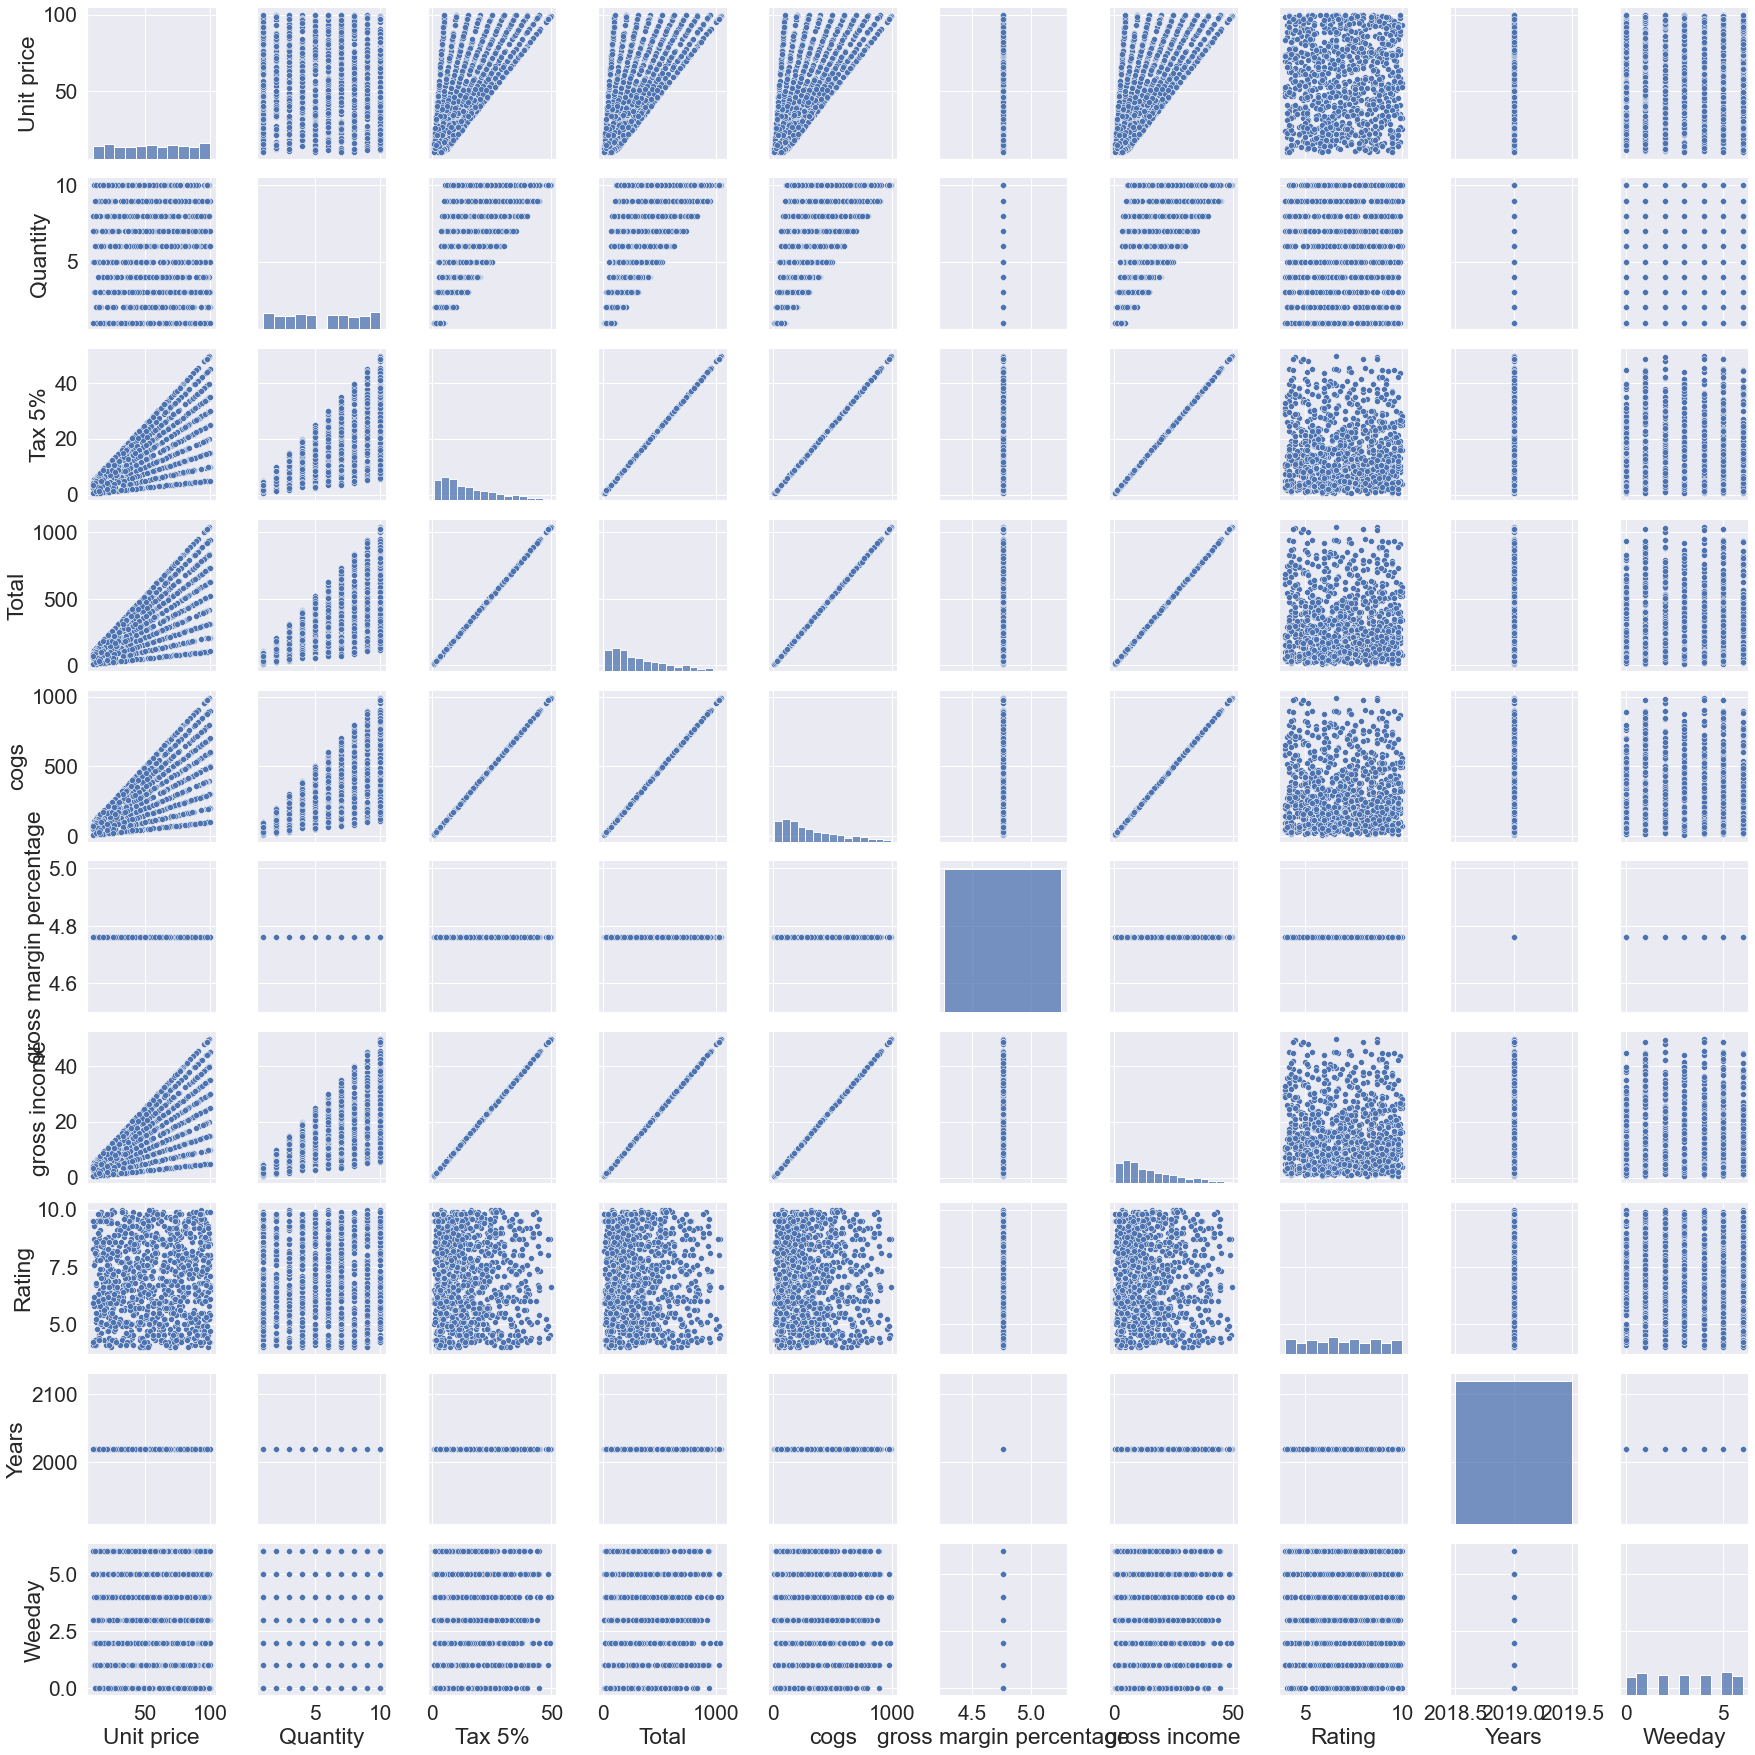

In [90]:
sns.pairplot(df)

In [91]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33         7  16.2155   340.5255  ...   
3         Health and beauty       58.22         8  23.2880   489.0480  ...   
4         Sports and travel       86.31         7  30.2085   634.3785  ...   
..                      ...         ...       ...      ...        ...  ...   
995       Health and beauty       40.35         1   2.0175    42.3675  ...   
996      Home and lifestyle       97.38        10  48.6900  1022.4900  ...   
997      Food and beverages       31.84         1   1.5920    33.4320  ...   
998      Home and lifestyle       65.82         1   3.2910    69.1110  ...   
999     Fashion accessories       88.34         7  30.9190   649.2990  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
0    13:08      Ewallet  522.83                 4.761905       26.1415   
1    10:29         Cash   76.40                 4.761905        3.8200   
2    13:23  Credit card  324.31                 4.761905       16.2155   
3    20:33      Ewallet  465.76                 4.761905       23.2880   
4    10:37      Ewallet  604.17                 4.761905       30.2085   
..     ...          ...     ...                      ...           ...   
995  13:46      Ewallet   40.35                 4.761905        2.0175   
996  17:16      Ewallet  973.80                 4.761905       48.6900   
997  13:22         Cash   31.84                 4.761905        1.5920   
998  15:33         Cash   65.82                 4.761905        3.2910   
999  13:28         Cash  618.38                 4.761905       30.9190   

     Rating  Years     Month       Day Weeday  
0       9.1   2019   January  Saturday      5  
1       9.6   2019     March    Friday      4  
2       7.4   2019     March    Sunday      6  
3       8.4   2019   January    Sunday      6  
4       5.3   2019  February    Friday      4  
..      ...    ...       ...       ...    ...  
995     6.2   2019   January   Tuesday      1  
996     4.4   2019     March  Saturday      5  
997     7.7   2019  February  Saturday      5  
998     4.1   2019  February    Friday      4  
999     6.6   2019  February    Monday      0  

[1000 rows x 21 columns]

In [92]:
# get escribtion report of data ::
profile = pp.ProfileReport(df , title = "Super_Market-Report" , explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
# To save report as html file
profile.to_file("Super_Market_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

#  ETL :: (Extract Transform Load) ::
**********************

* Its one of the most important phase in the data scientist life cycle which ::
    * Feature_Engineering Process.
        * Extract New Usefull Features from old useless Feature which not enough to Trian Model.
    * Transform data.
        * Data in the real state not come cleaned it comes Dirty data includes.
            * non_Logic_data_values.
            * Noisy and Errors Values.
            * Missig_data_Values.
            * Duplicatiers and Reapet data.
            * Outliers data_Values.
            * Categorical_Text_data.

# 1 :: Feature_Engineering Technice ::

* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [94]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  ...  \
0         Health and beauty       74.69         7  26.1415   548.9715  ...   
1    Electronic accessories       15.28         5   3.8200    80.2200  ...   
2        Home and lifestyle       46.33         7  16.2155   340.5255  ...   
3         Health and beauty       58.22         8  23.2880   489.0480  ...   
4         Sports and travel       86.31         7  30.2085   634.3785  ...   
..                      ...         ...       ...      ...        ...  ...   
995       Health and beauty       40.35         1   2.0175    42.3675  ...   
996      Home and lifestyle       97.38        10  48.6900  1022.4900  ...   
997      Food and beverages       31.84         1   1.5920    33.4320  ...   
998      Home and lifestyle       65.82         1   3.2910    69.1110  ...   
999     Fashion accessories       88.34         7  30.9190   649.2990  ...   

      Time      Payment    cogs  gross margin percentage  gross income  \
0    13:08      Ewallet  522.83                 4.761905       26.1415   
1    10:29         Cash   76.40                 4.761905        3.8200   
2    13:23  Credit card  324.31                 4.761905       16.2155   
3    20:33      Ewallet  465.76                 4.761905       23.2880   
4    10:37      Ewallet  604.17                 4.761905       30.2085   
..     ...          ...     ...                      ...           ...   
995  13:46      Ewallet   40.35                 4.761905        2.0175   
996  17:16      Ewallet  973.80                 4.761905       48.6900   
997  13:22         Cash   31.84                 4.761905        1.5920   
998  15:33         Cash   65.82                 4.761905        3.2910   
999  13:28         Cash  618.38                 4.761905       30.9190   

     Rating  Years     Month       Day Weeday  
0       9.1   2019   January  Saturday      5  
1       9.6   2019     March    Friday      4  
2       7.4   2019     March    Sunday      6  
3       8.4   2019   January    Sunday      6  
4       5.3   2019  February    Friday      4  
..      ...    ...       ...       ...    ...  
995     6.2   2019   January   Tuesday      1  
996     4.4   2019     March  Saturday      5  
997     7.7   2019  February  Saturday      5  
998     4.1   2019  February    Friday      4  
999     6.6   2019  February    Monday      0  

[1000 rows x 21 columns]

* We acually apply that techniqe to generate years , months and days from Date feature.

# 2 :: Transform_data ::

* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

In [95]:
# identify non_logic data values , Noisy and Errors::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Invoice ID)

The Col _ (Invoice ID) _Unique_values :: ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-33

* From the data above we can see that data not include non_logic data values.

In [96]:
# identify duplicates in data ::
df.duplicated().sum()
# Remove duplictes in data ::
df.drop_duplicates(inplace=True)

In [97]:
 # to identify missing data values ::
Num_Missing_data   = df.isnull().sum().sort_values(ascending = False)
Precentage_Missing = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
MISSIng =pd.concat([Num_Missing_data , Precentage_Missing] , axis=1 , keys=["Num_Missing" , "Presentage_Missing"])
MISSIng


Num_Missing  Presentage_Missing
Invoice ID                         0                 0.0
Time                               0                 0.0
Day                                0                 0.0
Month                              0                 0.0
Years                              0                 0.0
Rating                             0                 0.0
gross income                       0                 0.0
gross margin percentage            0                 0.0
cogs                               0                 0.0
Payment                            0                 0.0
Date                               0                 0.0
Branch                             0                 0.0
Total                              0                 0.0
Tax 5%                             0                 0.0
Quantity                           0                 0.0
Unit price                         0                 0.0
Product line                       0                 0.0
Gender                             0                 0.0
Customer type                      0                 0.0
City                               0                 0.0
Weeday                             0                 0.0

<AxesSubplot:>

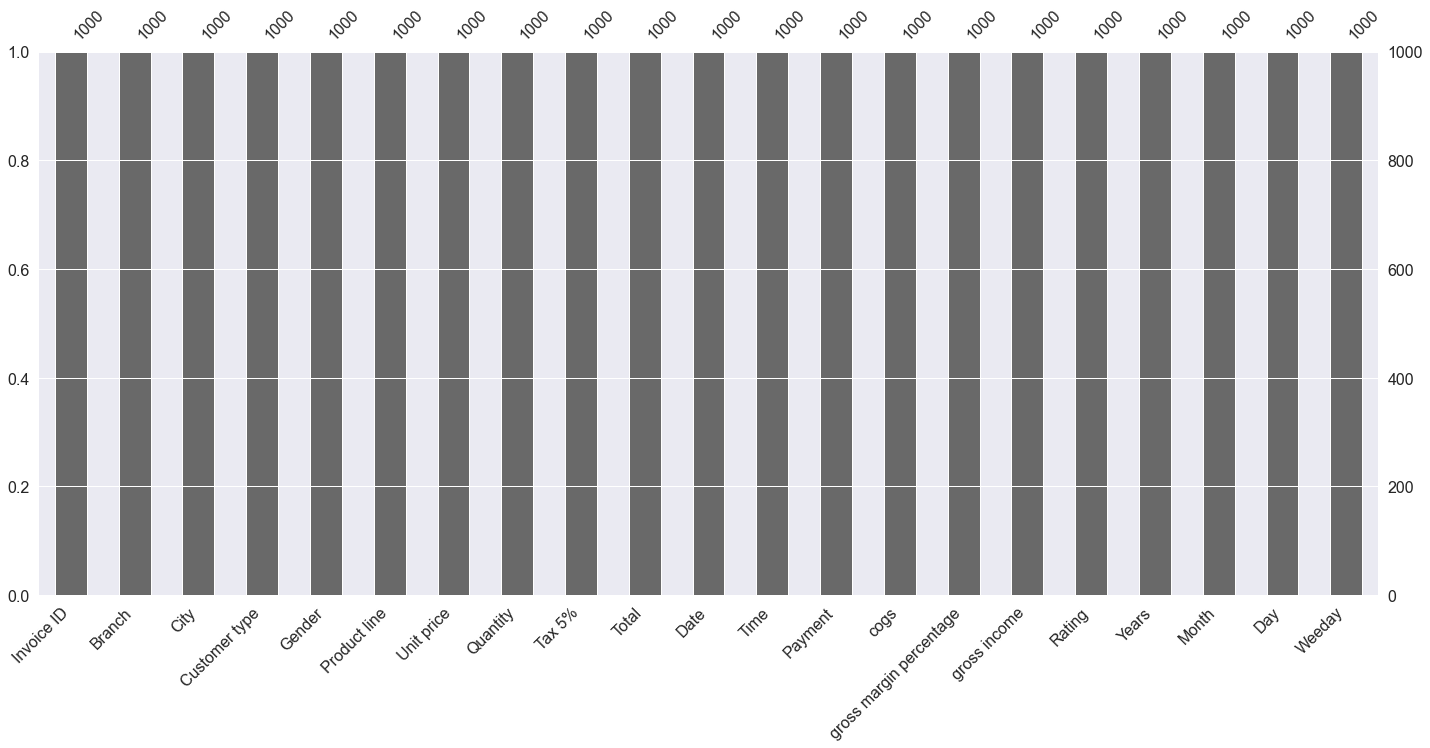

In [98]:
# Visualize missing data values ::
mno.bar(df)

* From the result above we can see that data not include Missing data values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

<AxesSubplot:ylabel='Unit price'>

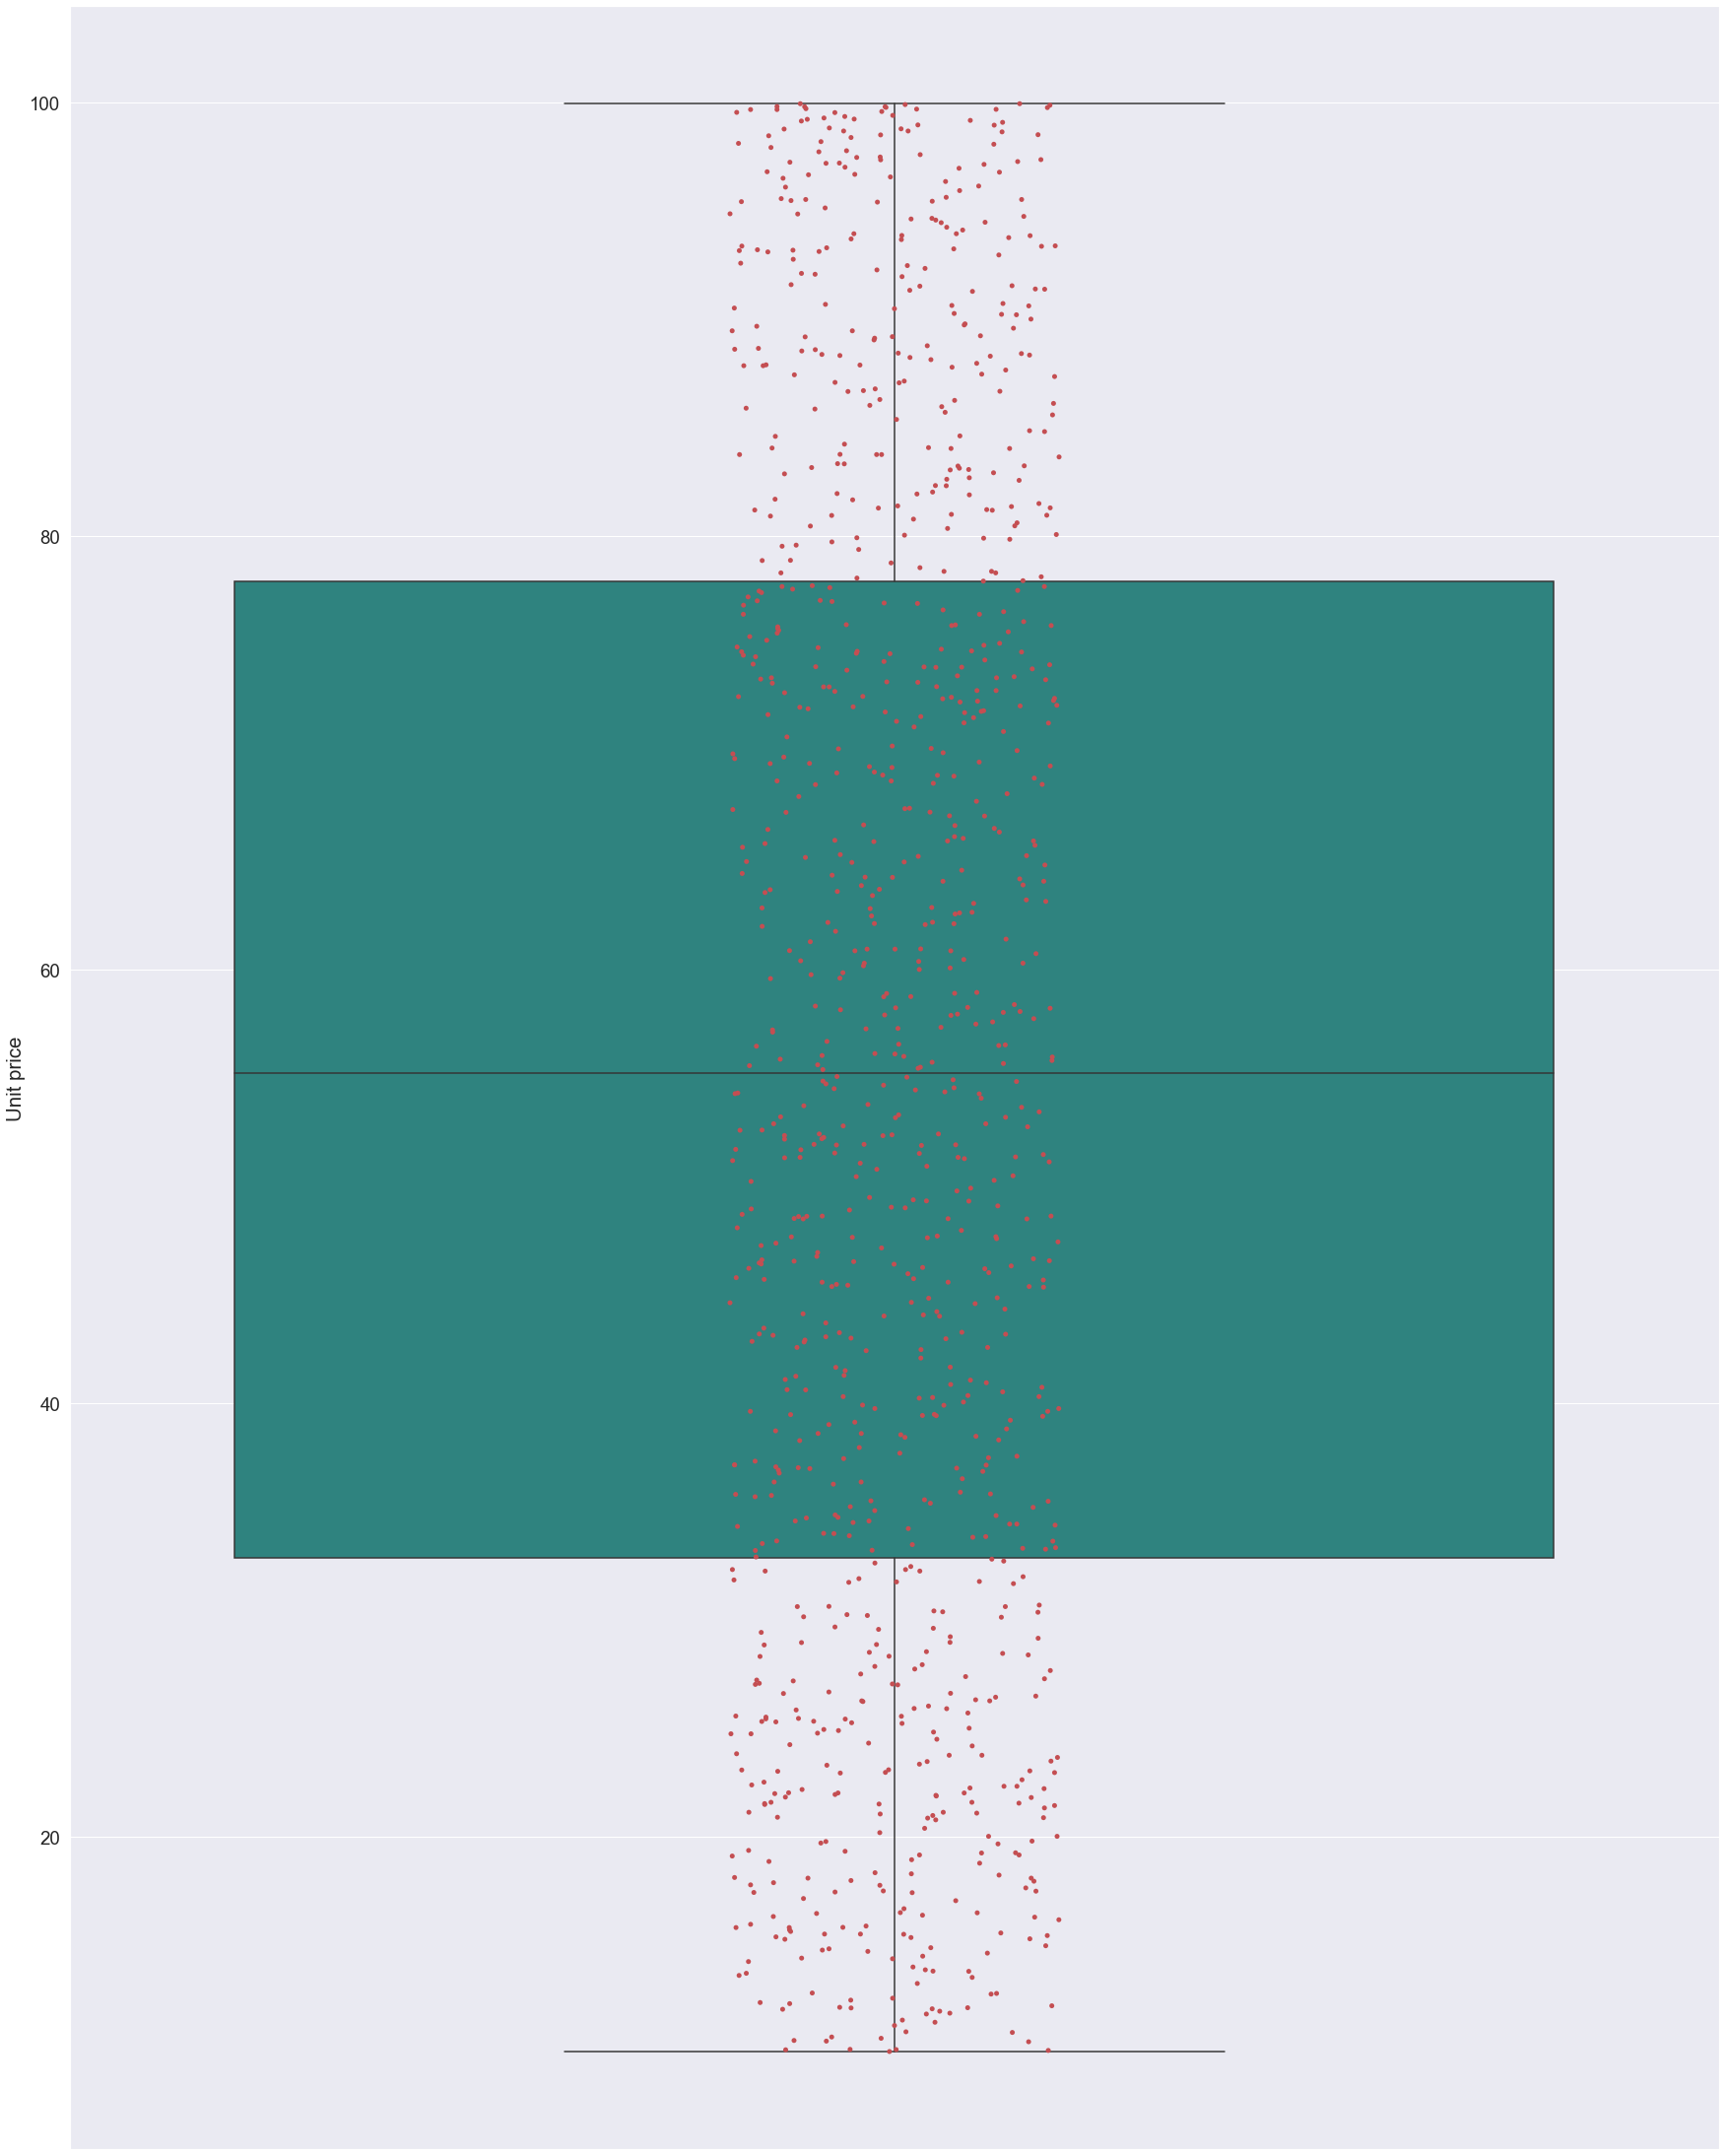

In [100]:
sns.set(rc = {"figure.figsize" : [30,40]} , font_scale = 1.7)
sns.boxplot  (y = "Unit price" , data = df , palette="viridis")
sns.stripplot(y = "Unit price" , data = df , color = "r")

<AxesSubplot:ylabel='Quantity'>

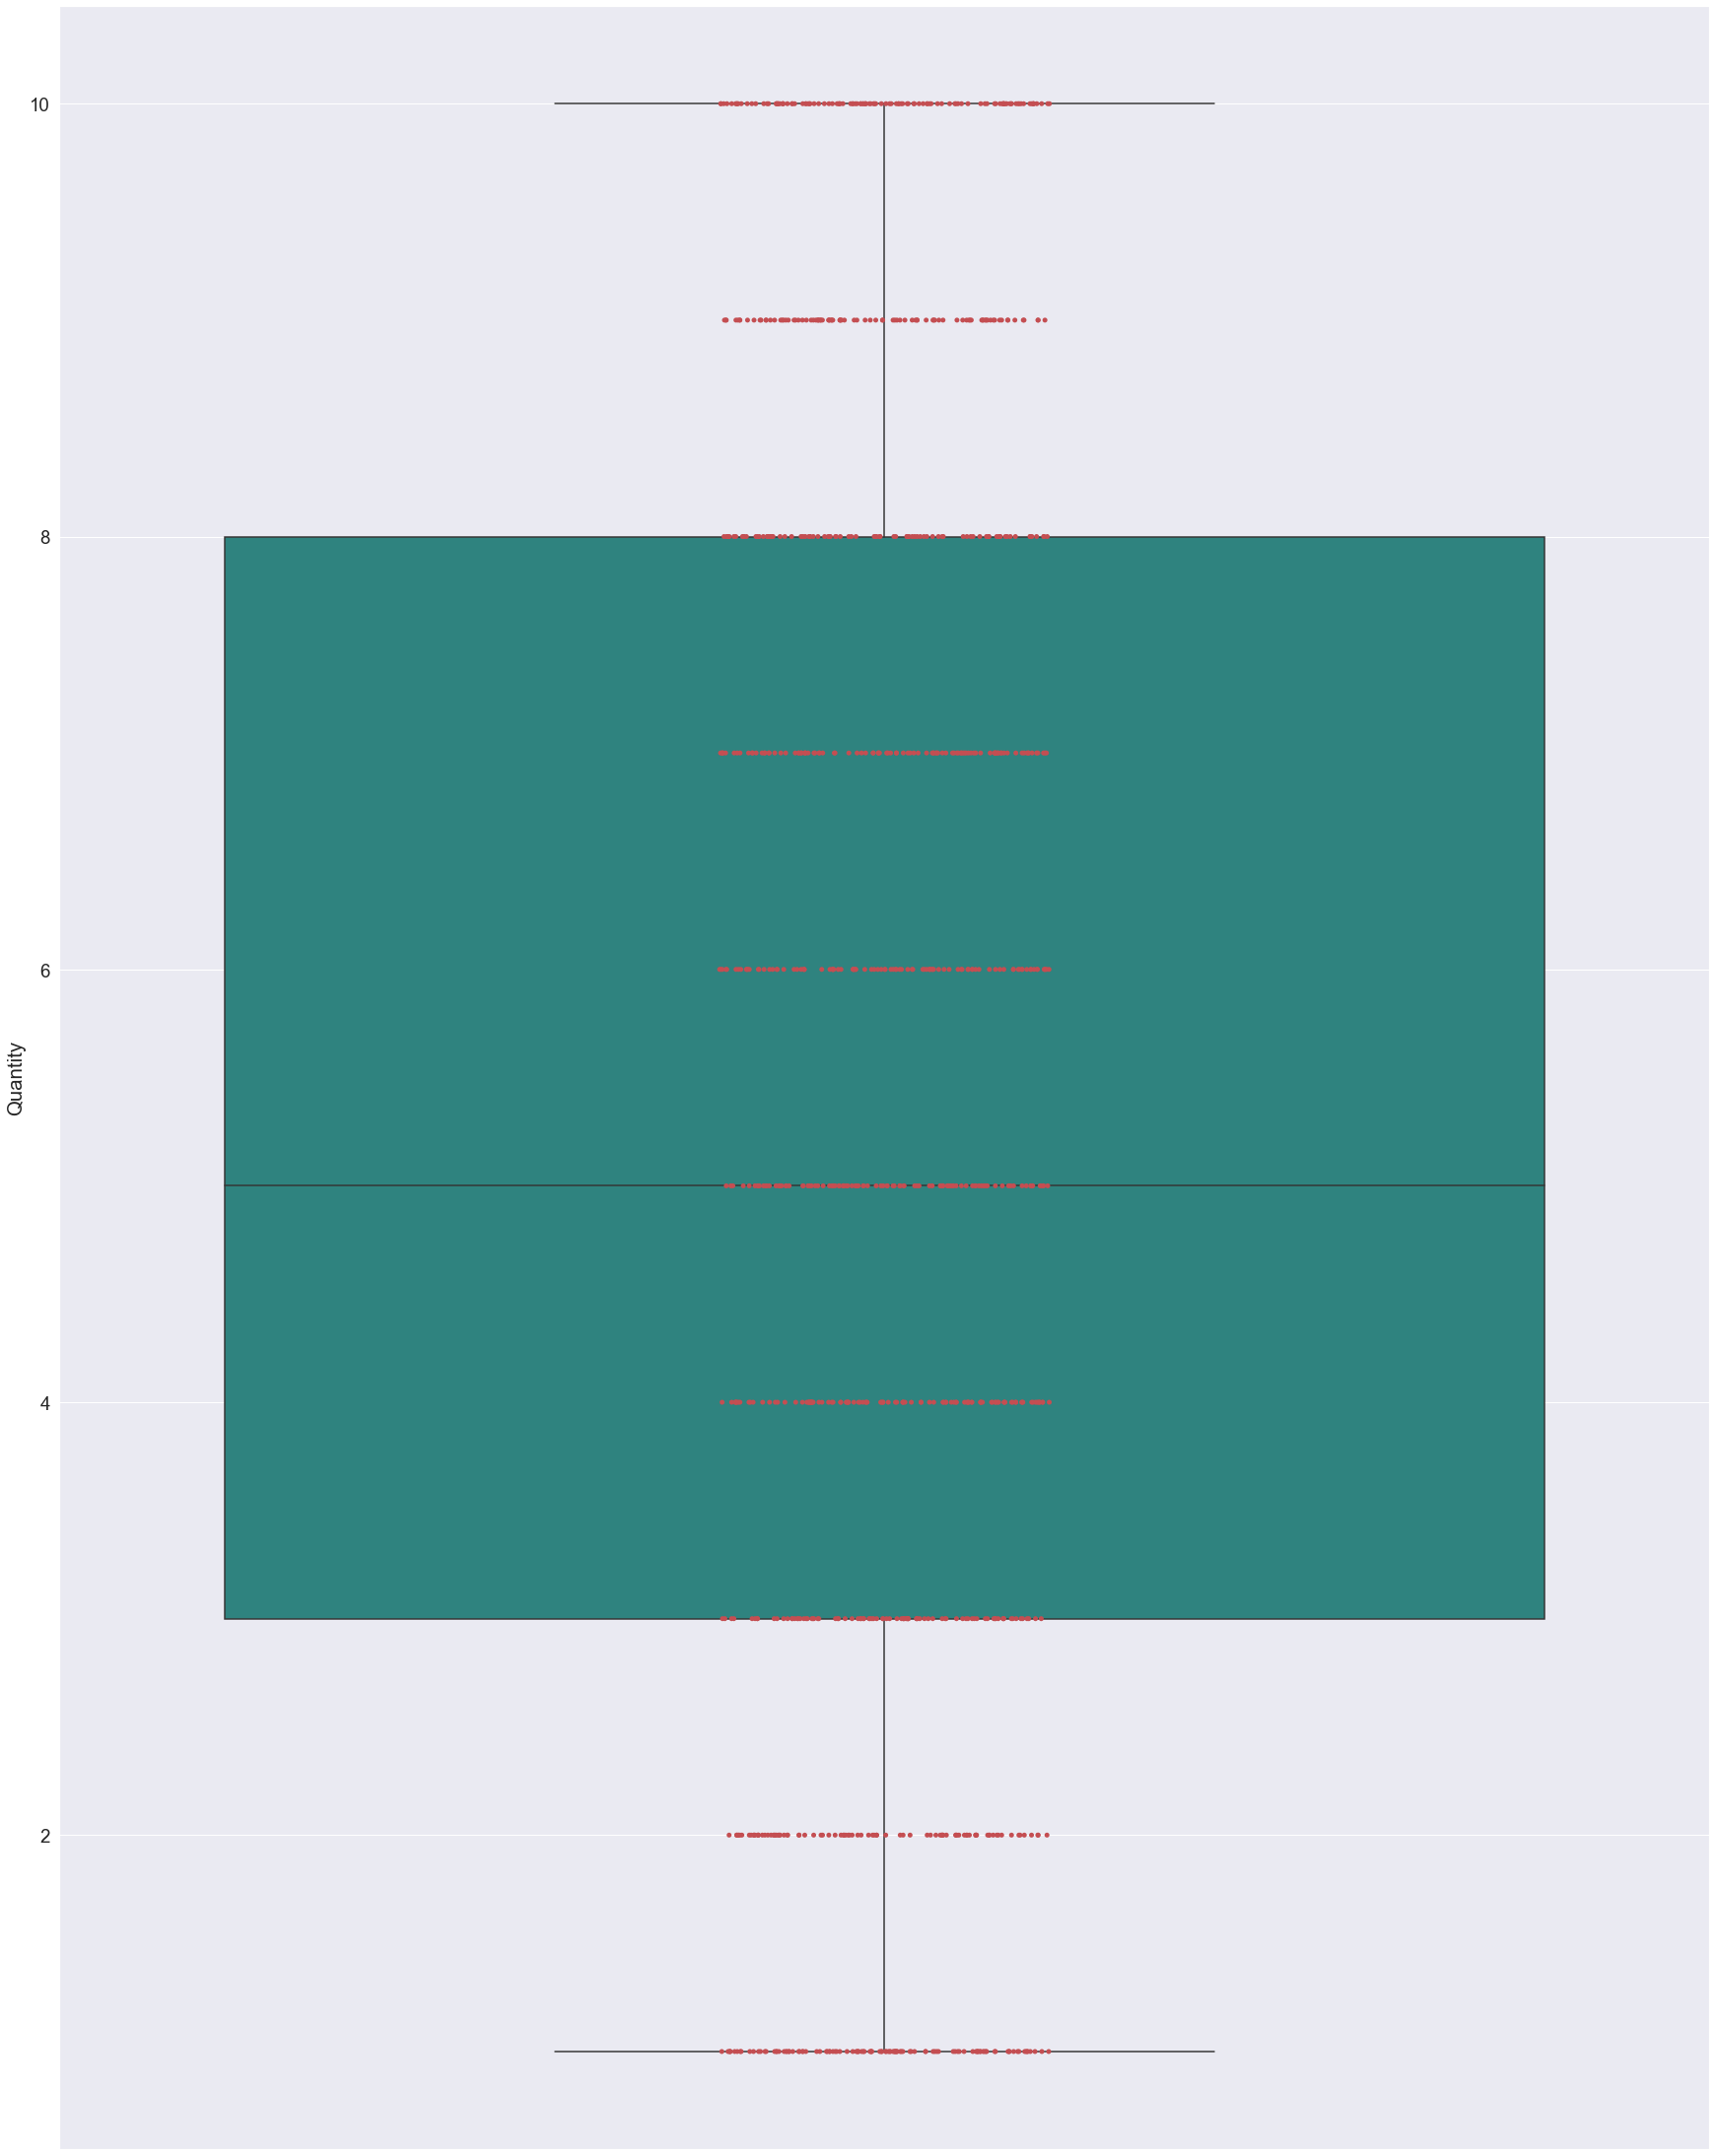

In [101]:
sns.boxplot  (y = "Quantity" , data = df , palette="viridis")
sns.stripplot(y = "Quantity" , data = df , color = "r")

<AxesSubplot:ylabel='Tax 5%'>

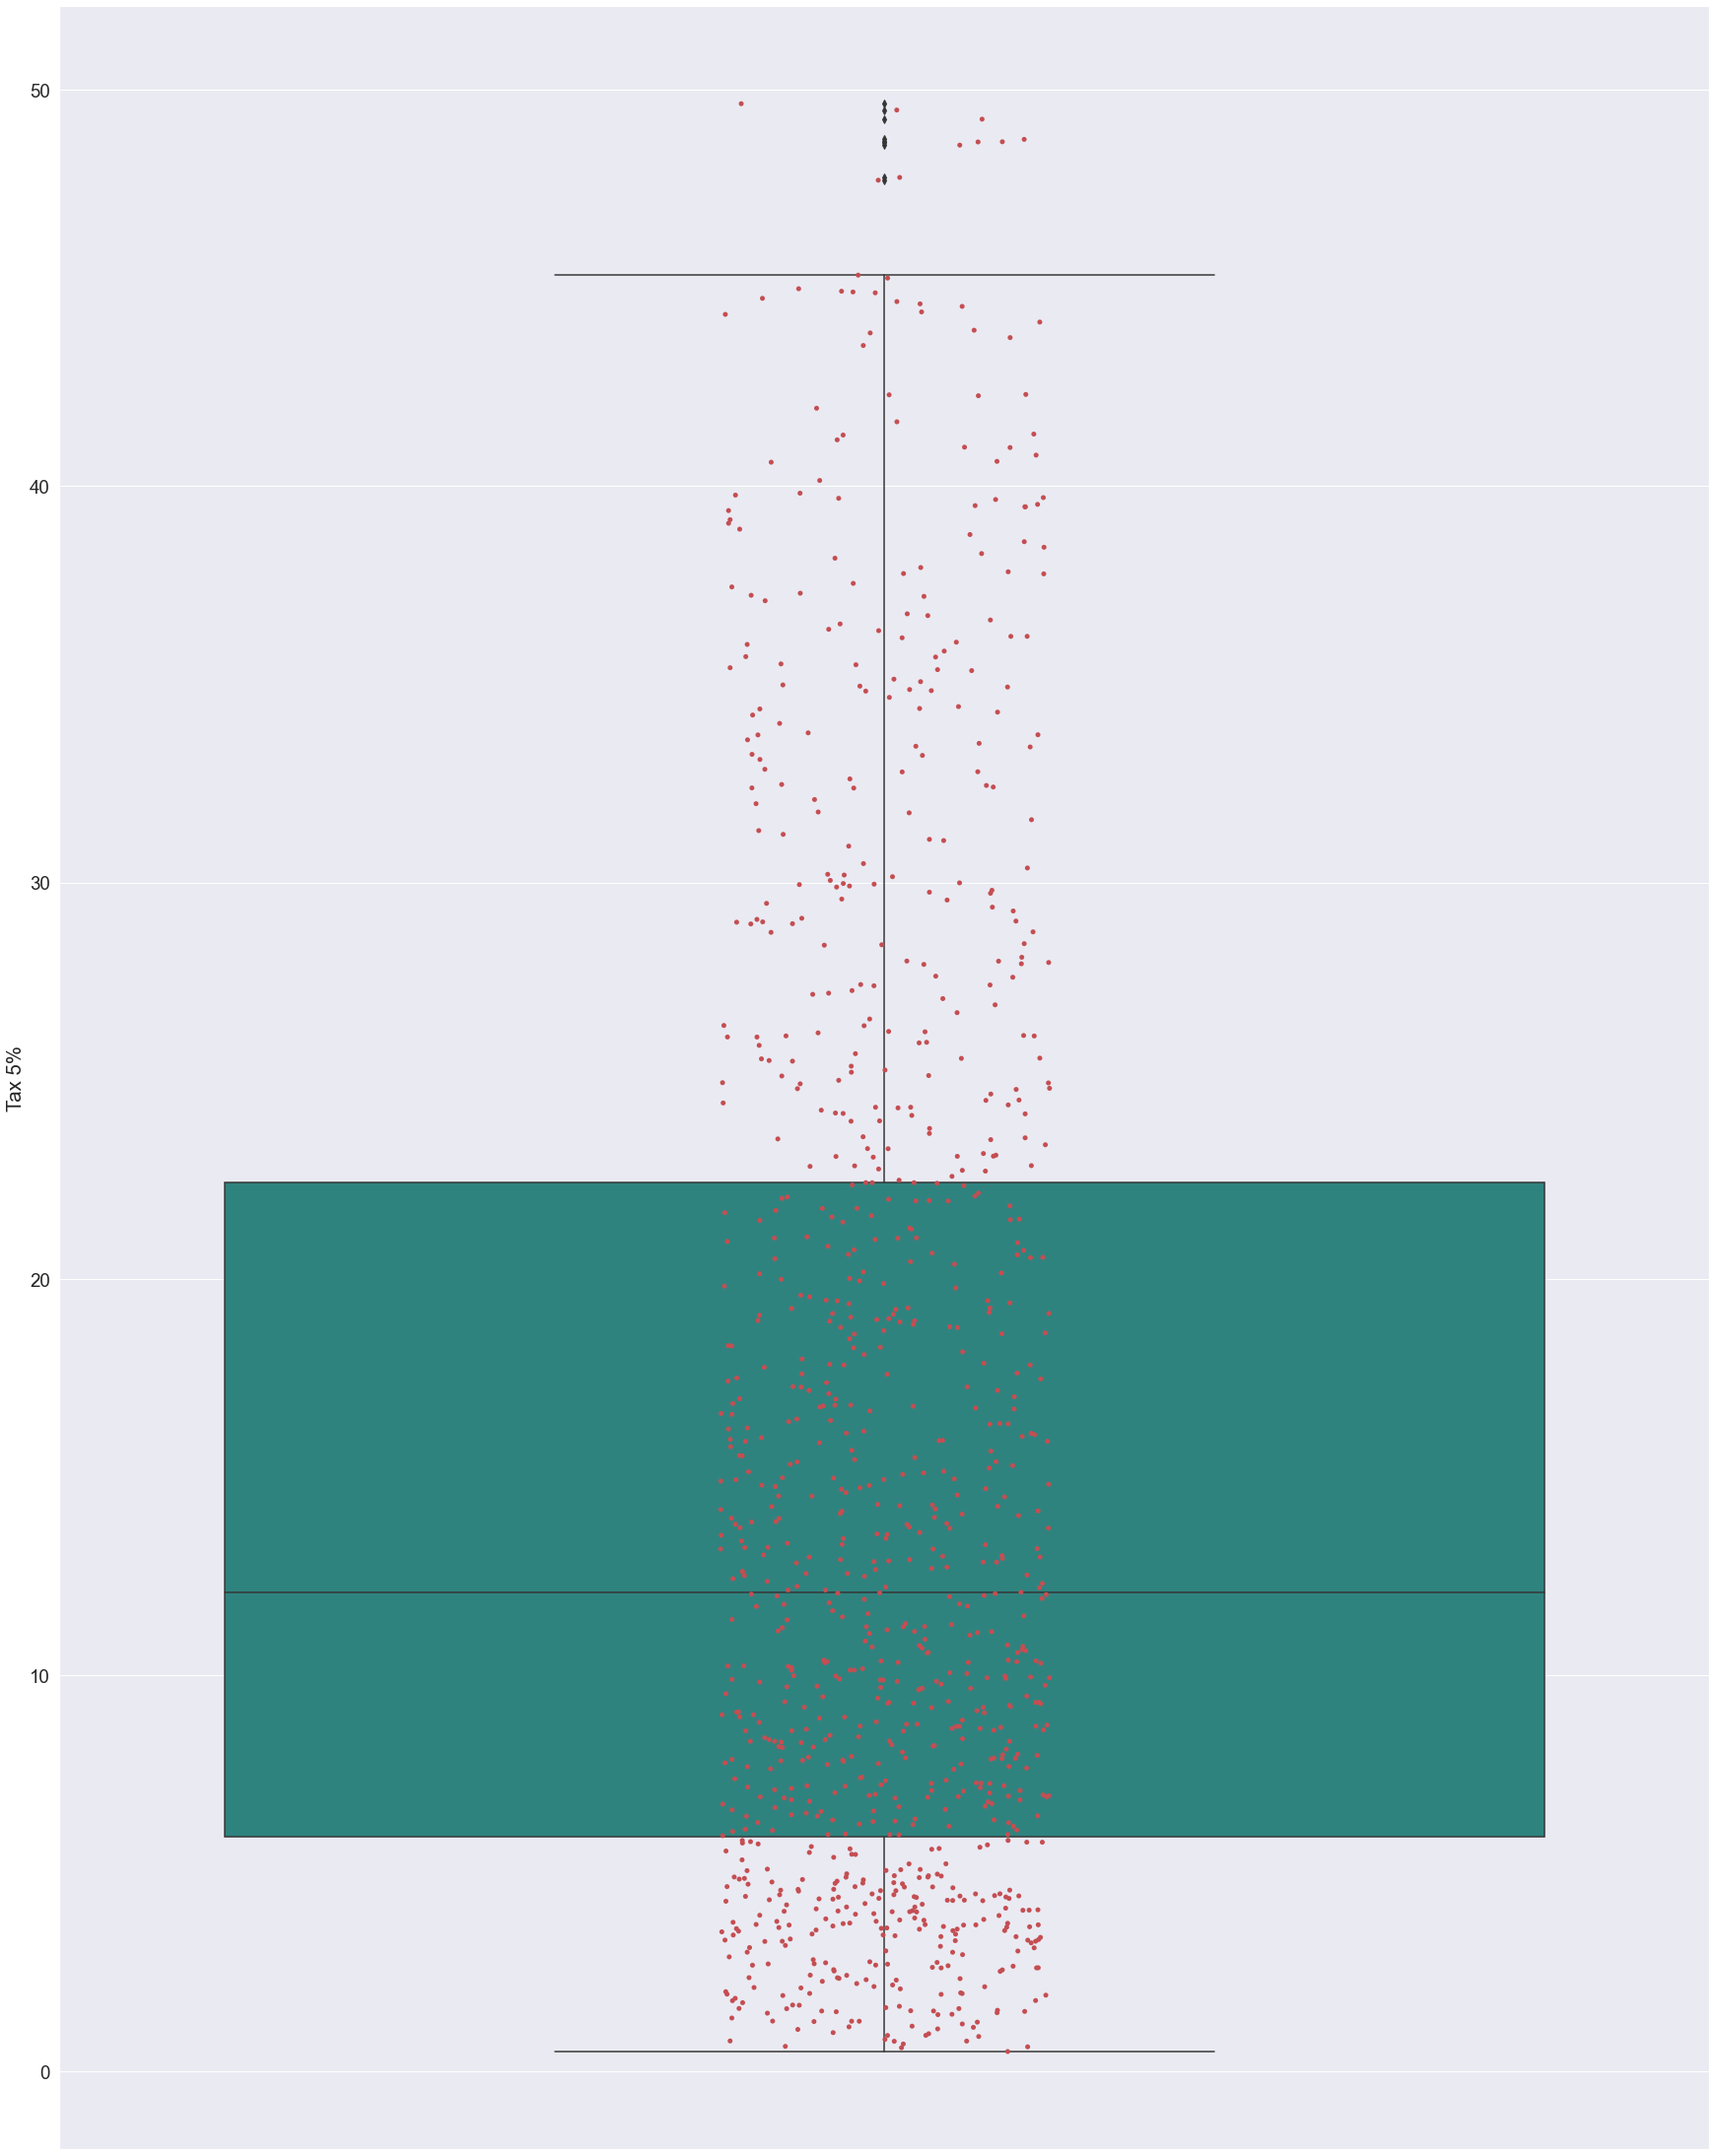

In [102]:
sns.boxplot  (y = "Tax 5%" , data = df , palette="viridis")
sns.stripplot(y = "Tax 5%" , data = df , color = "r")

<AxesSubplot:ylabel='Total'>

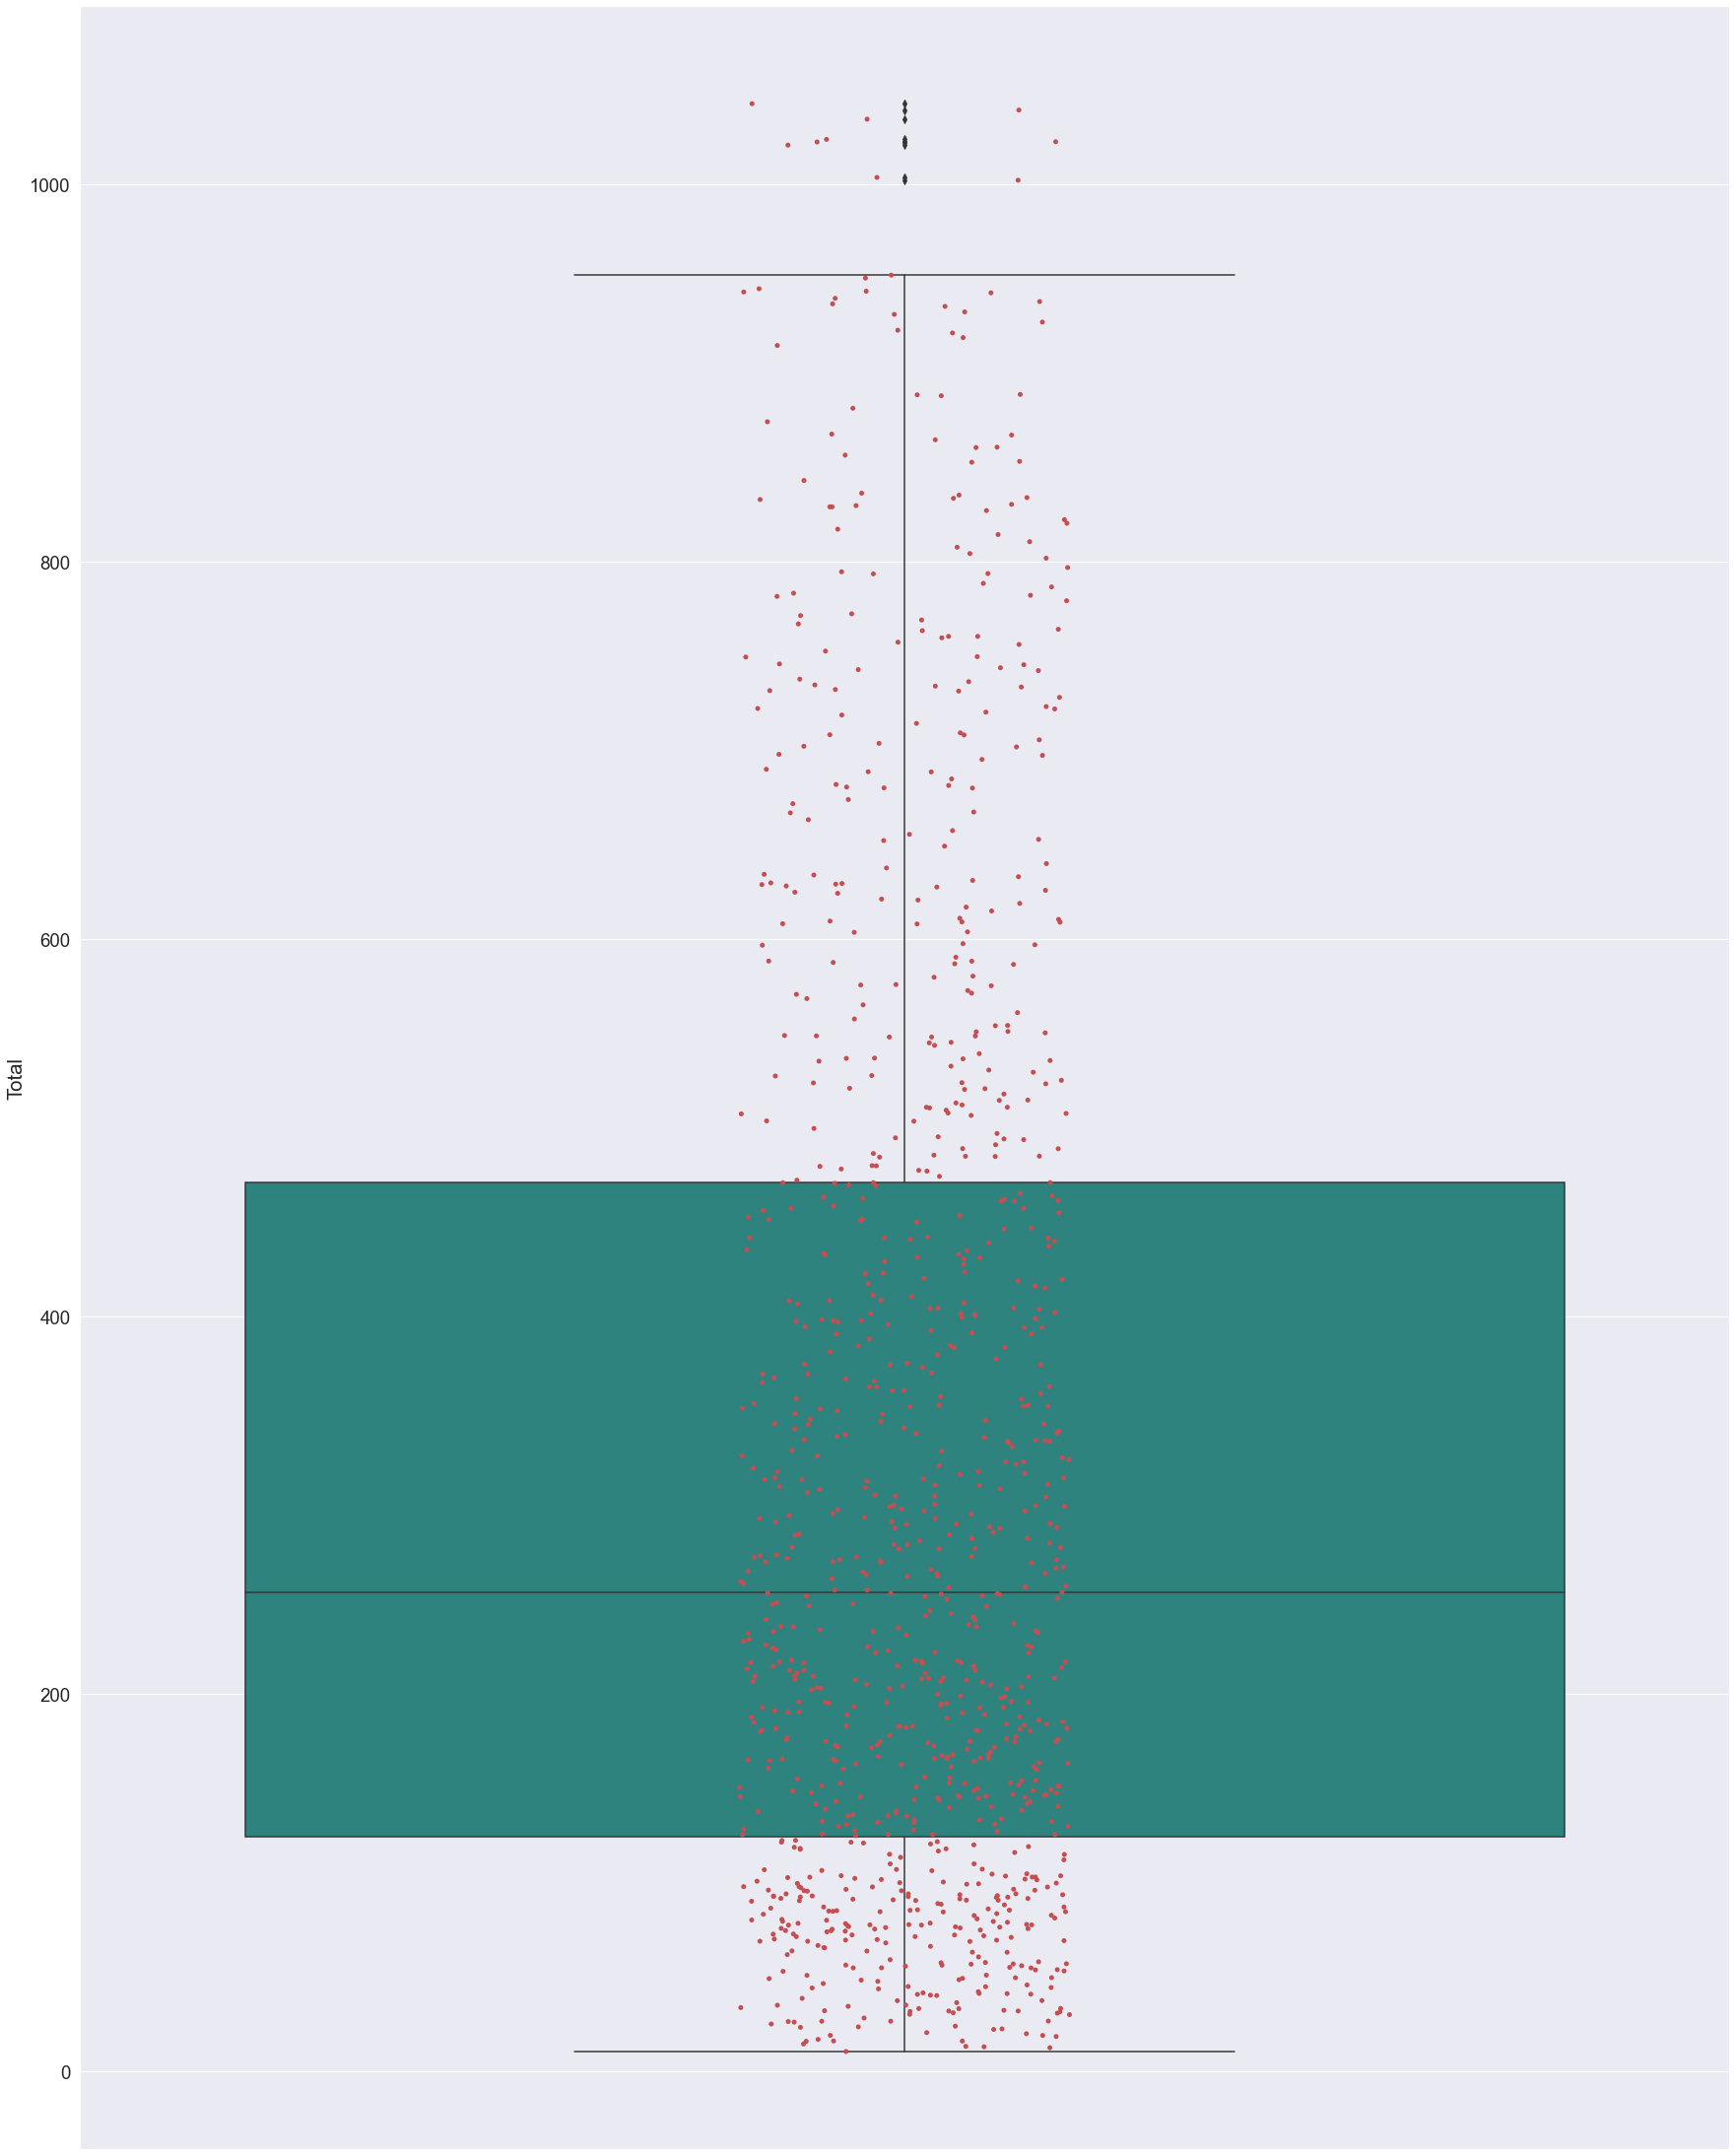

In [103]:
sns.boxplot  (y = "Total" , data = df , palette="viridis")
sns.stripplot(y = "Total" , data = df , color = "r")

<AxesSubplot:ylabel='cogs'>

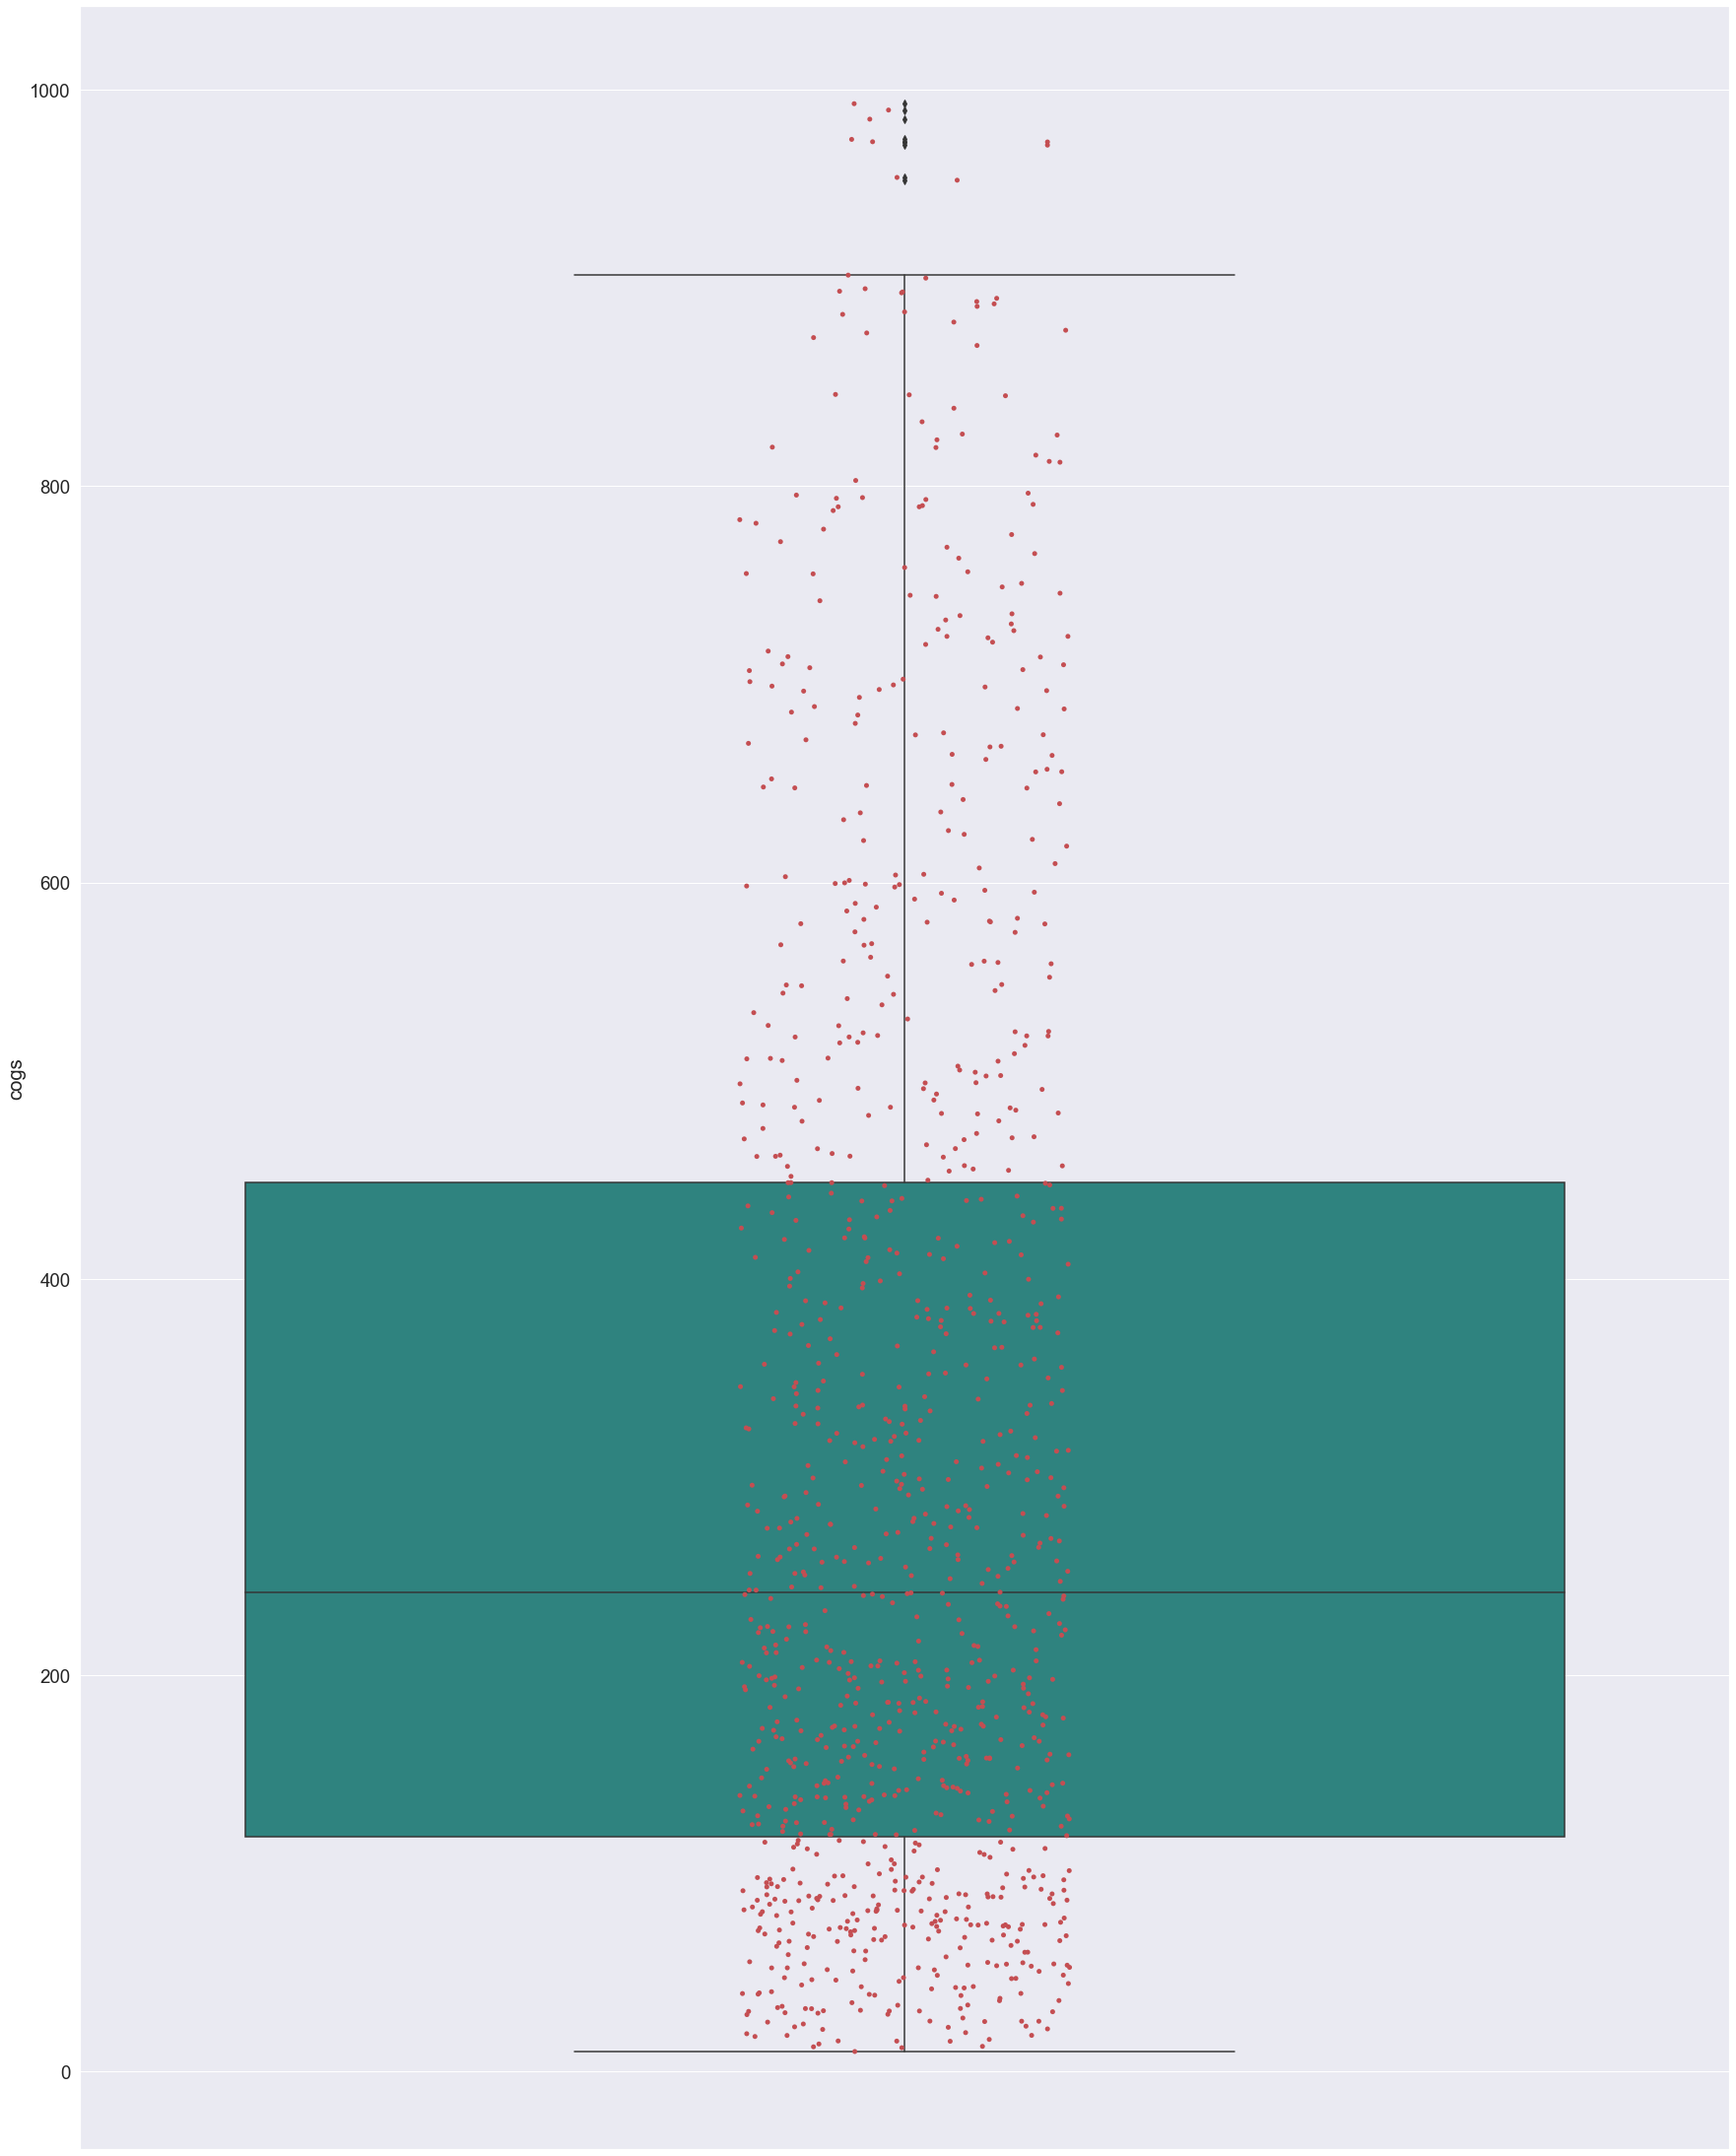

In [104]:
sns.boxplot  (y = "cogs" , data = df , palette="viridis")
sns.stripplot(y = "cogs" , data = df , color = "r")

<AxesSubplot:ylabel='gross margin percentage'>

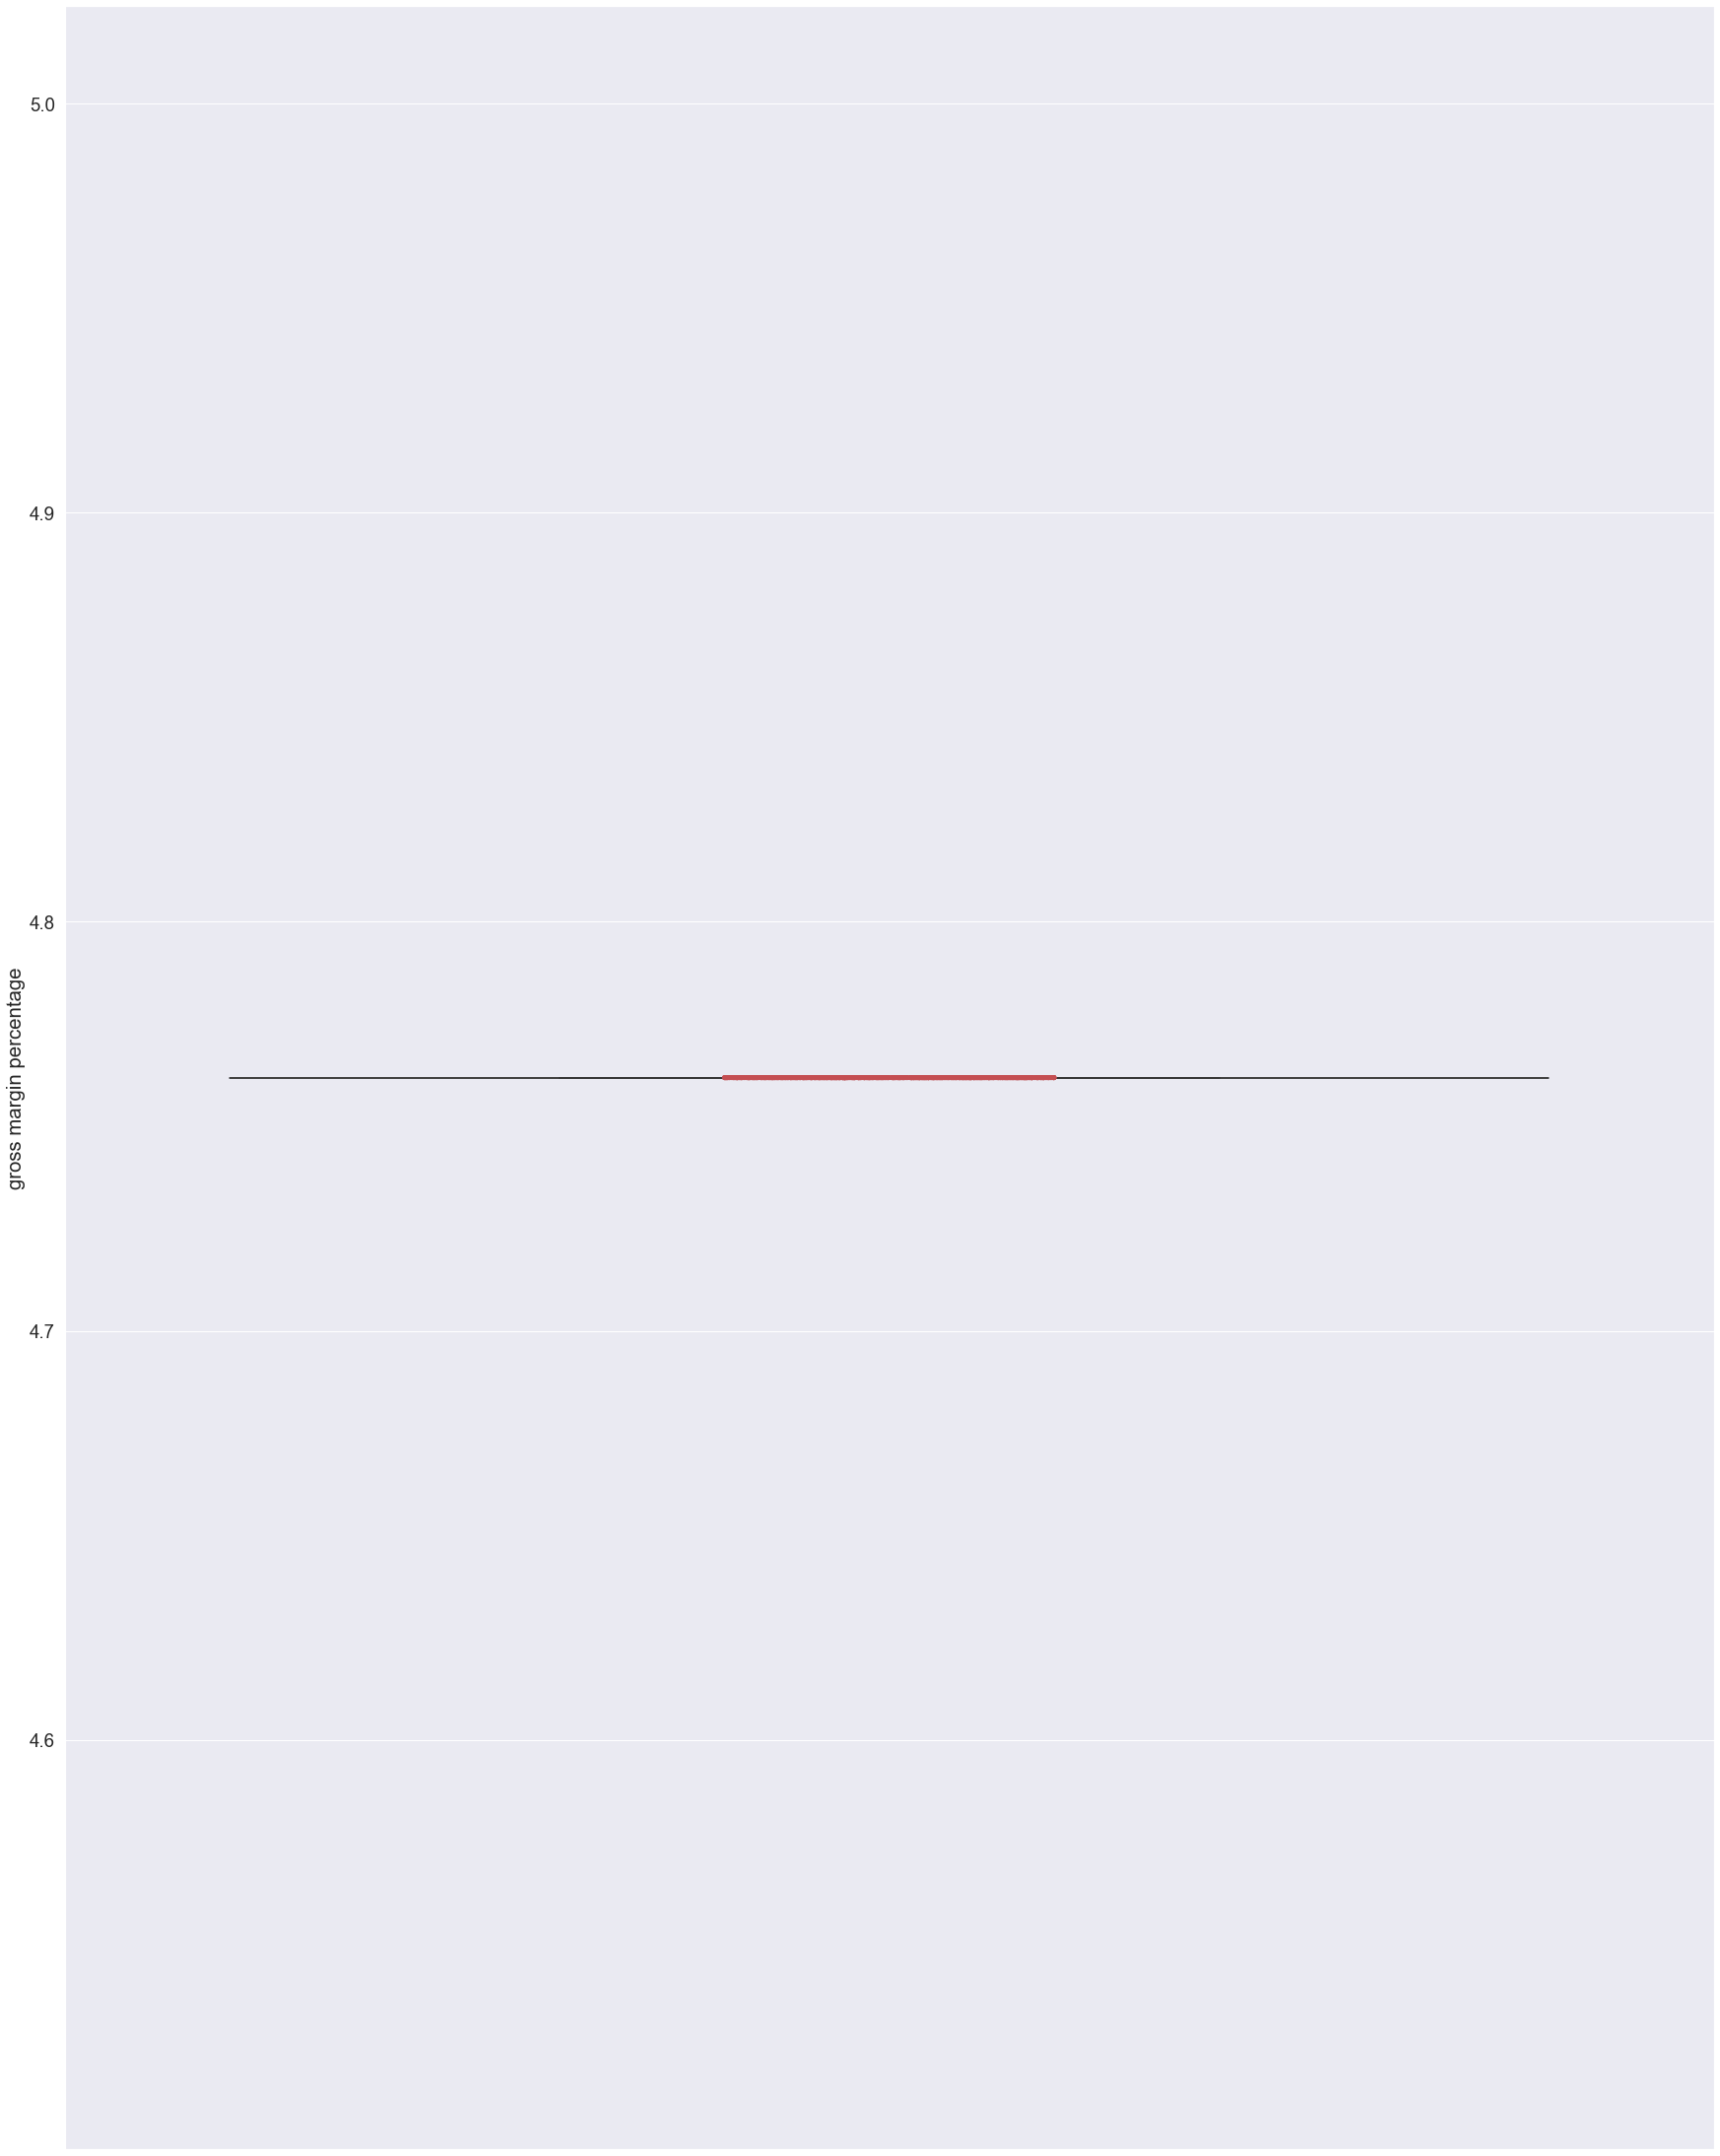

In [105]:
sns.boxplot  (y = "gross margin percentage" , data = df , palette="viridis")
sns.stripplot(y = "gross margin percentage" , data = df , color = "r")

<AxesSubplot:ylabel='gross income'>

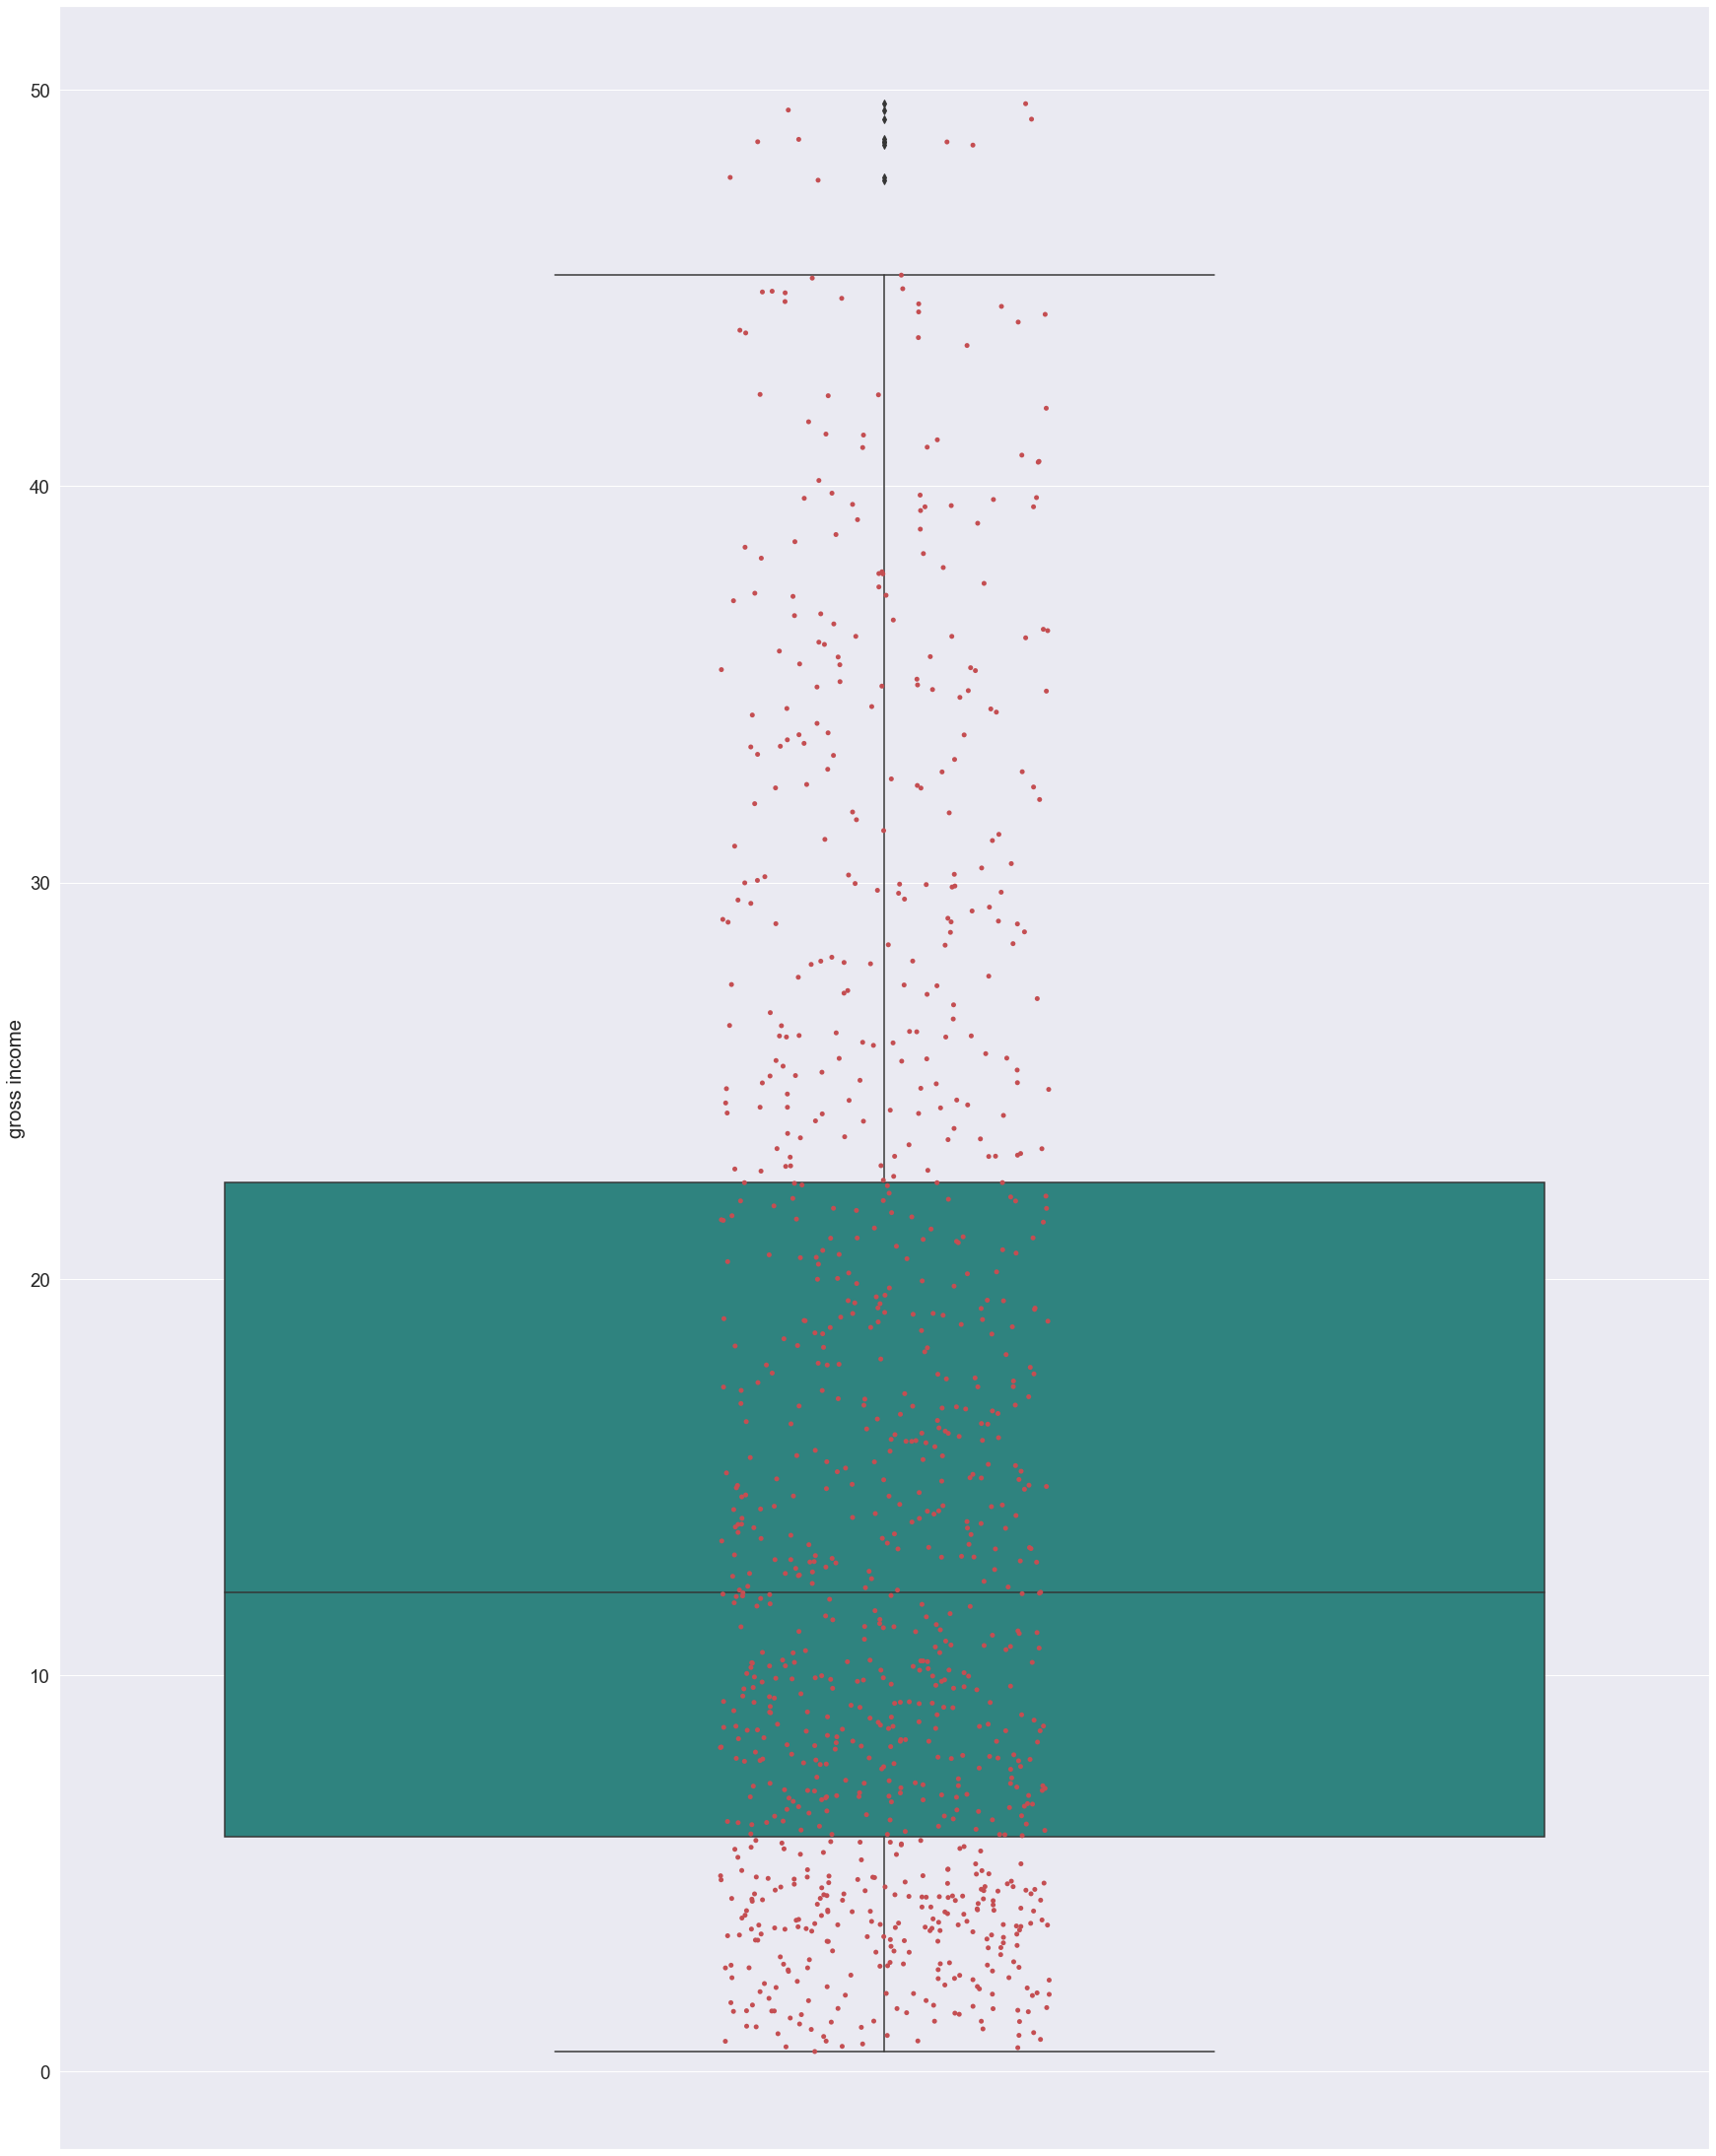

In [106]:
sns.boxplot  (y = "gross income" , data = df , palette="viridis")
sns.stripplot(y = "gross income" , data = df , color = "r")

<AxesSubplot:ylabel='Rating'>

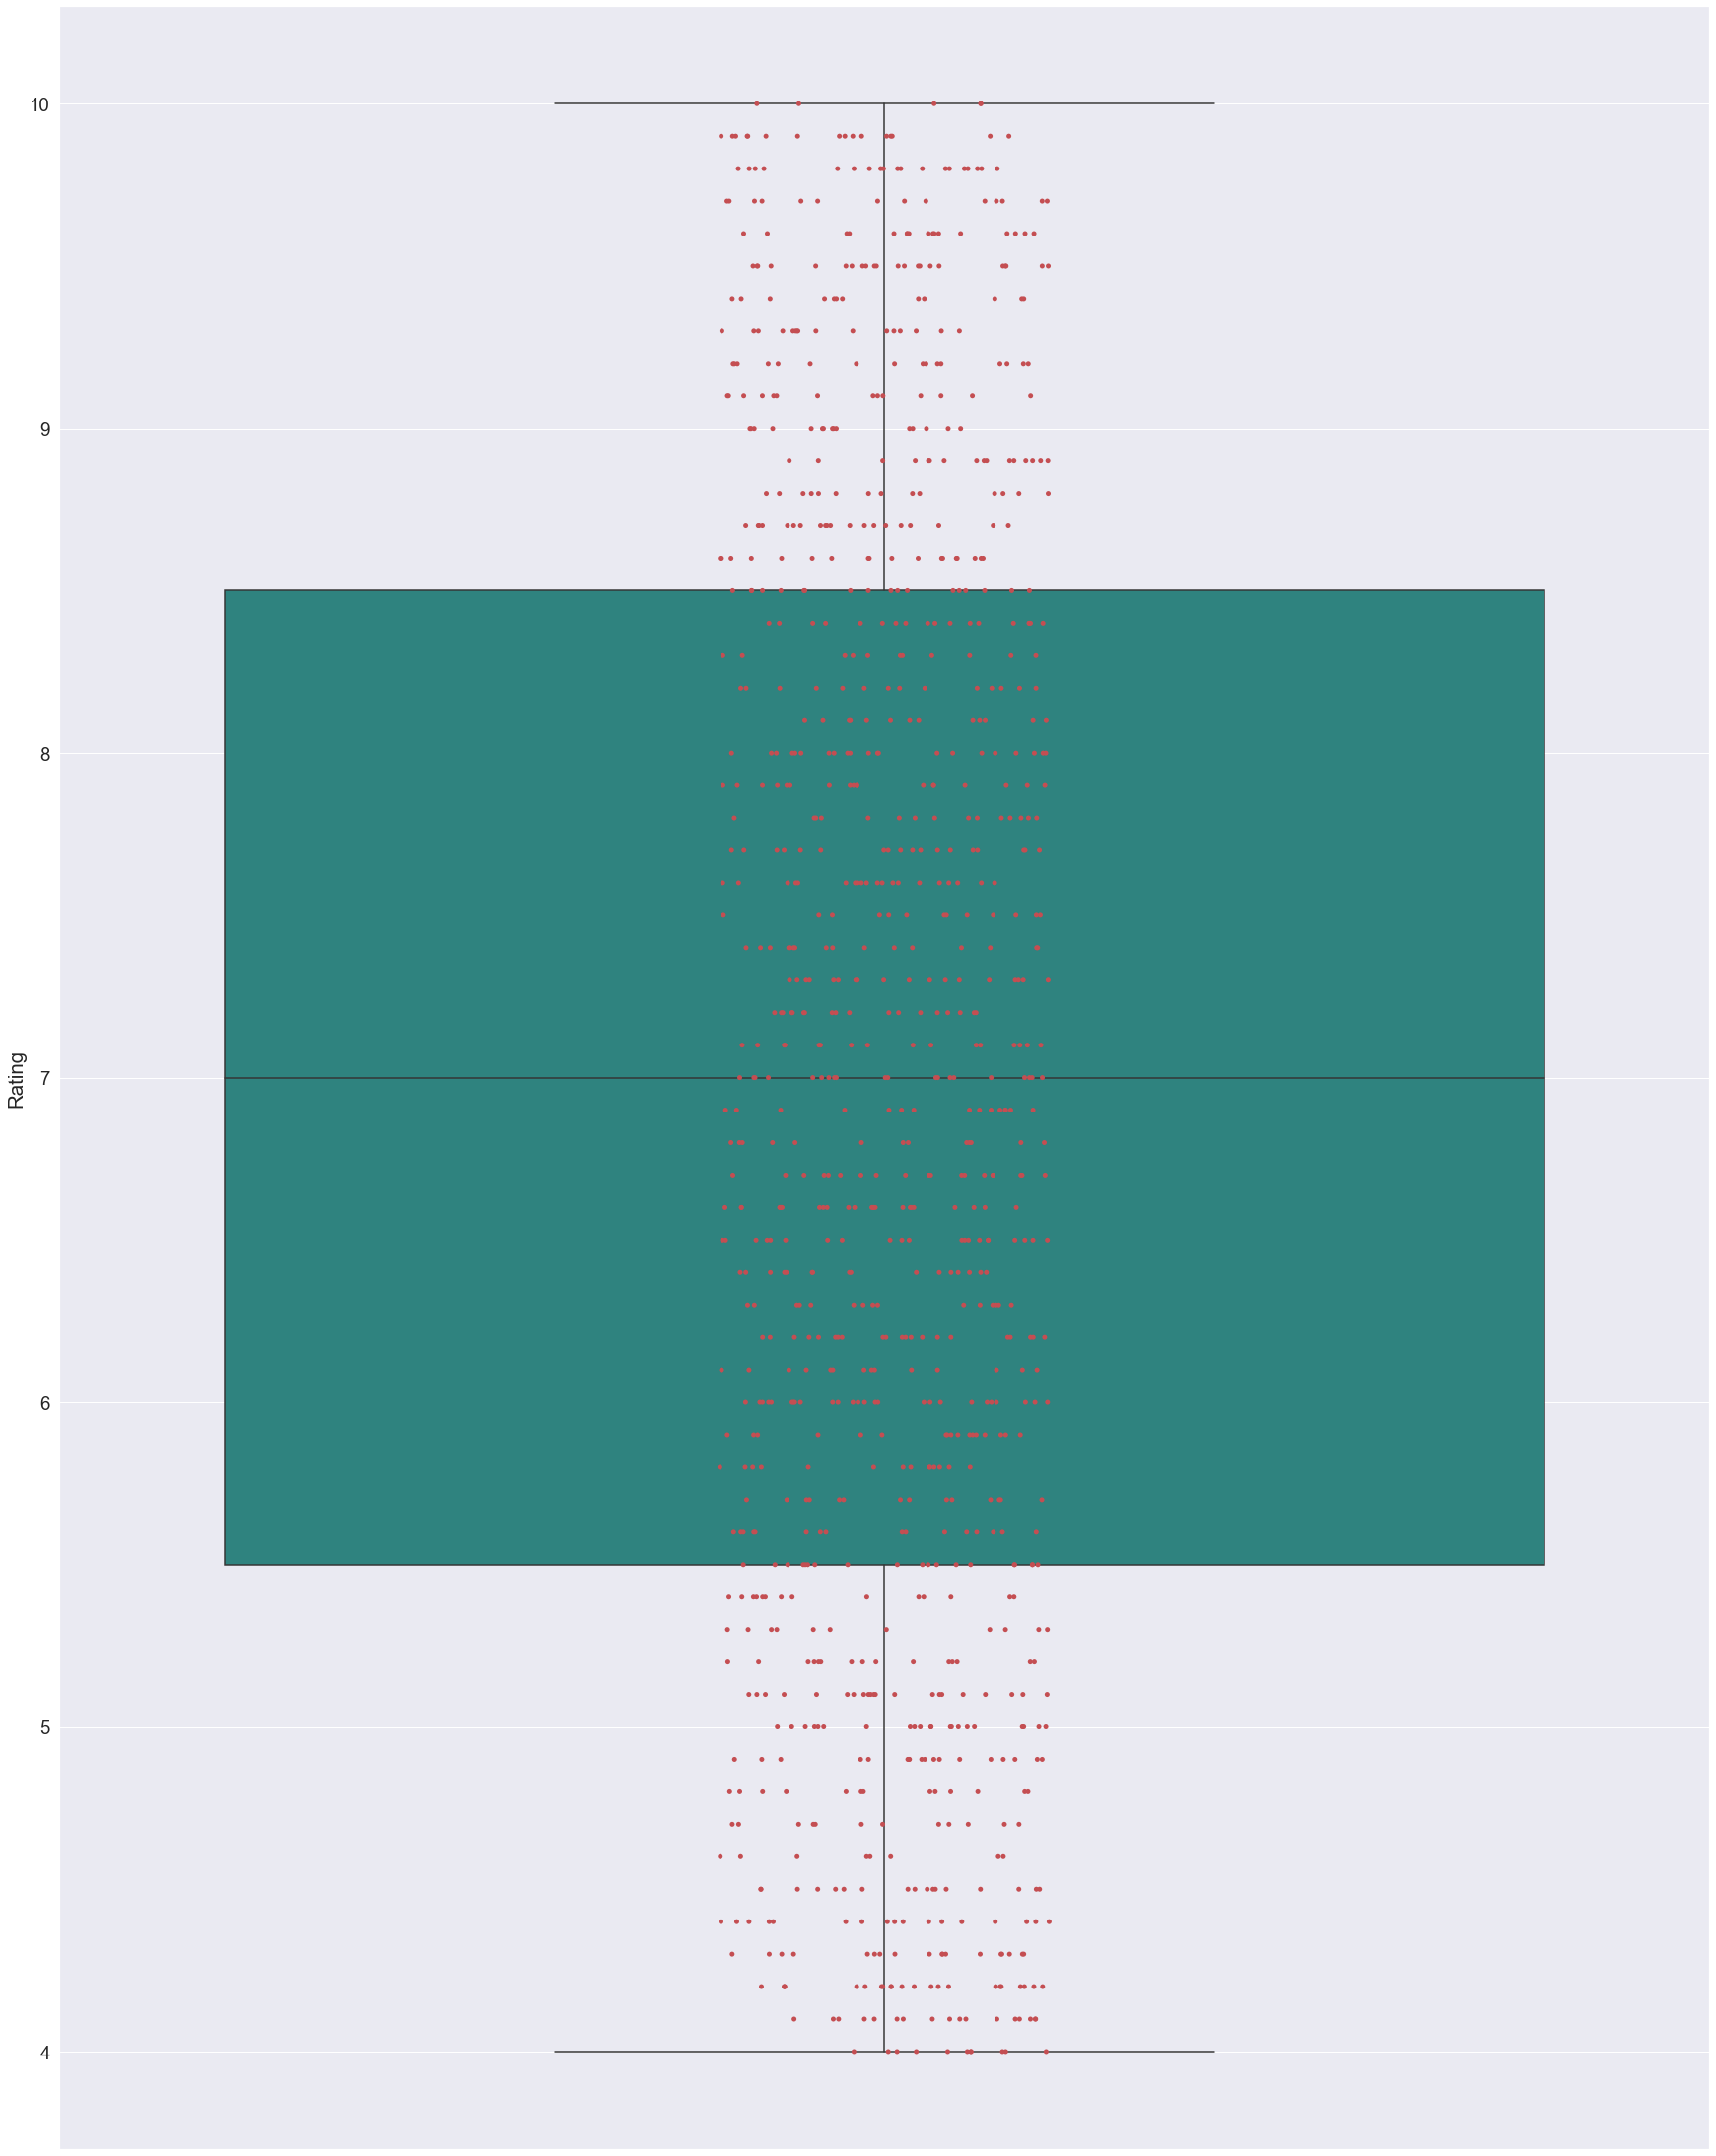

In [107]:
sns.boxplot  (y = "Rating" , data = df , palette="viridis")
sns.stripplot(y = "Rating" , data = df , color = "r")

* From the result above we can see tha data not include outliers data values

<AxesSubplot:>

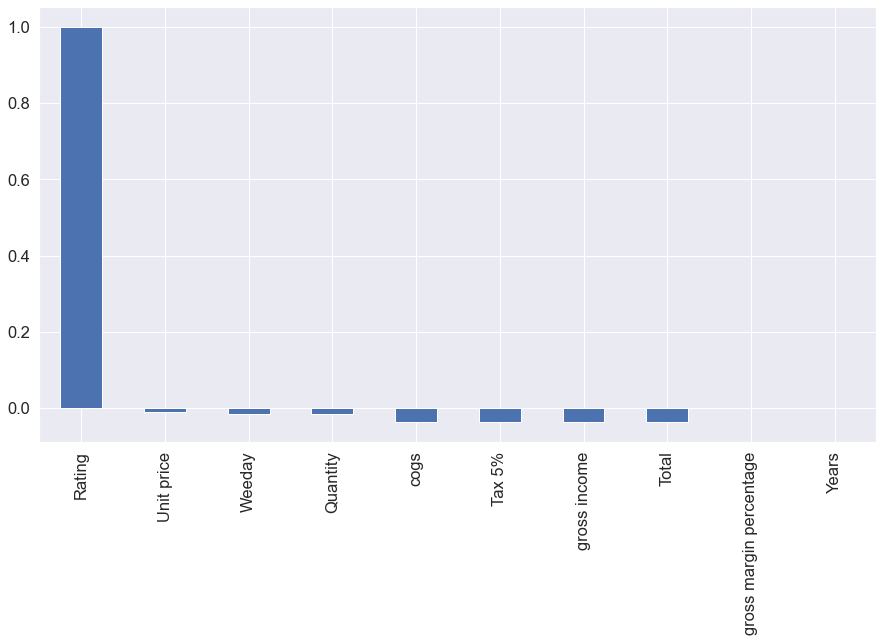

In [108]:
#Get Correlation of "Churn" with other variables:
sns.set( rc = {"figure.figsize" : [30 , 20]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['Rating'].sort_values(ascending = False).plot(kind='bar'  )

<p id = "Prepration">Data-Prepration</p>

In [109]:
df.drop(["Invoice ID" , "Date" , "Time" , "Years" , "Month" ,"Day" , "Weeday"] , axis=1 , inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

In [111]:
df = pd.get_dummies(df , drop_first=True)
df

Unit price  Quantity   Tax 5%      Total    cogs  \
0         74.69         7  26.1415   548.9715  522.83   
1         15.28         5   3.8200    80.2200   76.40   
2         46.33         7  16.2155   340.5255  324.31   
3         58.22         8  23.2880   489.0480  465.76   
4         86.31         7  30.2085   634.3785  604.17   
..          ...       ...      ...        ...     ...   
995       40.35         1   2.0175    42.3675   40.35   
996       97.38        10  48.6900  1022.4900  973.80   
997       31.84         1   1.5920    33.4320   31.84   
998       65.82         1   3.2910    69.1110   65.82   
999       88.34         7  30.9190   649.2990  618.38   

     gross margin percentage  gross income  Rating  Branch_B  Branch_C  ...  \
0                   4.761905       26.1415     9.1         0         0  ...   
1                   4.761905        3.8200     9.6         0         1  ...   
2                   4.761905       16.2155     7.4         0         0  ...   
3                   4.761905       23.2880     8.4         0         0  ...   
4                   4.761905       30.2085     5.3         0         0  ...   
..                       ...           ...     ...       ...       ...  ...   
995                 4.761905        2.0175     6.2         0         1  ...   
996                 4.761905       48.6900     4.4         1         0  ...   
997                 4.761905        1.5920     7.7         0         0  ...   
998                 4.761905        3.2910     4.1         0         0  ...   
999                 4.761905       30.9190     6.6         0         0  ...   

     City_Yangon  Customer type_Normal  Gender_Male  \
0              1                     0            0   
1              0                     1            0   
2              1                     1            1   
3              1                     0            1   
4              1                     1            1   
..           ...                   ...          ...   
995            0                     1            1   
996            0                     1            0   
997            1                     0            1   
998            1                     1            1   
999            1                     0            0   

     Product line_Fashion accessories  Product line_Food and beverages  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
..                                ...                              ...   
995                                 0                                0   
996                                 0                                0   
997                                 0                                1   
998                                 0                                0   
999                                 1                                0   

     Product line_Health and beauty  Product line_Home and lifestyle  \
0                                 1                                0   
1                                 0                                0   
2                                 0                                1   
3                                 1                                0   
4                                 0                                0   
..                              ...                              ...   
995                               1                                0   
996                               0                                1   
997                               0                                0   
998                               0                                1   
999                          

In [112]:
df.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Branch_B',
       'Branch_C', 'City_Naypyitaw', 'City_Yangon', 'Customer type_Normal',
       'Gender_Male', 'Product line_Fashion accessories',
       'Product line_Food and beverages', 'Product line_Health and beauty',
       'Product line_Home and lifestyle', 'Product line_Sports and travel',
       'Payment_Credit card', 'Payment_Ewallet'],
      dtype='object')

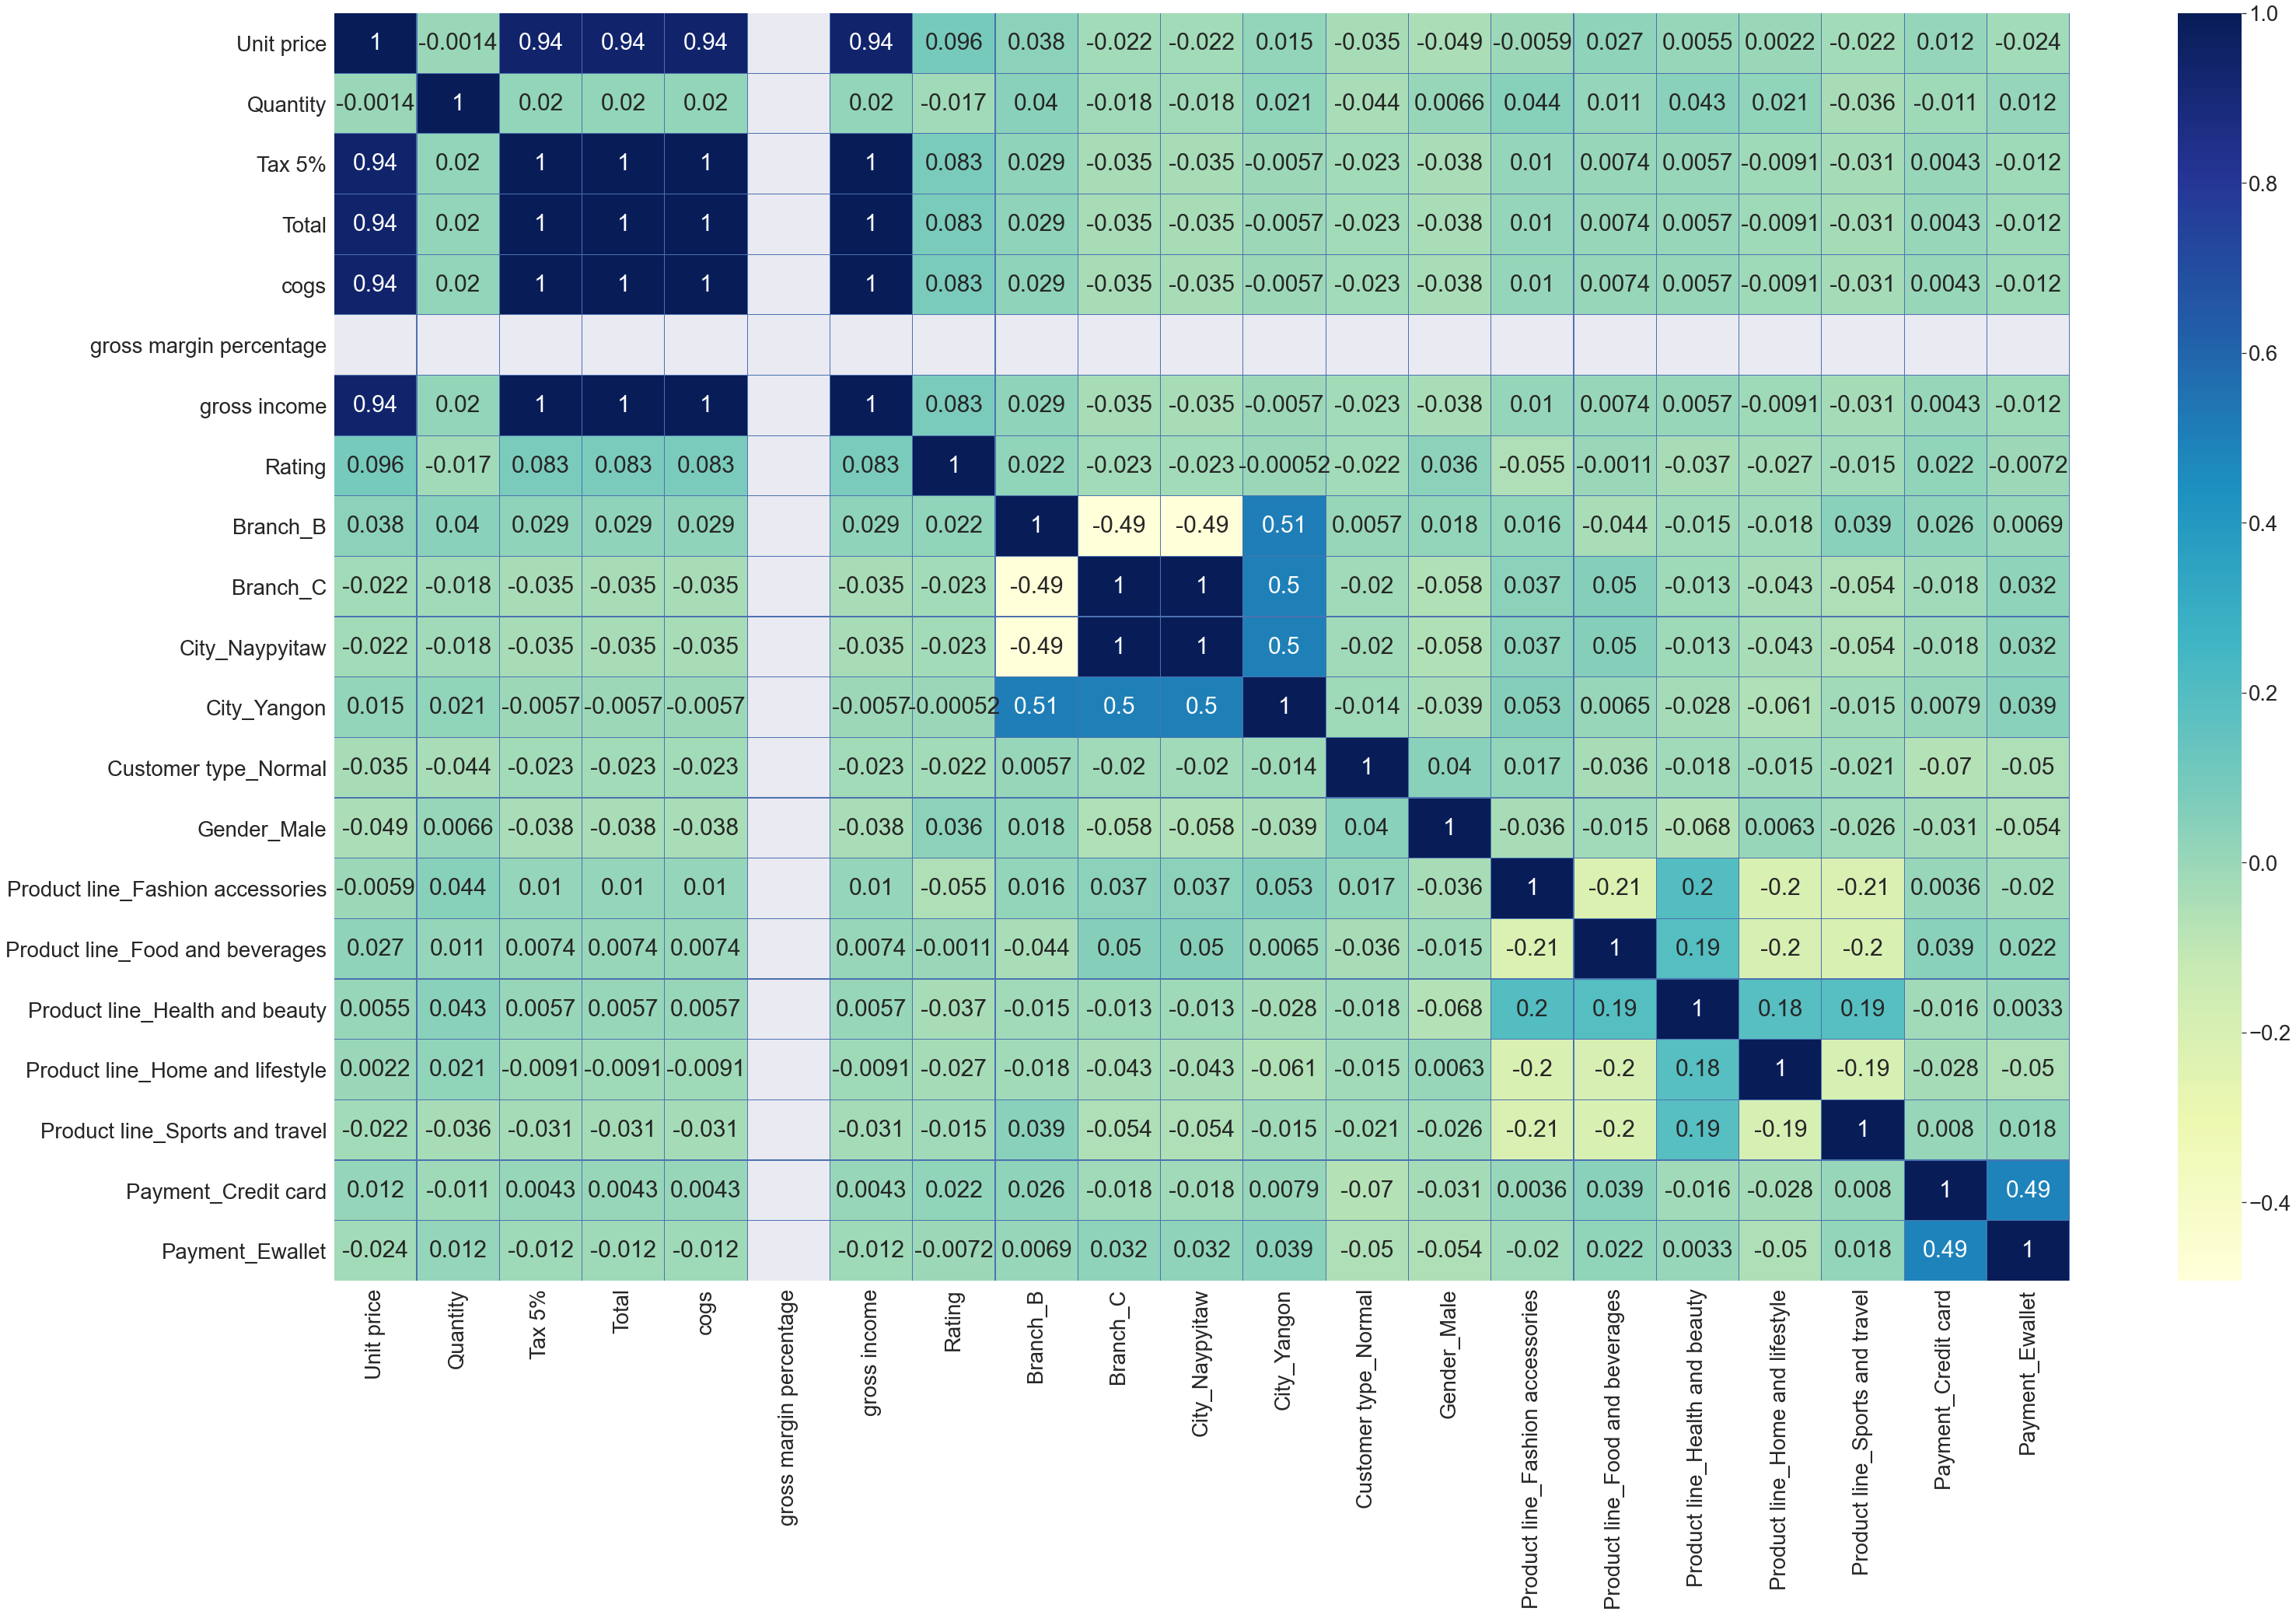

In [113]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=2.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

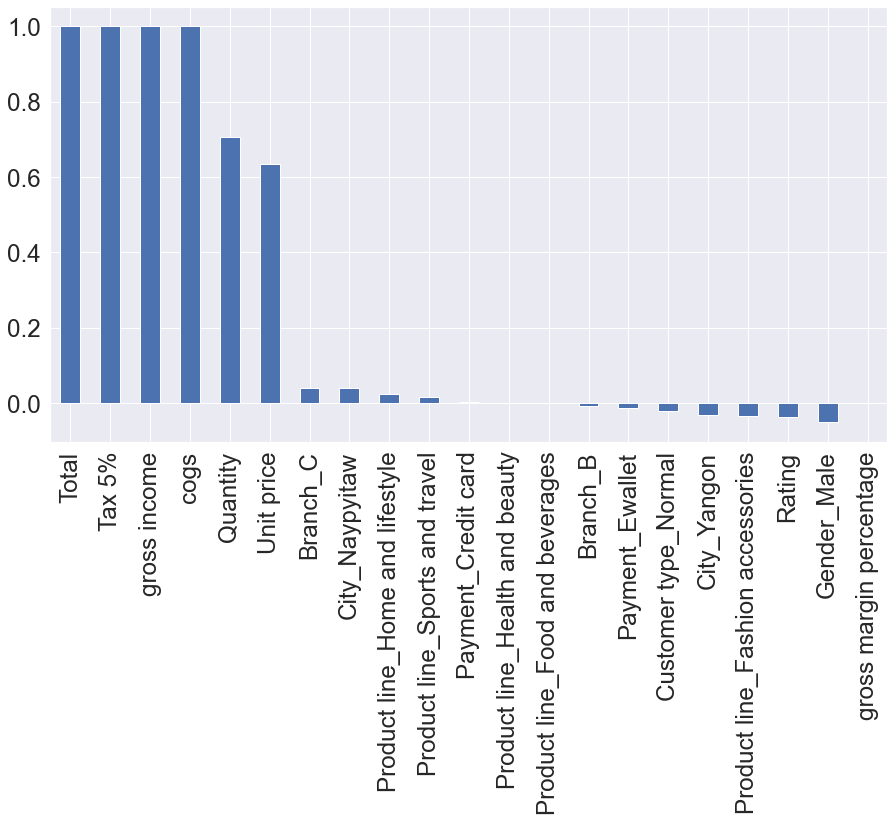

In [114]:
#Get Correlation of "Churn" with other variables:
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=2.2)

plt.figure(figsize=(15,8))
df.corr()['Total'].sort_values(ascending = False).plot(kind='bar'  )

In [115]:
df["Rating"] = df["Rating"].apply(lambda x : int(x))

In [116]:
#  Split data into input data and output data
x = df.drop("Total" , axis=1)
y = df["Total"]

In [117]:
# import requred techniqes ::
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

In [118]:
# split data into training and testinfg data
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=20 , shuffle=True)

In [119]:
# Scaling data in thae normal distribution
scaller  = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

<p id = "Model">Bulid_ML_Model</p>

In [120]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm          import SVR
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
from sklearn.neighbors    import KNeighborsRegressor
from xgboost              import XGBRegressor
from sklearn.metrics      import  mean_absolute_error , mean_squared_error , r2_score 


In [121]:
Models = { "Linear_Regressor" : LinearRegression(),
           "Ridge_Regressor"  : Ridge(),
           "Lasso_Regressor"  : Lasso(),
           "SVRegressor"      : SVR(),
           "DTRegressor"      : DecisionTreeRegressor(),
           "RFRegressor"      : RandomForestRegressor(),
           "KNNRegressor"     : KNeighborsRegressor(),
           "XGBRegressor"     : XGBRegressor()
         }

In [122]:
for name , model in Models.items() :
    print(f"The Model :: {name}")
    model.fit(x_train , y_train)
    Train_Score = model.score(x_train , y_train)
    Test_Score  = model.score(x_test , y_test)
    print(f"The Training_Score :: {Train_Score}\nThe Test_Score :: {Test_Score}")
    print("*" *80)

The Model :: Linear_Regressor
The Training_Score :: 1.0
The Test_Score :: 1.0
********************************************************************************
The Model :: Ridge_Regressor
The Training_Score :: 0.9999984544832807
The Test_Score :: 0.9999984629249293
********************************************************************************
The Model :: Lasso_Regressor
The Training_Score :: 0.9999837279697157
The Test_Score :: 0.9999836999495904
********************************************************************************
The Model :: SVRegressor
The Training_Score :: 0.17393032807873876
The Test_Score :: 0.1818445319259423
********************************************************************************
The Model :: DTRegressor
The Training_Score :: 1.0
The Test_Score :: 0.999949869172307
********************************************************************************
The Model :: RFRegressor
The Training_Score :: 0.9999938638563683
The Test_Score :: 0.9999476812514985
*********

* From the result above we can see that XGB Model is the most efficient moderl to predict the oilprice baecouse it with high performance and accuracy

In [124]:
# Select model with high performance and accuracy 
XGB_Model = XGBRegressor()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

0.9999984670713589
0.9998418771866272
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

In [125]:
XGB_Model.score(x_train , y_train)

0.9999984670713589

In [127]:
XGB_Model.score(x_test , y_test)

0.9998418771866272

In [128]:
y_pred = XGB_Model.predict(x_test)

In [129]:
MAE = mean_absolute_error(y_test , y_pred  , multioutput="uniform_average")
MSE = mean_squared_error(y_test , y_pred , multioutput="uniform_average")
r2_square = r2_score(y_test , y_pred , multioutput="uniform_average")
print(f"The MAE :: {MAE}\n*************\nThe MSE :: {MSE}\n************\nThe r2_Score :: {r2_square}")

The MAE :: 2.0466071637725816
*************
The MSE :: 8.870346357743761
************
The r2_Score :: 0.9998418771866272


<p id = "Save">Save_Model</p>

In [131]:
import joblib
scaler = joblib.dump(scaller , "scaler.h5")
Mode   = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Total Price .

# Prediction  SuperMarket Rate 

In [132]:
x.columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'Branch_B', 'Branch_C', 'City_Naypyitaw',
       'City_Yangon', 'Customer type_Normal', 'Gender_Male',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [133]:
len(x.columns)

20

In [134]:
df.head(2)

Unit price  Quantity   Tax 5%     Total    cogs  gross margin percentage  \
0       74.69         7  26.1415  548.9715  522.83                 4.761905   
1       15.28         5   3.8200   80.2200   76.40                 4.761905   

   gross income  Rating  Branch_B  Branch_C  ...  City_Yangon  \
0       26.1415       9         0         0  ...            1   
1        3.8200       9         0         1  ...            0   

   Customer type_Normal  Gender_Male  Product line_Fashion accessories  \
0                     0            0                                 0   
1                     1            0                                 0   

   Product line_Food and beverages  Product line_Health and beauty  \
0                                0                               1   
1                                0                               0   

   Product line_Home and lifestyle  Product line_Sports and travel  \
0                                0                               0   
1                                0                               0   

   Payment_Credit card  Payment_Ewallet  
0                    0                1  
1                    0                0  

[2 rows x 21 columns]

In [ ]:
custom_data = np.array([74.69 , 7 , 26.2 , 522.83 , 4.76 , 26.14 , 
                        4 ,  0,0  , 1 ,0 , 374 ,
                        905  , 2631 , 17 , 7 , 19 , 0
                        , 1 , 1  ])
custom_data.shape

In [ ]:
custom_data = scaller.transform([custom_data])
custom_data

In [ ]:
prediction = Logistic_Model.predict(custom_data)
prediction